<!-- 

# **Engineering Statistics and Probability**
## **Computer Assignment 5**
---

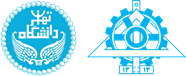

[**School of Electrical and Computer Engineering**, **College of Engineering**, **University of Tehran**](https://ece.ut.ac.ir/)

**Instructors:** Dr. Bahrak, Dr. Vahhabi

**Designers:** [Artin Tavassoli](mailto:artin.tavassoli2@gmail.com), [Mohammad Erfan Danaee](mailto:medanaee@gmail.com)

## **Topic:** Sum of Random Variables, Conditional Distribution, Covariance, and Functions of Two Random Variables

### **Submission Date:**

--- -->

### ℹ️ Student information
+ First name: Amirreza
+ Last Name: Daei
+ SID: 810103407

---

### We will use the following R packages:

*   [`dplyr`](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html): A popular and easy-to-use package for data manipulation in R. (for Qestion 2)
*   [`ggplot2`](https://ggplot2.tidyverse.org/): A powerful package for creating visualizations in R.
*   [`magrittr`](https://magrittr.tidyverse.org) : An package that introduces the pipe operator (%>%) to make code more readable by chaining

+ ⚠️ **Remove comment lines on first run.**


In [1]:
# install.packages("magrittr")
# install.packages("dplyr")
# install.packages("ggplot2")
library(magrittr)
library(dplyr)
library(ggplot2)
set.seed(42)
options(repr.plot.width = 15, repr.plot.height = 6)

Warning message:
"package 'magrittr' was built under R version 4.5.2"
Warning message:
"package 'dplyr' was built under R version 4.5.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.5.2"


# Question 1 (25 points🎯)
## Sum of RVs and function of two RVs ⭐

A company wants to obtain a distribution of the loss it will incur at the end of the upcoming week.

Suppose a company is losing money due to product returns. The number of products of type `a` and `b` returned to the company each day is exponentially distributed and independent of each other, and the company loses 1\$ for each product returned.
Let $X_i$ number of products of type `a` and $Y_i$ number of products of type `b` be returned on day i.

 $$X_i , Y_i \sim Exp(λ = 0.01)$$

### 0. Complete the following two functions to plot the histogram and PDF of the data. (5 points🎯)

+ Note: You can use `geom_density` to plot the PDF.

In [ ]:
plot_hist <- function(data, bins = 30, fill_color = "skyblue", line_color = "white") {
  ggplot(data.frame(x = data), aes(x = x)) +
    geom_histogram(
      bins = bins,
      fill = fill_color,
      color = line_color
    ) +
    labs(
      title = "Histogram of Loss",
      x = "Loss",
      y = "Count"
    ) +
    theme_minimal()
}

plot_pdf <- function(data, line_color = "blue", fill_color = "lightblue", alpha = 0.5) {
  ggplot(data.frame(x = data), aes(x = x)) +
    geom_density(
      color = line_color,
      fill = fill_color,
      alpha = alpha,
      linewidth = 1
    ) +
    labs(
      title = "Probability Density Function (PDF)",
      x = "Loss",
      y = "Density"
    ) +
    theme_minimal()
}

### 1. Write down the company's loss due to the return of product A after one week. Let's assume this value is equal to $D$. (1 points🎯)

### 2. By generating 100,000 samples of the loss each day caused by product a, obtain 100,000 samples of the $D$. Then plot its PDF and histogram. (2 points🎯)



🔴 **TO DO**

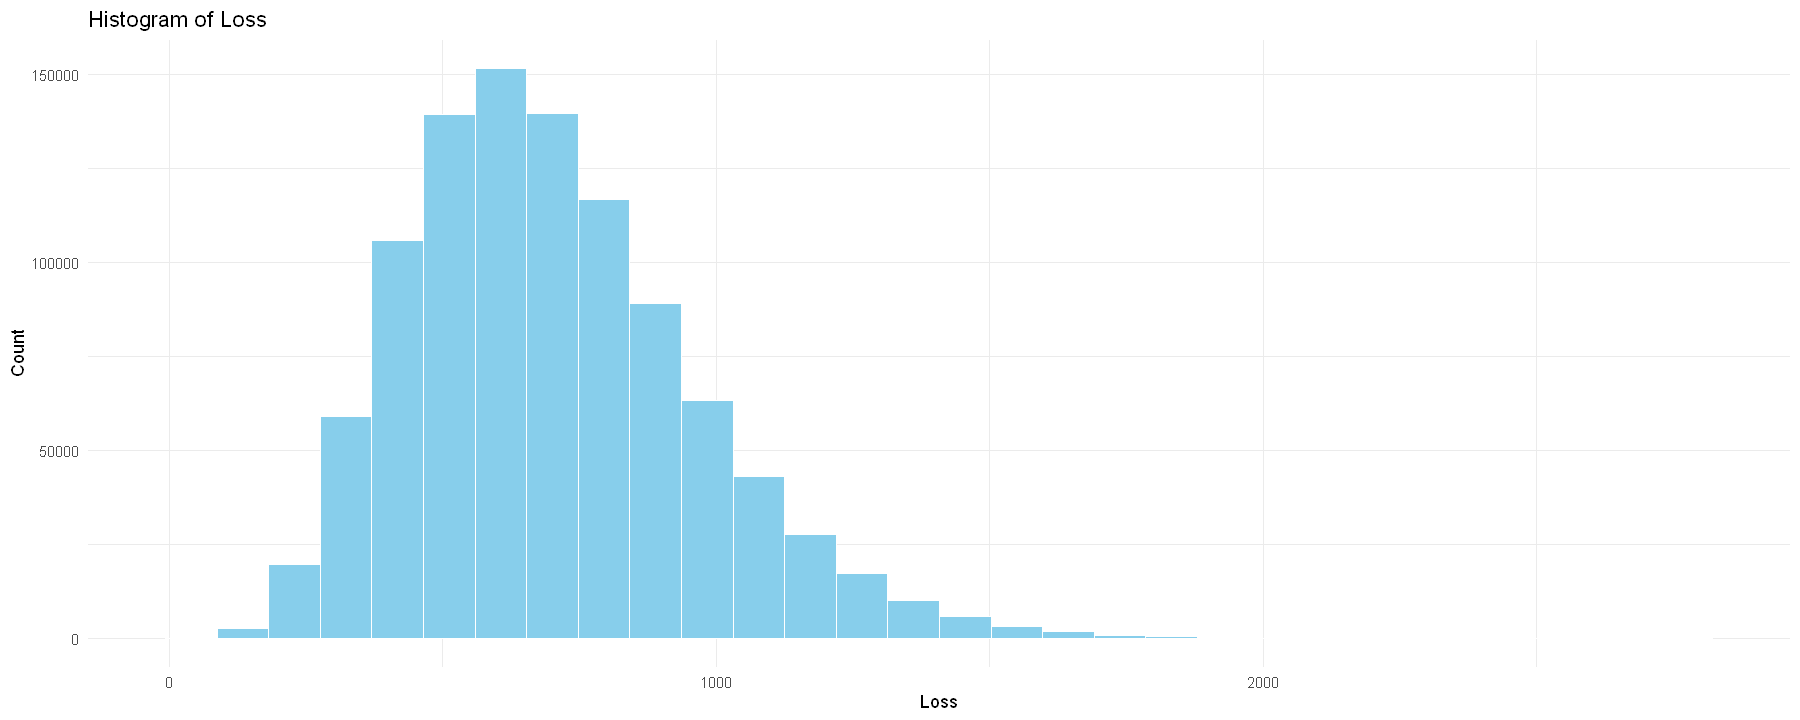

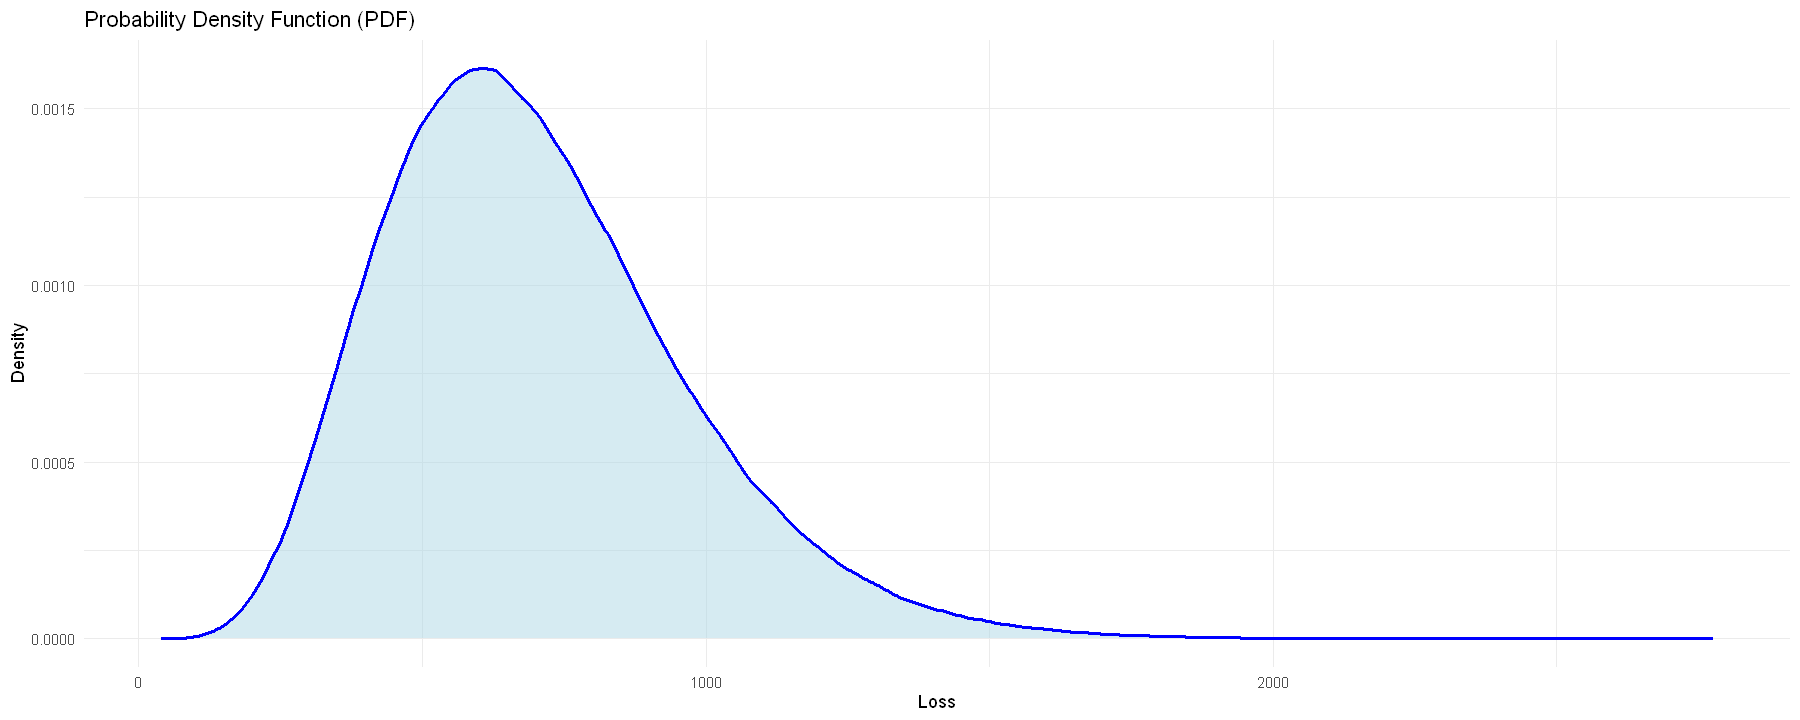

In [ ]:
sample_size <- 10e5
lambda <- 0.01
days <- 7

D_sample <- replicate(sample_size, sum(rexp(days, lambda)))

plot_hist(D_sample)
plot_pdf(D_sample)


### 3. Calculate the mean and variance of the resulting distribution. (1 points🎯)

In [ ]:
D_empirical_mean <- mean(D_sample)
D_empirical_var <- var(D_sample)

D_theoretical_mean <- days * (1 / lambda)
D_theoretical_var <- days * (1 / (lambda ^ 2))

cat("Empirical Mean =", D_empirical_mean, "\n")
cat("Empirical Variance =", D_empirical_var, "\n\n")

cat("Theoretical Mean =", D_theoretical_mean, "\n")
cat("Theoretical Variance =", D_theoretical_var, "\n")


Empirical Mean = 700.0038 
Empirical Variance = 69780.83 

Theoretical Mean = 700 
Theoretical Variance = 70000 


The total loss of the company after `n` days is the sum of `n` identical and independent exponential variables.
This sum has a distribution called the [**gamma distribution**](https://en.wikipedia.org/wiki/Gamma_distribution)

### 4. By studying this distribution, obtain the gamma distribution parameters for D and plot it's PDF. (2 points🎯)

🔴 **TO DO**

In [ ]:
plot_pdf_theory <- function(x, y,
                    line_color = "blue",
                    line_size = 1,
                    title = "Plot",
                    xlab = "x",
                    ylab = "y") {
  ggplot(data.frame(x, y), aes(x, y)) +
    geom_line(color = line_color, size = line_size) +
    theme_minimal() +
    labs(title = title, x = xlab, y = ylab)
}

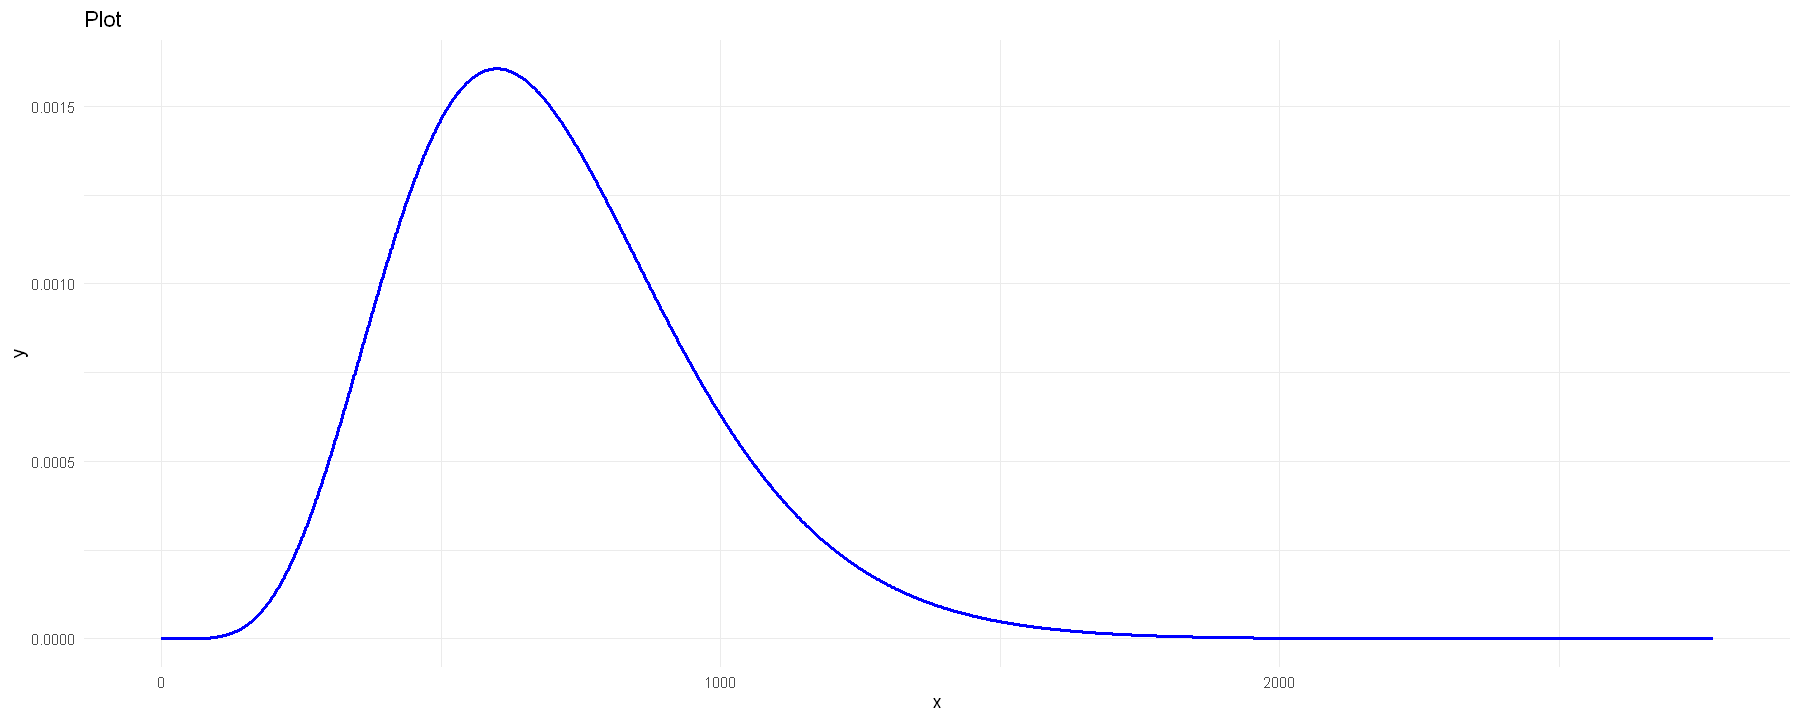

In [ ]:
x_vals <- seq(0, max(D_sample))
y_vals<- dgamma(x_vals, days, lambda)

plot_pdf_theory(x_vals, y_vals)

### 5. Calculate the mean and variance theoretically and compare with section 3. (1 points🎯)

too section 3 neveshtam :)

Now suppose the company wants to know what percentage of the company's loss after 7 days is related to product a.

### 6. Write down this ratio. plot 100,000 samples of this ratio by generating random samples of the company's losses. Also calculate the mean and variance of the data. (2 points🎯)

This new distribution is called the [**beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution).

Empirical Mean = 0.4999689 
Empirical Variance = 0.01669058 

Theoretical Mean = 0.5 
Theoretical Variance = 0.01666667 


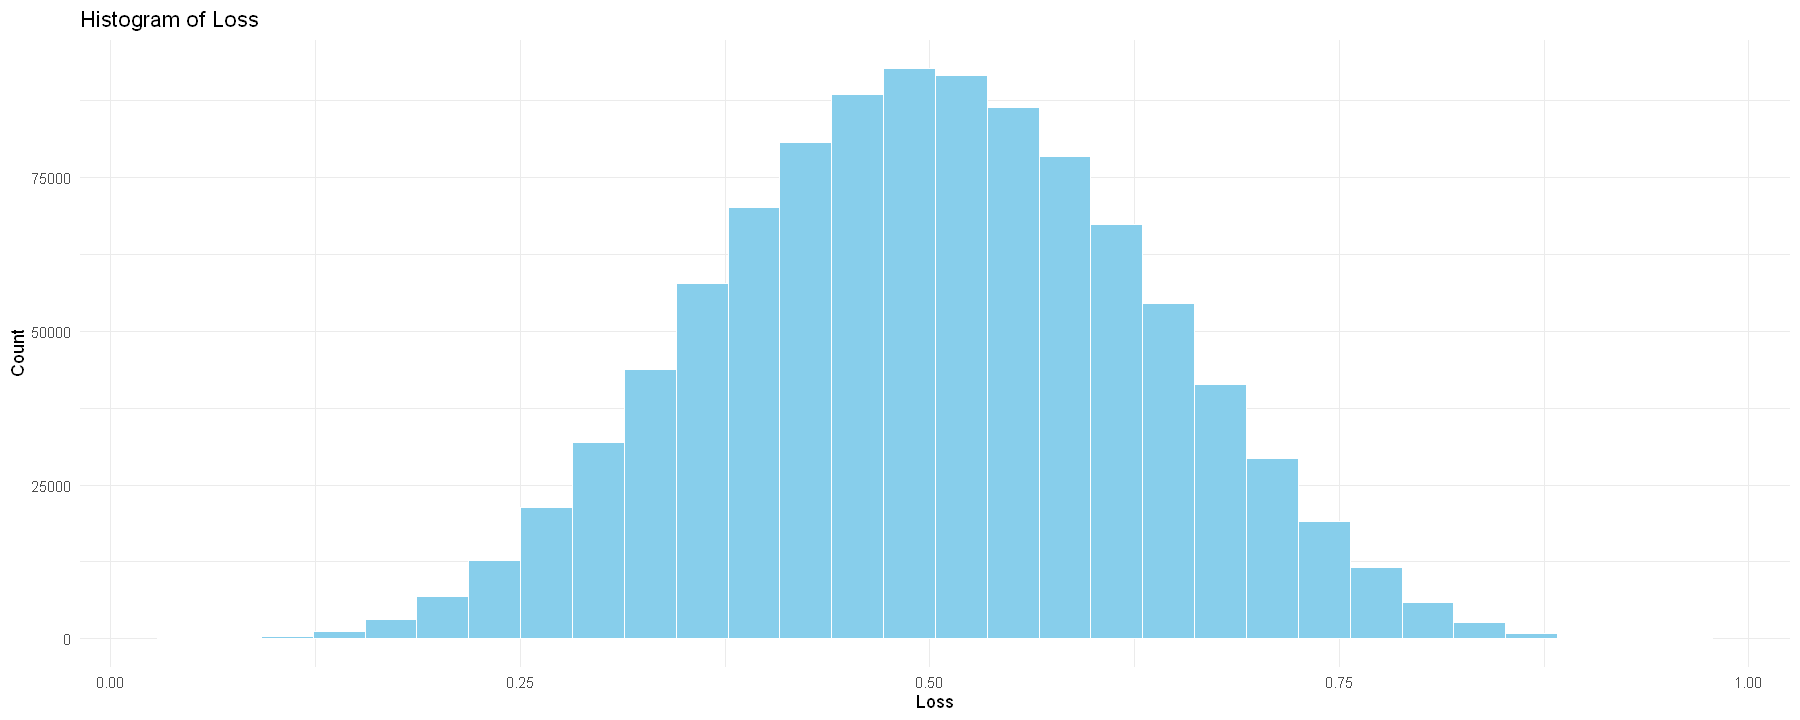

In [ ]:
DA <- replicate(sample_size, sum(rexp(days, lambda)))
DB <- replicate(sample_size, sum(rexp(days, lambda)))

RA <- DA / (DA + DB)

plot_hist(data = RA)

RA_empirical_mean <- mean(RA)
RA_empirical_var <- var(RA)

cat("Empirical Mean =", RA_empirical_mean, "\n")
cat("Empirical Variance =", RA_empirical_var, "\n\n")

alpha <- days
beta  <- days

RA_theoretical_mean <- alpha / (alpha + beta)
RA_theoretical_var  <- (alpha * beta) / (((alpha + beta) ^ 2) * (alpha + beta + 1))

cat("Theoretical Mean =", RA_theoretical_mean, "\n")
cat("Theoretical Variance =", RA_theoretical_var, "\n")




### 7. By studying this distribution, calculate its parameters, then theoretically estimate its mean and variance and compare it with Section 6. (5 points🎯)

🔴 **TO DO**

### 8. Plot the PDF graph of the resulting beta distribution and compare it with the histogram in Section 6. (2 points🎯)

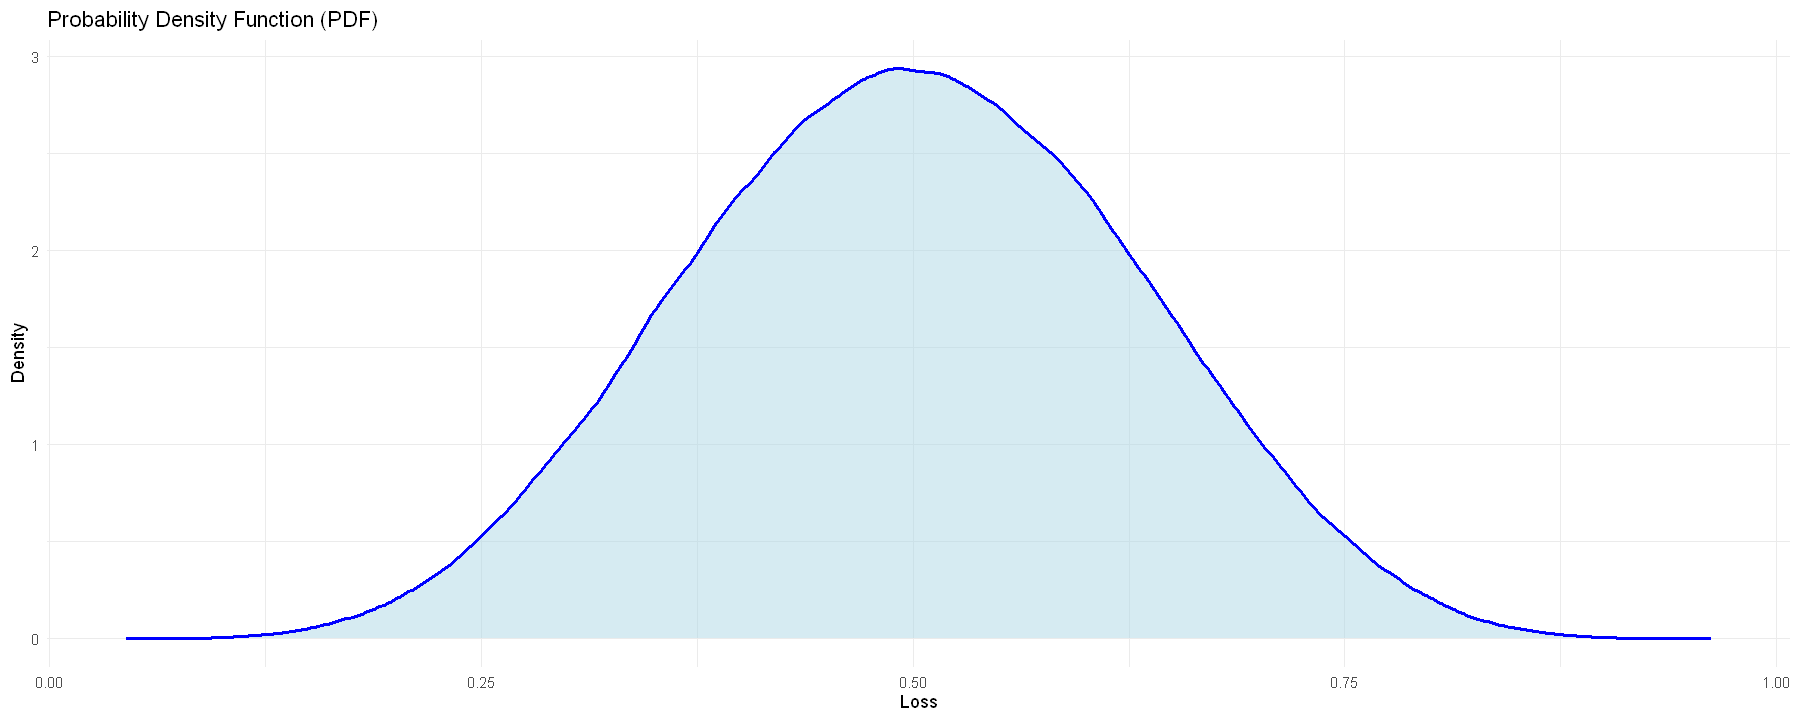

In [ ]:
plot_pdf(data = RA)

### 9. Now suppose the company wants to calculate the same ratio for a day instead of a week. Re-simulate this ratio. (2 points🎯)
### 10. What distribution does the resulting distribution resemble? Verify this with theoretical calculations. (2 points🎯)

Empirical Mean = 0.4996821 
Empirical Variance = 0.08327696 

Beta(1, 1) === Uniform(0, 1)

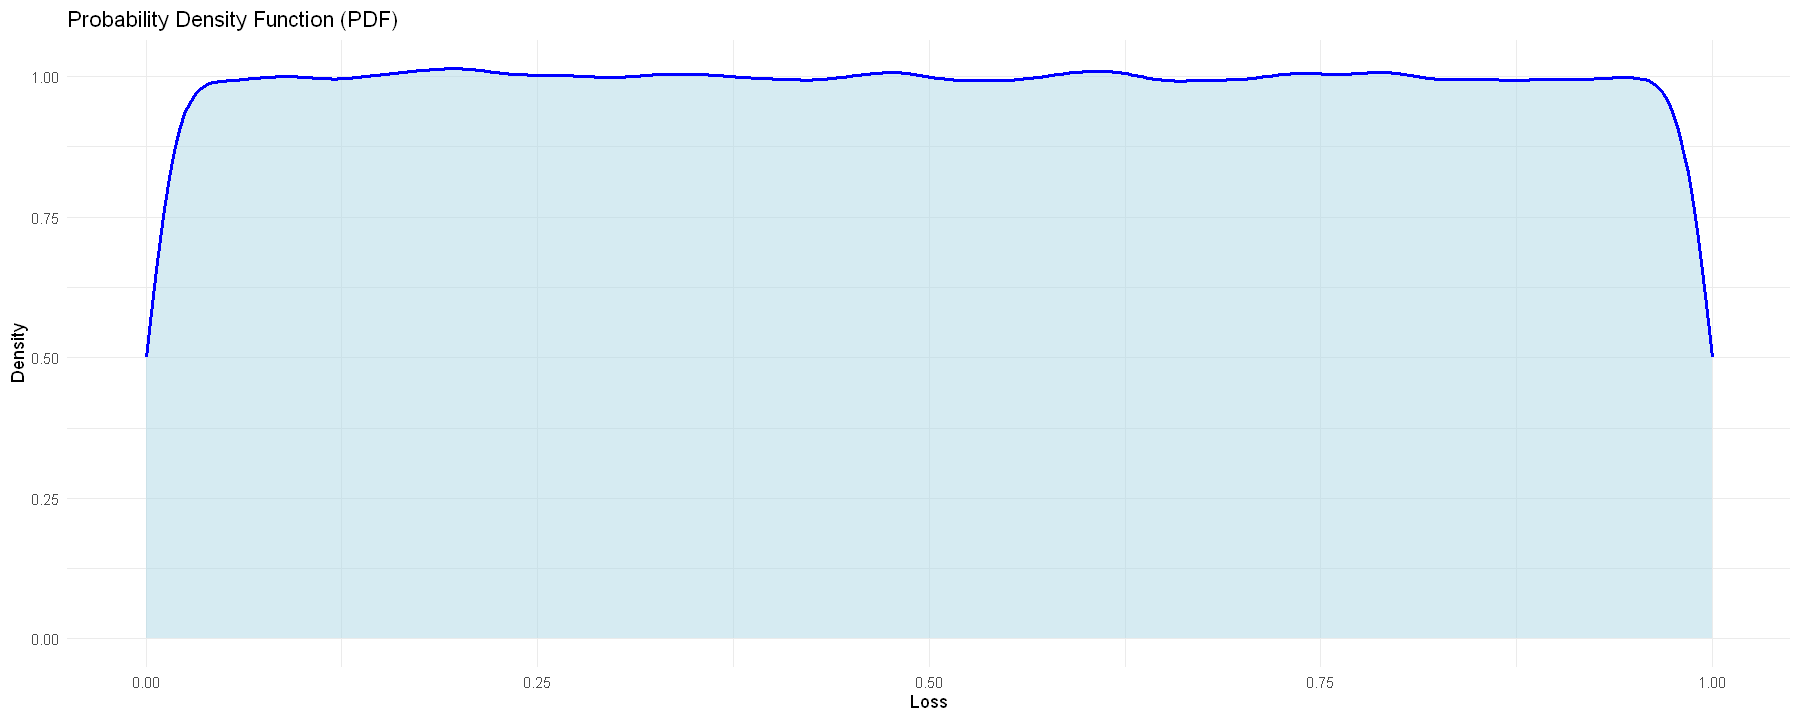

In [ ]:
days <- 1

DA <- replicate(sample_size, sum(rexp(days, lambda)))
DB <- replicate(sample_size, sum(rexp(days, lambda)))

RA <- DA / (DA + DB)

plot_pdf(data = RA)

RA_empirical_mean <- mean(RA)
RA_empirical_var <- var(RA)

cat("Empirical Mean =", RA_empirical_mean, "\n")
cat("Empirical Variance =", RA_empirical_var, "\n\n")

cat("Beta(1, 1) === Uniform(0, 1)")

🔴 **TO DO**

# Question 2 (25 points🎯)
## Covariance 🌡️

We will use the built-in **airquality** dataset in R, which contains weather data for New York in 1970.

We will focus on the **Day**, **Month**, and **Temp** columns. To represent the progression of the year, we will define a new variable called **Day Number**, which indicates the number of days passed since the beginning of the year.


## Familiarize With Dataset 🌦️ (7.5 points🎯)

### 1. Plot the temperature (**Temp**) against the **Day Number**. This will help you become familiar with the dataset and observe the general trend of temperature throughout the year.

In [ ]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


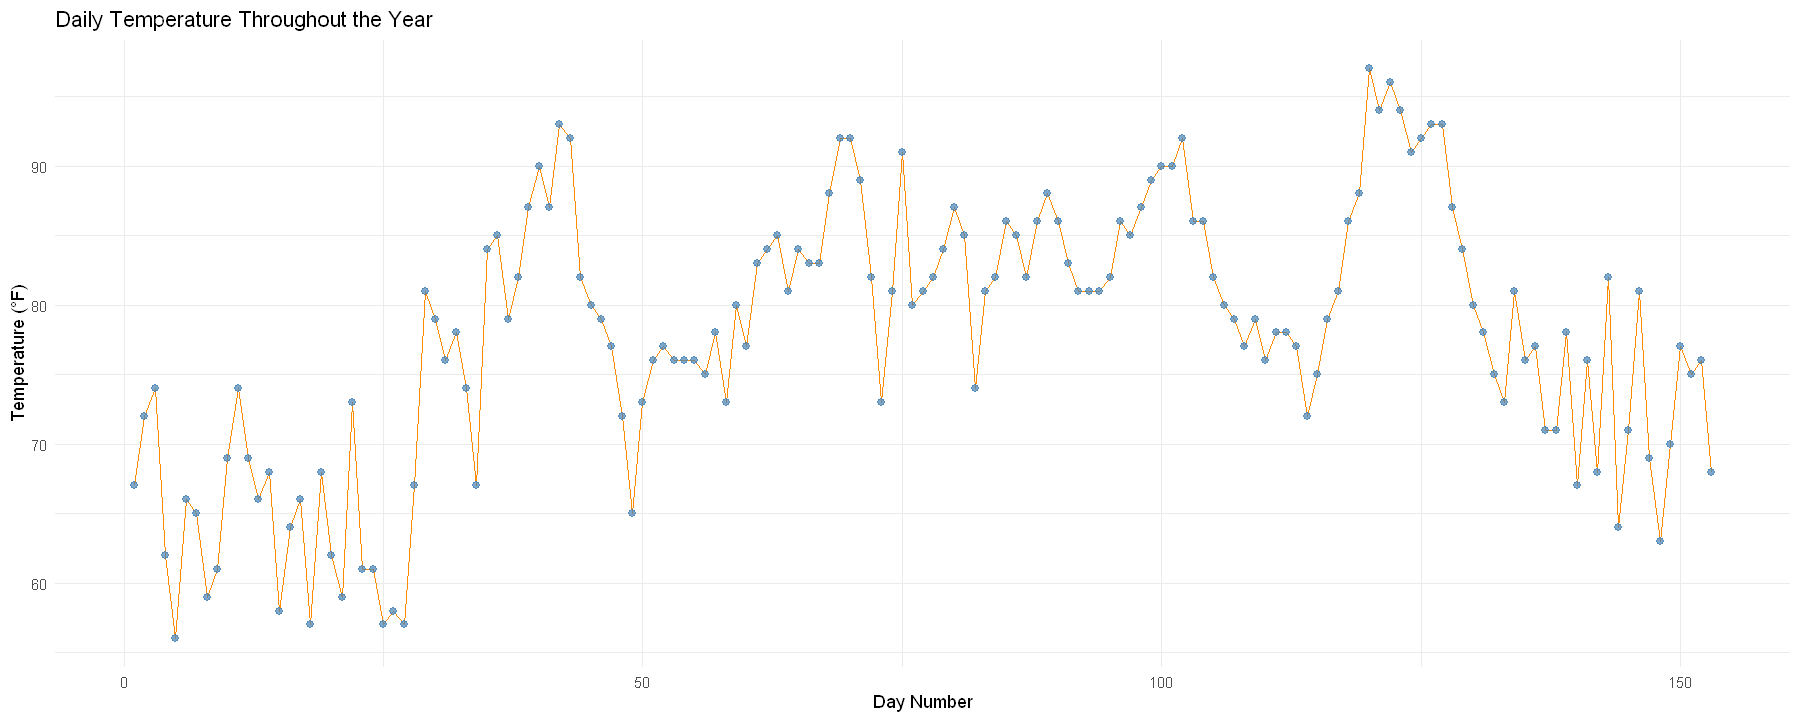

In [ ]:
airquality <- airquality %>%
  mutate(
    DayNumber = case_when(
      Month == 5 ~ Day,
      Month == 6 ~ 31 + Day,
      Month == 7 ~ 31 + 30 + Day,
      Month == 8 ~ 31 + 30 + 31 + Day,
      Month == 9 ~ 31 + 30 + 31 + 31 + Day
    )
  )

ggplot(airquality, aes(x = DayNumber, y = Temp)) +
geom_line(color = "darkorange") +
geom_point(color = "steelblue", size = 2, alpha = 0.7) +
labs(
	title = "Daily Temperature Throughout the Year",
	x = "Day Number",
	y = "Temperature (°F)"
) +
theme_minimal()



## Correlation Function 🧙 (7.5 points🎯)

### 2. Write a function called `Calculate_Correlation` that takes two vectors, X and Y, as input and returns their correlation. You should implement the correlation calculation yourself and **not** use pre-built correlation functions from R packages.

In [ ]:
Calculate_Correlation = function(X, Y)
{
  mean_x <- mean(X)
  mean_y <- mean(Y)
  
  dx <- X - mean_x
  dy <- Y - mean_y
  
  numerator <- sum(dx * dy)
  denominator <- sqrt( sum(dx^2) * sum(dy^2) )
  
  corr <- numerator / denominator
  return(corr)
}

## Autocorrelation 🧙‍♀️ (10 points🎯)

+ In time series data, we often analyze the relationship between a variable at a given time and its past values. This concept is called **Autocorrelation**. It helps us understand how a variable is correlated with itself over different time lags.

#### For this task, we will examine the autocorrelation of temperature with a one-day lag. Specifically, we will:

###3.  Plot the temperature on day *i* against the temperature on day *i-1*.
###4.  Calculate the correlation between these two sets of temperatures using the `Calculate_Correlation` function you implemented earlier. This is referred to as calculating the autocorrelation with a "1 shift" or "lag 1".

[1] 0.8154956


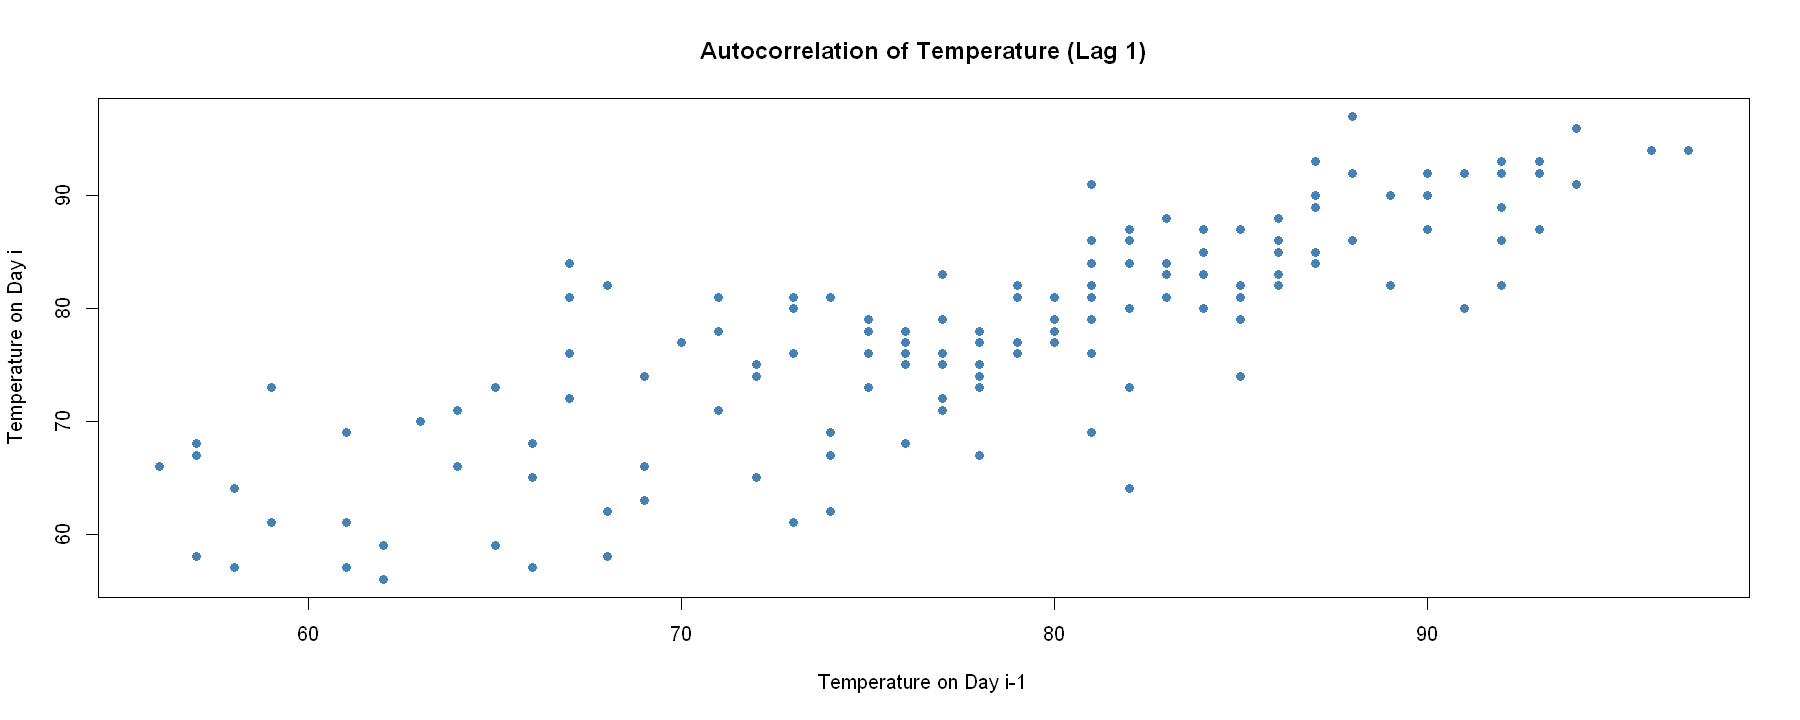

In [ ]:
temp <- airquality$Temp

temp_today <- temp[-1]
temp_yesterday <- temp[-length(temp)]

plot(
  temp_yesterday,
  temp_today,
  xlab = "Temperature on Day i-1",
  ylab = "Temperature on Day i",
  main = "Autocorrelation of Temperature (Lag 1)",
  pch = 16,
  col = "steelblue"
)

autocorr_lag1 <- Calculate_Correlation(temp_today, temp_yesterday)
print(autocorr_lag1)

###5. We want to expand on this idead and calcualte correlation for shifts 1 to 100 and plot correlation of temperature with previous days.

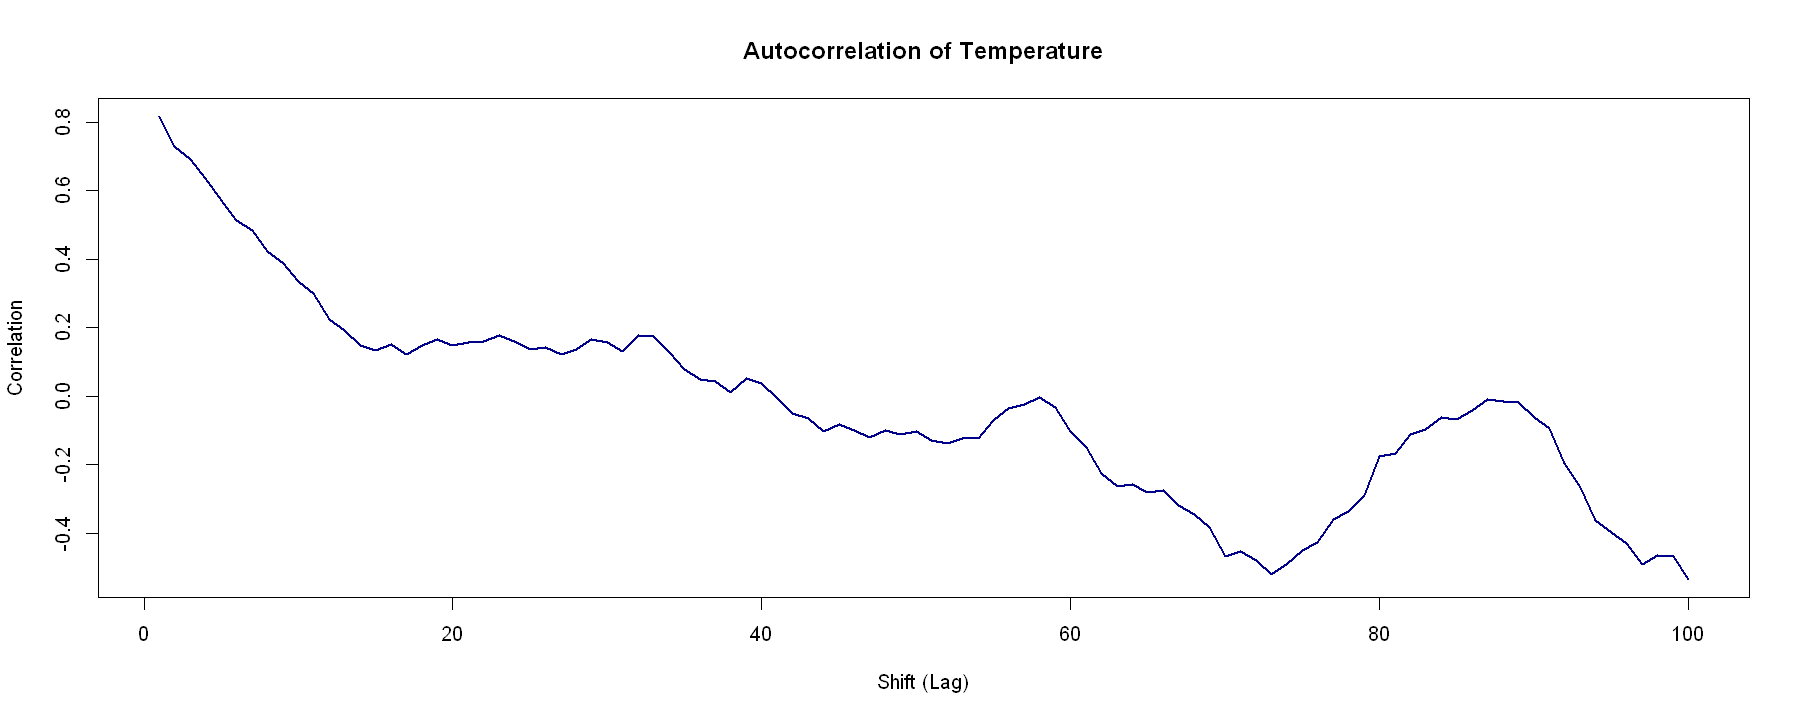

In [ ]:
n <- length(temp)

max_shift <- 100
correlations <- numeric(max_shift)

for (s in 1:max_shift) {
  temp_today <- temp[(s + 1):n]
  temp_past  <- temp[1:(n - s)]
  
  correlations[s] <- Calculate_Correlation(temp_today, temp_past)
}

plot(
  1:max_shift,
  correlations,
  t = "l",
  col = "darkblue",
  lwd = 2,
  xlab = "Shift (Lag)",
  ylab = "Correlation",
  main = "Autocorrelation of Temperature"
)


# Question 3 (50 points🎯)
## Conditional Distribution 🤖

For this part we want to locate a robot (WALL-E) in a 10 by 15 grid like maze using it's
sensors.

WALL-E has 4 sensors in its 4 directions that inform it of the presence or absence of a wall in each direction. Each of these 4 sensors has a 10% error. The probability distribution of the result of each sensor is as follows:

$$P(\text{sensor} = 1 | \text{wall} = 1) = 0.9$$
$$P(\text{sensor} = 1 | \text{wall} = 0) = 0.1$$
$$P(\text{sensor} = 0 | \text{wall} = 1) = 0.1$$
$$P(\text{sensor} = 0 | \text{wall} = 0) = 0.9$$

WALL-E is really old and his legs 🦿 are not what they used to be, so even if he chooses to go up, he may go south!!!

given each intended direction, there is a probability of 80% of correctly moving
and 20% moving in the wrong direction (uniformly).
$$P(\text{move} = \text{UP} | \text{intendedDir} = \text{UP}) = 0.8$$
$$P(\text{move} = \text{DOWN} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$
$$P(\text{move} = \text{RIGHT} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$
$$P(\text{move} = \text{LEFT} | \text{intendedDir} = \text{UP}) = \frac{0.2}{3}$$

WALL-E may be old but it has a strong memory 🧠, it stores the history of it's beliefs(the probability of being at each cell each step, more on this later)

WALL-E  wants to find it's location with high accuracy using probabilistic methods and conditional probability to escape from the maze!!! 🌽

To solve this problem, we model it with a set of random variables. Suppose that $X_t$ represents the robot's location after t movements.
Initially the probability of the robot being present in all blocks is equal,
meaning the initial probability for each block (x,y) is:
$$P(X_{0} = (x,y)) = \frac{1}{\text{NUM OF FREE CELLS}}$$

Also, suppose we denote the data read from the sensors at time t by $E_t$ (evidence after t movements 🕵️).



**Common Mistake ✖️**

Random variables $X_{t}$ and $E_{t}$ are vectors!!!

$X_{t}$ shows the location of WALL-E using x,y coordinates for example [3,4].

$E_{t}$ shows the status of WALL-E's sensors for example [0,0,0,1] (only one sensor is on while the others are off)

In our model, $X_{t}$ only depends on $X_{t-1}$ and each $E_t$ also only depends on $X_{t}$ (independent from other random variables).

we can consider a set of random variables:

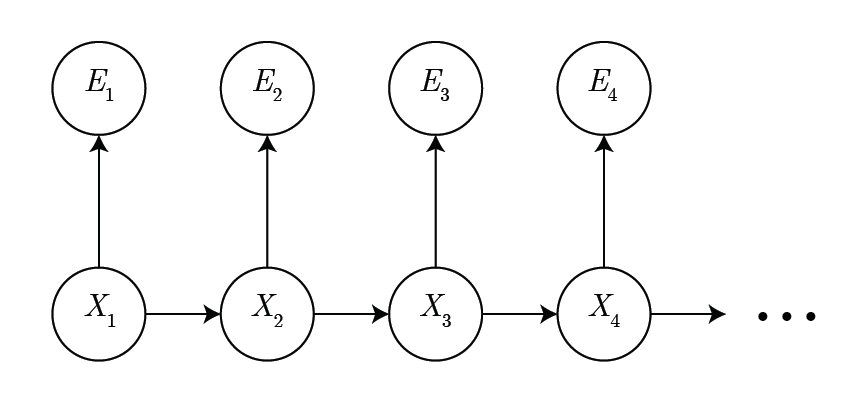


Each arrow indicates the dependence of the variable at the end of the arrow on the variable at the beginning of the arrow.

**What are we looking for? 🔍**

we are looking to estimate $X_t$ from evidences $E_1$ to $E_t$ for each block of the map. So for each step we need to obtain the following probability value:

$$ P(X_{t} | E_1, E_2, ... E_t)$$

This probability can be written as:

$$ { \color{#55cffd} {P(X_t|E_{1:t}) \propto P(X_t, E_{1:t}) \
= \sum_{X_{t-1}} P(X_{t-1}, X_t, E_{1:t}) \
= \sum_{X_{t-1}} P(X_{t-1}, E_{1:t-1}) P(X_t|X_{t-1}) P(E_t|X_t) \
\propto P(E_t|X_t) \sum_{X_{t-1}} P(X_t|X_{t-1}) P(X_{t-1} \mid E_{1:t-1})}}$$

So we will need 3 probabilities:

1. $ P(E_t|X_t) $
2. $ P(X_t|X_{t-1}) $
3. $ P(X_{t-1}, E_{1:t-1}) $

### 0. Theoretical Calculation of Presence Probability (5 points)**

- Assume we have a $2 \times 3$ grid as shown below.


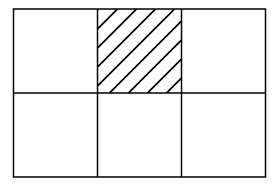

If the robot selects the **DOWN** direction and, after moving, makes the following observation:

$$E_2 = [ \text{UP} = 0, \text{RIGHT} = 0, \text{DOWN} = 1, \text{LEFT} = 1 ]$$

Then, calculate:

$$P(X_2|E_{1:2})$$

(Assume that $P(X_1|E_1)$ is uniformly $0.2$ for all empty cells).

Is the result as expected?

🔴 **0. TO DO**

$$
P(X_1 = x_i \mid E_1) = 0.2 \qquad \forall x_i \in \text{empty cells}
$$

$$
E_2 = \{UP = 0,\ RIGHT = 0,\ DOWN = 1,\ LEFT = 1\}
$$

$$
P(X_2 \mid E_2)
= \frac{P(E_2 \mid X_2)\, P(X_2 \mid E_1)}
{\sum\limits_j P(E_2 \mid X_j)\, P(X_2 \mid E_1)}
$$

$$
P(E_2 \mid X_2) = 1
$$

$$
P(E_2 \mid X_j) = 0 \qquad \forall j \neq 2
$$

$$
P(X_2 \mid E_2)
= \frac{1 \times 0.2}{1 \times 0.2}
= 1
$$

$$
P(X_2 \mid E_2) = 0 \qquad \text{for all other states}
$$

yes exactly


### Basic definitions
This section contains the map, list of movements and constant values.
+ 🔴 **You do not need to change this section.**

+ The function `generate_directions` generates a sequence of moves specified by the strings u, l, d, r and outputs the list of moves.

In [30]:
generate_directions <- function(map, start_pos = c(2, 3), n = 300, valid_ratio = 0.9) {
  directions <- c("u", "d", "l", "r")
  moves <- list(u = c(-1, 0), d = c(1, 0), l = c(0, -1), r = c(0, 1))

  pos <- start_pos
  chosen_dirs <- character(0)
  valid_moves <- 0

  NUM_ROWS <- nrow(map)
  NUM_COLS <- ncol(map)

  while (length(chosen_dirs) < n) {
    dir <- sample(directions, 1)
    new_pos <- pos + moves[[dir]]

    if (new_pos[1] < 1 || new_pos[1] > NUM_ROWS ||
        new_pos[2] < 1 || new_pos[2] > NUM_COLS ||
        map[new_pos[1], new_pos[2]] == 1) {
      if (runif(1) > valid_ratio) {
        chosen_dirs <- c(chosen_dirs, dir)
      }
    } else {
      pos <- new_pos
      chosen_dirs <- c(chosen_dirs, dir)
      valid_moves <- valid_moves + 1
    }
  }

  return(chosen_dirs)
}

In [56]:
map <- matrix(c(
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
  1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
  1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
  1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
  1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
  1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
  1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
  1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
), nrow = 15, ncol = 10) %>% t()

dim = dim(map)

NUM_ROWS = dim[1]
NUM_COLS = dim[2]
SENSOR_ERROR = 0.1
MOVE_ERROR = 0.2
INITIAL_POS = c(2,3)

# List of robot movements Generated by a function. You can change the percentage of moves that are valid (do not hit the wall) and the number of moves.
# The output is a list of 4 letters u, d, l, r.
chosen_dirs <- generate_directions(map, start_pos = INITIAL_POS, n = 300, valid_ratio = 0.9)

actions <- list(
  u = c(y = -1, x = 0),
  d = c(y = 1, x = 0),
  l = c(y = 0, x = -1),
  r = c(y = 0, x = 1)
)

action_names <- names(actions)

map

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,1,0,1,0,1,0,1,1,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0,1,1
1,0,1,0,1,1,0,1,1,1,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,1,1,1,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
1,0,1,1,0,1,1,1,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


###  1. Finding The Evidence!!! 🔍
+ a function that takes WALL-E's current position and the map and returns the values of the top, right, bottom, and left sensors (4 element list).
These are the values of WALL-E's sensors (or evidences of our model).

+ 🔴 **You do not need to change this section.**


In [32]:
sensor <- function(map, current_pos) {

  get_single_reading <- function(target_pos) {

    is_wall_present <- FALSE
    if (map[target_pos[1], target_pos[2]] == 1) {
      is_wall_present <- TRUE
    }
    true_value <- ifelse(is_wall_present, 1, 0)

    random_chance <- runif(1)
    if (random_chance <= (1 - SENSOR_ERROR)) {
      return(true_value)
    }
    else {
      return(1 - true_value)
    }
  }

  pos_up <- current_pos + actions$u
  pos_down <- current_pos + actions$d
  pos_left <- current_pos + actions$l
  pos_right <- current_pos + actions$r

  reading_up <- get_single_reading(pos_up)
  reading_down <- get_single_reading(pos_down)
  reading_left <- get_single_reading(pos_left)
  reading_right <- get_single_reading(pos_right)

  return(list(u = reading_up, r = reading_right, d = reading_down, l = reading_left))
}

### 2. **TO-DO:** Find WALL-E's Next Position 🔍 (10 points🎯)
+ Write a function that takes WALL-E's current position and it's chosen direction and returns the position after the movement.

In [33]:
# move <- function(map, current_pos, chosen_dir) {
#   map_length <- nrow(map)
#   map_height <- ncol(map)
#   new_pos <- current_pos + actions[[chosen_dir]]

#   if (new_pos[1] < 1 || new_pos[1] > map_length || new_pos[2] < 1 || new_pos[2] > map_height) {
#     return(current_pos)
#   }

#   if (map[new_pos[1], new_pos[2]] == 1) {
#     return(current_pos)
#   }

#   return(new_pos)
# }

move <- function(map, current_pos, chosen_dir) {
  map_length <- nrow(map)
  map_height <- ncol(map)
  directions <- names(actions)
  r <- runif(1)

  if (r <= (1 - MOVE_ERROR)) {
    actual_dir <- chosen_dir
  } 
	else {
    wrong_dirs <- setdiff(directions, chosen_dir)
    actual_dir <- sample(wrong_dirs, 1)
  }
  new_pos <- current_pos + actions[[actual_dir]]
  
  if (new_pos[1] < 1 || new_pos[1] > map_length || new_pos[2] < 1 || new_pos[2] > map_height) {
    return(current_pos)
  }
  
  if (map[new_pos[1], new_pos[2]] == 1) {
    return(current_pos)
  }
  
  return(new_pos)
}


### 3.  **TO-DO:** Calculating $ P(E_t|X_t) $ 🧮 (10 points🎯)
+ 3.1. Theoritically calculate the above probability using $E_t = [0,1,0,1]$ and $X_t = [3,4]$ for the map given above.
+ 3.2. Write a function that takes the last evidence ($E_t$) and WALL-E's position ($X_t$) and return the probability $ P(E_t|X_t) $.
+ 3.3. Check your 3.1. answer using 3.2. function

🔴 **3.1 TO DO**

In [34]:
P_theory <- 0.9 * 0.1 * 0.9 * 0.9
P_theory

[1] 0.0729

3.2. **$ P(E_t|X_t) $ Function**

In [35]:
cal_observation_prob <- function(map, xt, et) {
  
  neighbors <- list(
    u = xt + actions$u,
    r = xt + actions$r,
    d = xt + actions$d,
    l = xt + actions$l
  )
  
  true_walls <- sapply(neighbors, function(pos) {
    if (map[pos[1], pos[2]] == 1) 1 else 0
  })
  
  prob <- 1
  
  for (i in 1:4) {
    if (et[i] == true_walls[i]) {
      prob <- prob * (1 - SENSOR_ERROR)
    } 
		else {
      prob <- prob * SENSOR_ERROR
    }
  }
  
  return(prob)
}


3.3. **Comparing the results**

In [36]:
cal_observation_prob(map, c(3, 4), c(0, 1, 0, 1))

[1] 0.0729

### 4. **TO-DO:** Calculating $ P(X_t|X_{t-1}) $ 🧮 (10 points🎯)
+ Write a function that takes $X_t$, $X_{t-1}$, and the direction chosen by the WALL-E and outputs the probability that WALL-E will go from $X_{t-1}$ to $X_t$ given the input direction.

+ For example, `f((3,4), (3,5) , 'u')` is equal to the probability that WALL-E will go from house (3,5) to (3,4) while choosing the up direction.

+ Note: If $X_{t-1}$ were a wall, we would return 0.

+ Note: If $X_{t-1}$ were not a neighbor of $X_t$ or $X_t$ itself, it is clearly impossible for the robot to go from $X_{t-1}$ to $X_t$. So we would return 0.

+ Note: If $X_t$ were a wall, we would return 0.

In [37]:
cal_move_prob <- function(map, xt, xt_minus_1, chosen_dir) {
  if (map[xt_minus_1[1], xt_minus_1[2]] == 1 || map[xt[1], xt[2]] == 1) {
    return(0)
  }
  dirs <- names(actions)
  
  probs <- rep(MOVE_ERROR / 3, 4)
  names(probs) <- dirs
  probs[chosen_dir] <- 1 - MOVE_ERROR
  
  total_prob <- 0
  
  for (dir in dirs) {
    intended_next <- xt_minus_1 + actions[[dir]]
    if (intended_next[1] < 1 || intended_next[1] > nrow(map) ||
        intended_next[2] < 1 || intended_next[2] > ncol(map) ||
        map[intended_next[1], intended_next[2]] == 1) {
      intended_next <- xt_minus_1
    }
    if (all(intended_next == xt)) {
      total_prob <- total_prob + probs[dir]
    }
  }
  
  return(total_prob)
}


### 5. **TO-DO:** Main program loop 🔁 (10 points🎯)

+ Write the main loop using the model's formula provided to calculate $P(X_t| E_{1:t})$
+ Don't forget to normalize !! you can use the normalize function below to normalize the belief.

Complete the `model` function so that it returns a binary list of the model's beliefs and the robot's actual positions by taking the map and the chosen directions of the robot:

`return (list(beliefs = beliefs, real_pos = real_pos))`

#### Initializing
Initializing the belief list and the WALL-E's actual position
+ Note: The `beliefs` is a list to store WALL-E's belief about its location at each time step. Each element in this list will be a matrix representing the probability distribution of the robot being in each cell of the grid (belief). Initially, we add a uniform distribution to it.

❗ Beliefs is used to simulate our model and real postions is used to simulate real tracking of WALL-E. we can find our model's perfomance by comparing
beliefs and real positions.

In [38]:
normalize <- function(m) {
  total_sum <- sum(m)
  normalized_m <- m / total_sum
  return(normalized_m)
}

In [39]:
model <- function(map, chosen_dirs) {

  current_pos <- INITIAL_POS

  real_pos = list()
  beliefs <- list()

  initial_probs <- function(map) {
    num_zeros <- sum(map == 0)
    if (num_zeros == 0) {
      return(matrix(0, nrow = nrow(map), ncol = ncol(map)))
    }
    replacement_value <- 1 / num_zeros
    output_mat <- ifelse(map == 0, replacement_value, 0)
    return(output_mat)
  }

  beliefs <- append(beliefs, list(initial_probs(map)))
  real_pos <- append(real_pos, list(INITIAL_POS))

	for (t in 1:length(chosen_dirs)) {
		
		chosen_dir <- chosen_dirs[t]
		current_pos <- move(map, current_pos, chosen_dir)
		real_pos <- append(real_pos, list(current_pos))
		et <- sensor(map, current_pos)
		prev_belief <- beliefs[[t]]
		new_belief <- matrix(0, nrow = nrow(map), ncol = ncol(map))
		
		for (i in 1:nrow(map)) {
			for (j in 1:ncol(map)) {
				xt <- c(i, j)
				if (map[i, j] == 1) {
					new_belief[i, j] <- 0
					next
				}
				sum_prob <- 0
				for (m in 1:nrow(map)) {
					for (n in 1:ncol(map)) {
						if (map[m, n] == 1) next
						xt_prev <- c(m, n)
						move_p <- cal_move_prob(map, xt, xt_prev, chosen_dir)
						sum_prob <- sum_prob + move_p * prev_belief[m, n]
					}
				}
				
				obs_p <- cal_observation_prob(map, xt, et)
				new_belief[i, j] <- obs_p * sum_prob
			}
		}

		new_belief <- normalize(new_belief)
		beliefs <- append(beliefs, list(new_belief))
	}

  return (list(beliefs = beliefs, real_pos = real_pos))
}

In [57]:
result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos = result$real_pos

### 6. Visualization 🎨

The following function is used to draw the Maze Heatmap.
+ 🔴 **You do not need to change this section.**

In [41]:
plot_belief_map <- function(map, belief, current_pos) {
  rows <- nrow(map)
  cols <- ncol(map)
  max_idx <- which.max(belief)
  max_belief_pos <- arrayInd(max_idx, .dim = c(rows, cols))
  plot(NA, xlim = c(0, cols), ylim = c(0, rows), type = "n",
       xlab = "", ylab = "", main = "Robot Belief State",
       xaxs = "i", yaxs = "i", xaxt = 'n', yaxt = 'n', asp = 1)
  max_b <- max(belief)
  norm_belief <- if (max_b > 0) belief / max_b else belief
  col_palette <- colorRampPalette(c("#F7FBFF", "#6BAED6", "#08306B"))(101)
  for (r in 1:rows) {
    for (c in 1:cols) {
      xleft <- c - 1
      ybottom <- rows - r
      xright <- c
      ytop <- rows - r + 1

      if (map[r, c] == 1) {
        rect(xleft, ybottom, xright, ytop, col = "grey20", border = "grey50")
      } else {
        color_idx <- floor(norm_belief[r, c] * 100) + 1
        rect(xleft, ybottom, xright, ytop, col = col_palette[color_idx], border = "grey50")
      }
    }
  }
  rect(max_belief_pos[2] - 1, rows - max_belief_pos[1],
       max_belief_pos[2], rows - max_belief_pos[1] + 1,
       border = "#00FFFF", lwd = 4)
  text(x = current_pos[2] - 0.5, y = rows - current_pos[1] + 0.5,
       labels = "X", col = "red", font = 2, cex = 2)
}

### 7. Results 🚀
Using lists `beliefs` and `real_pos`, we'll draw the maze at each step.
+ 🔴 **You do not need to change this section.**

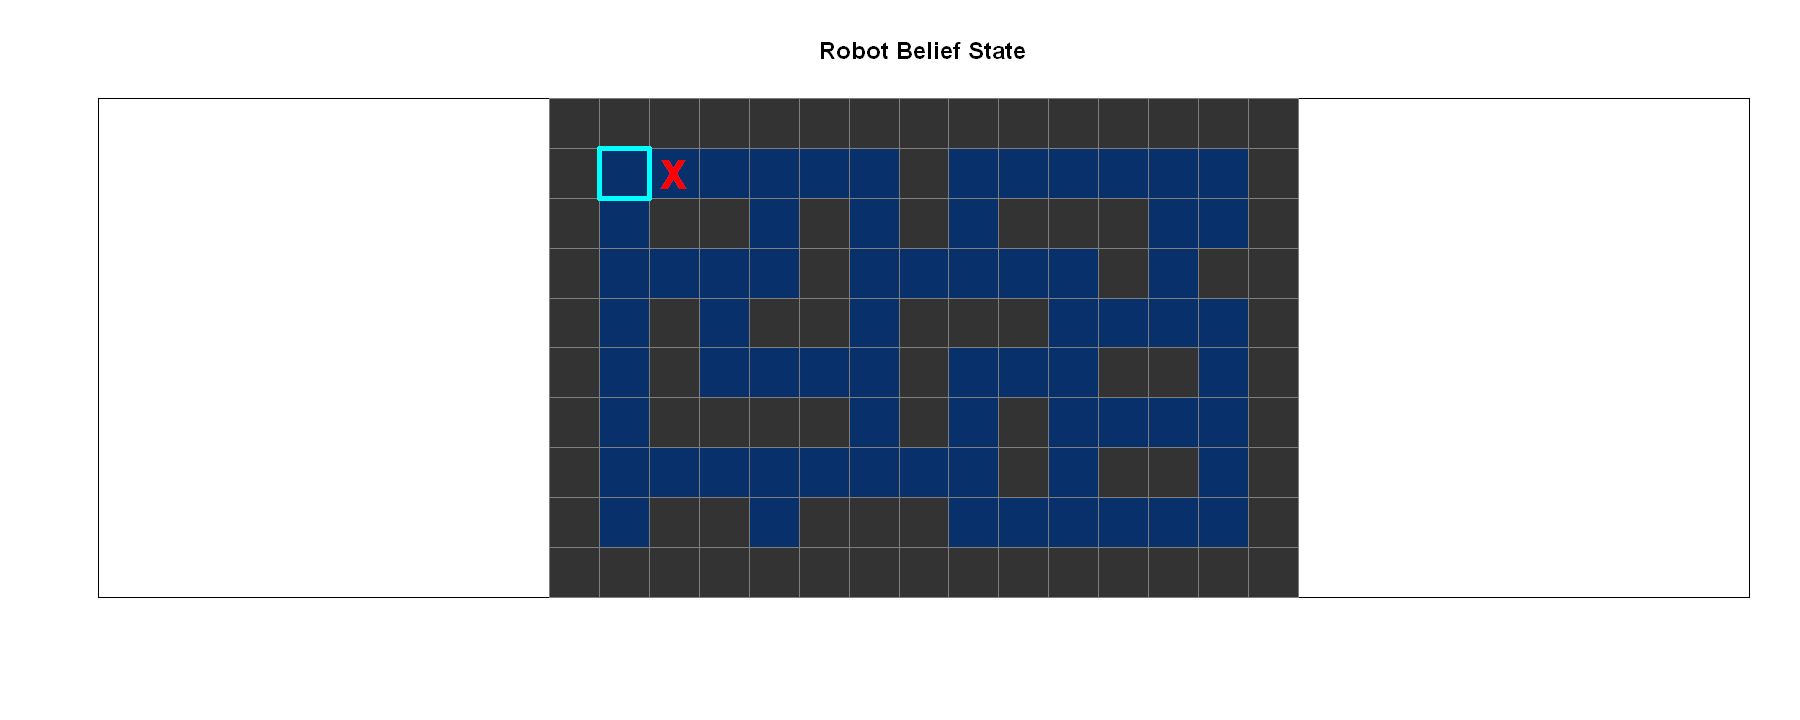

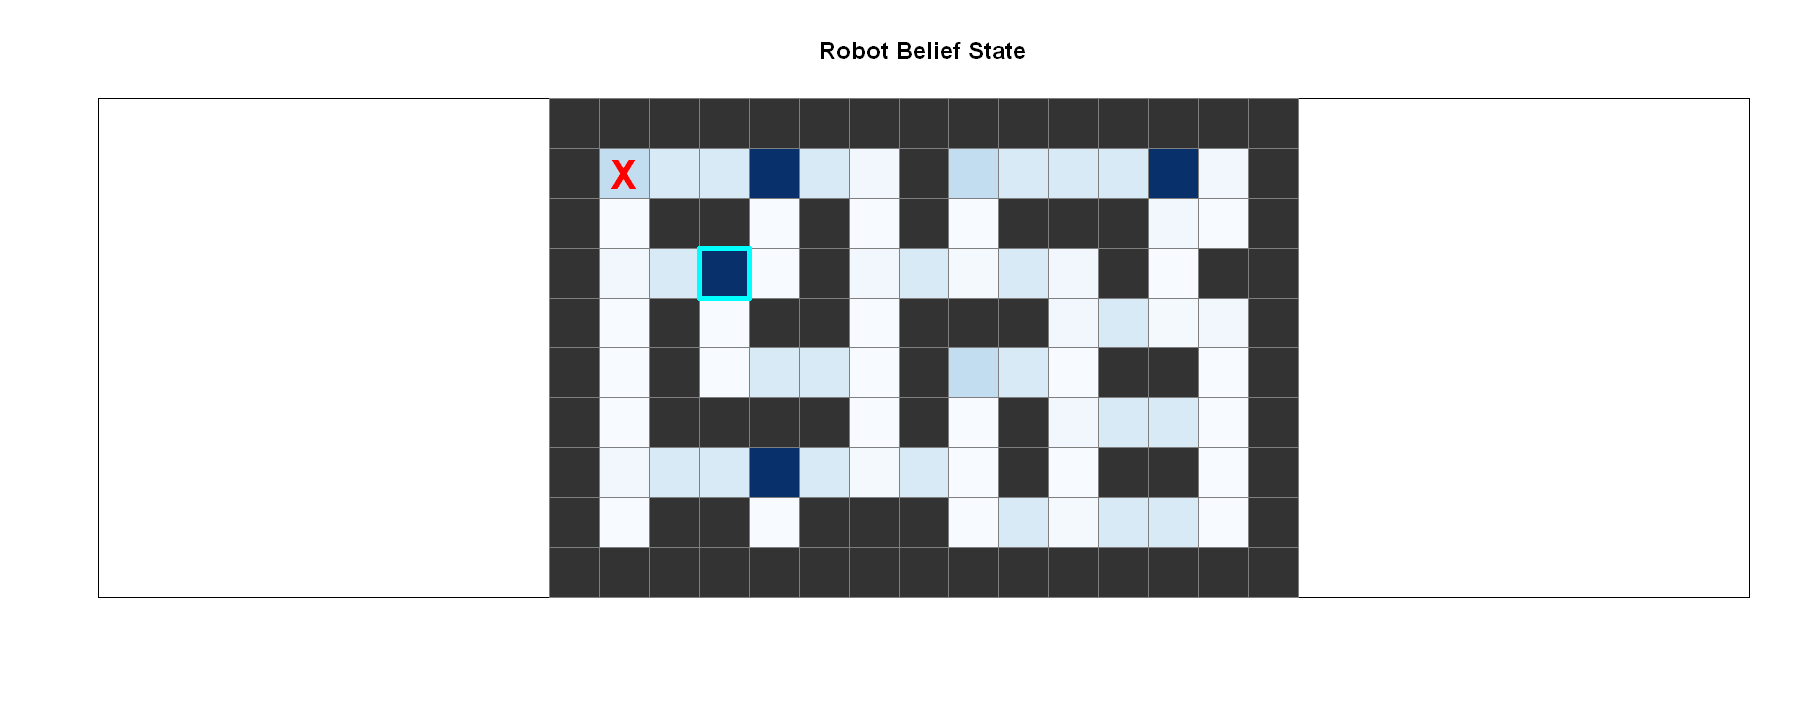

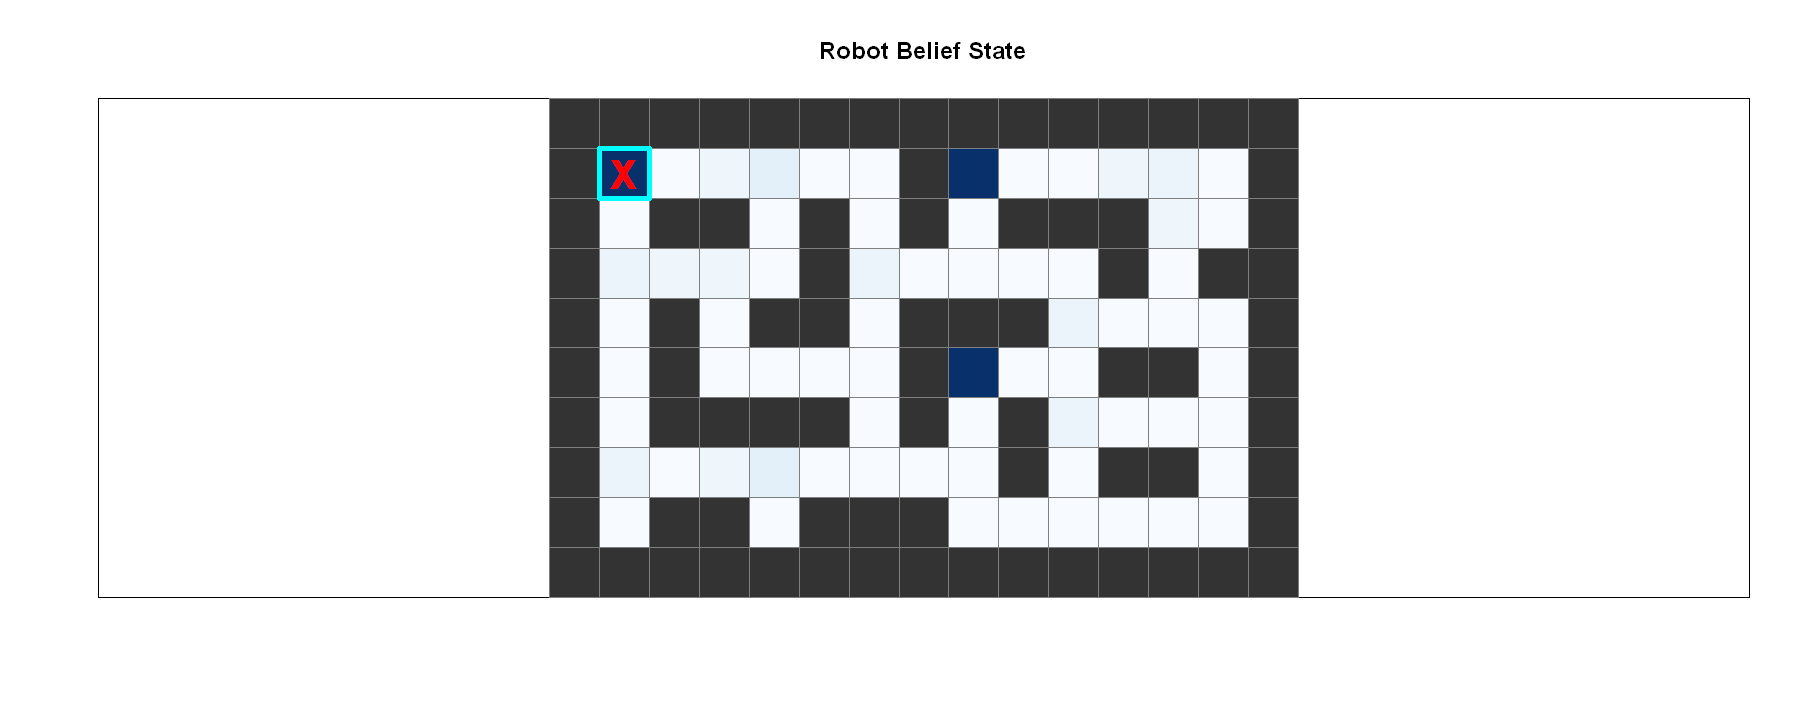

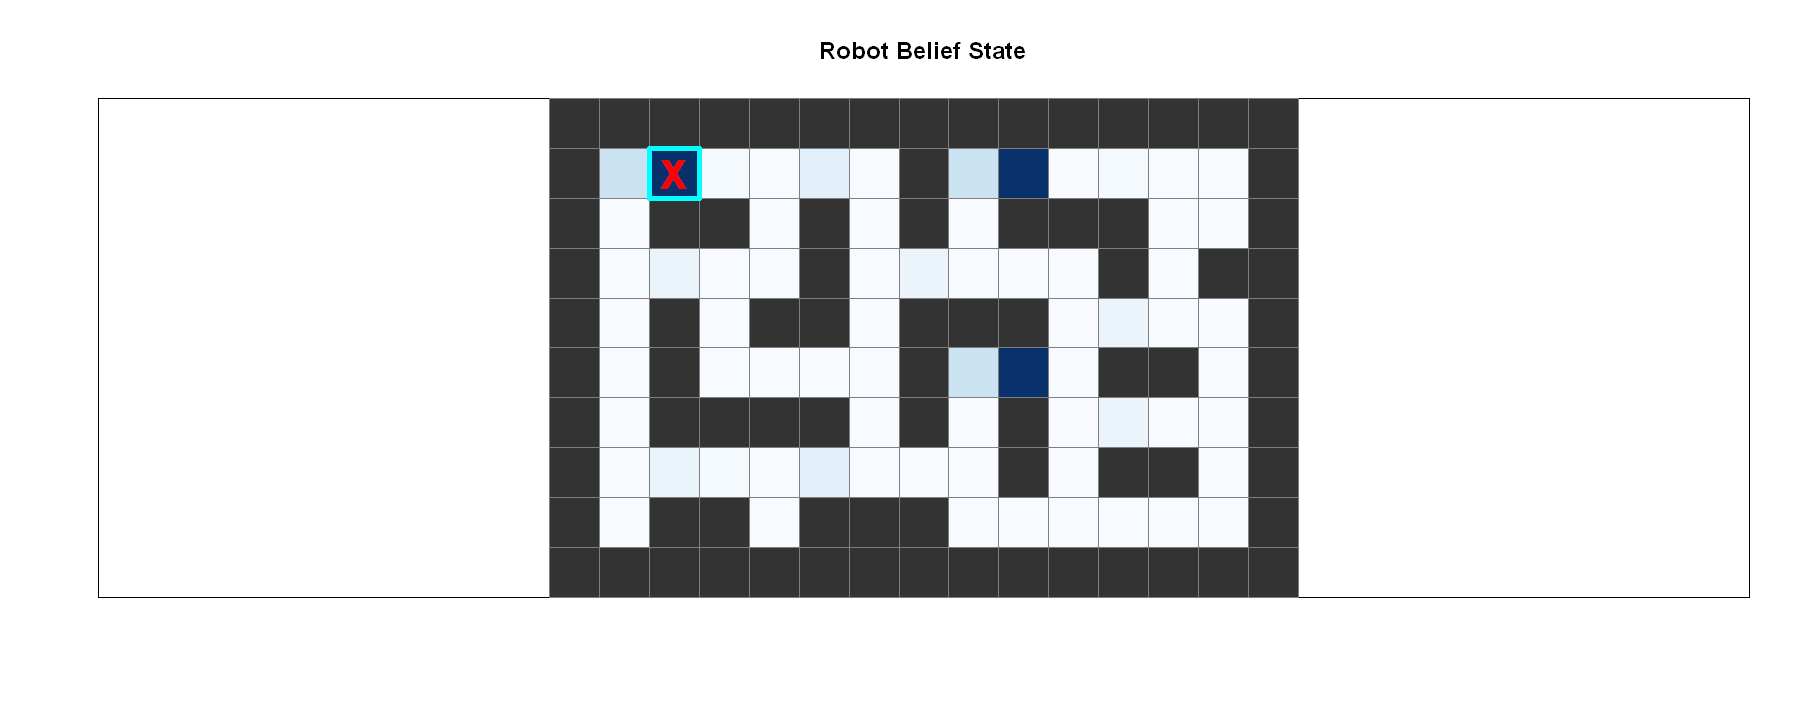

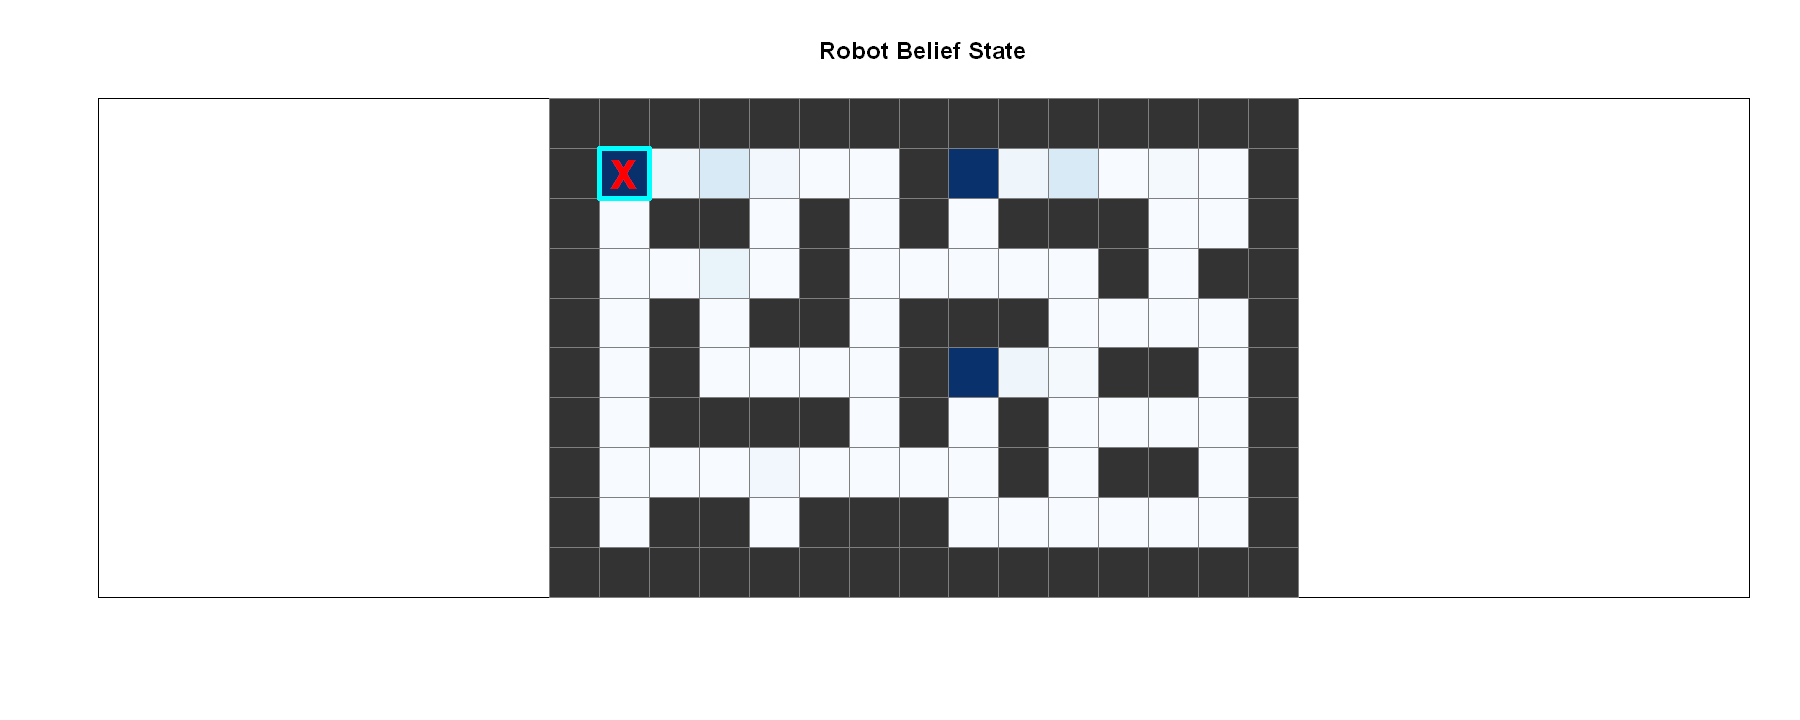

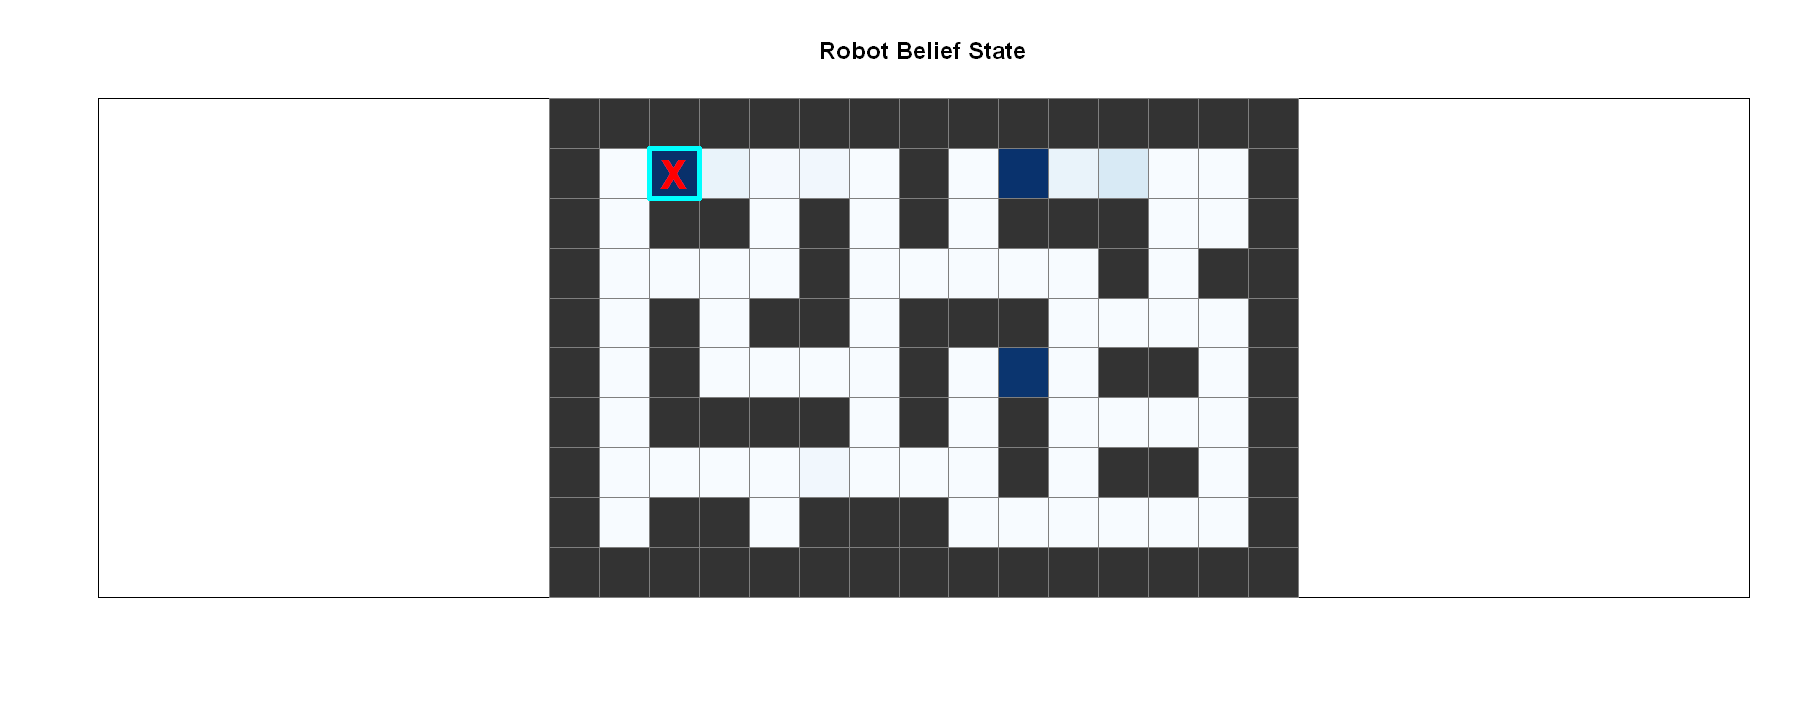

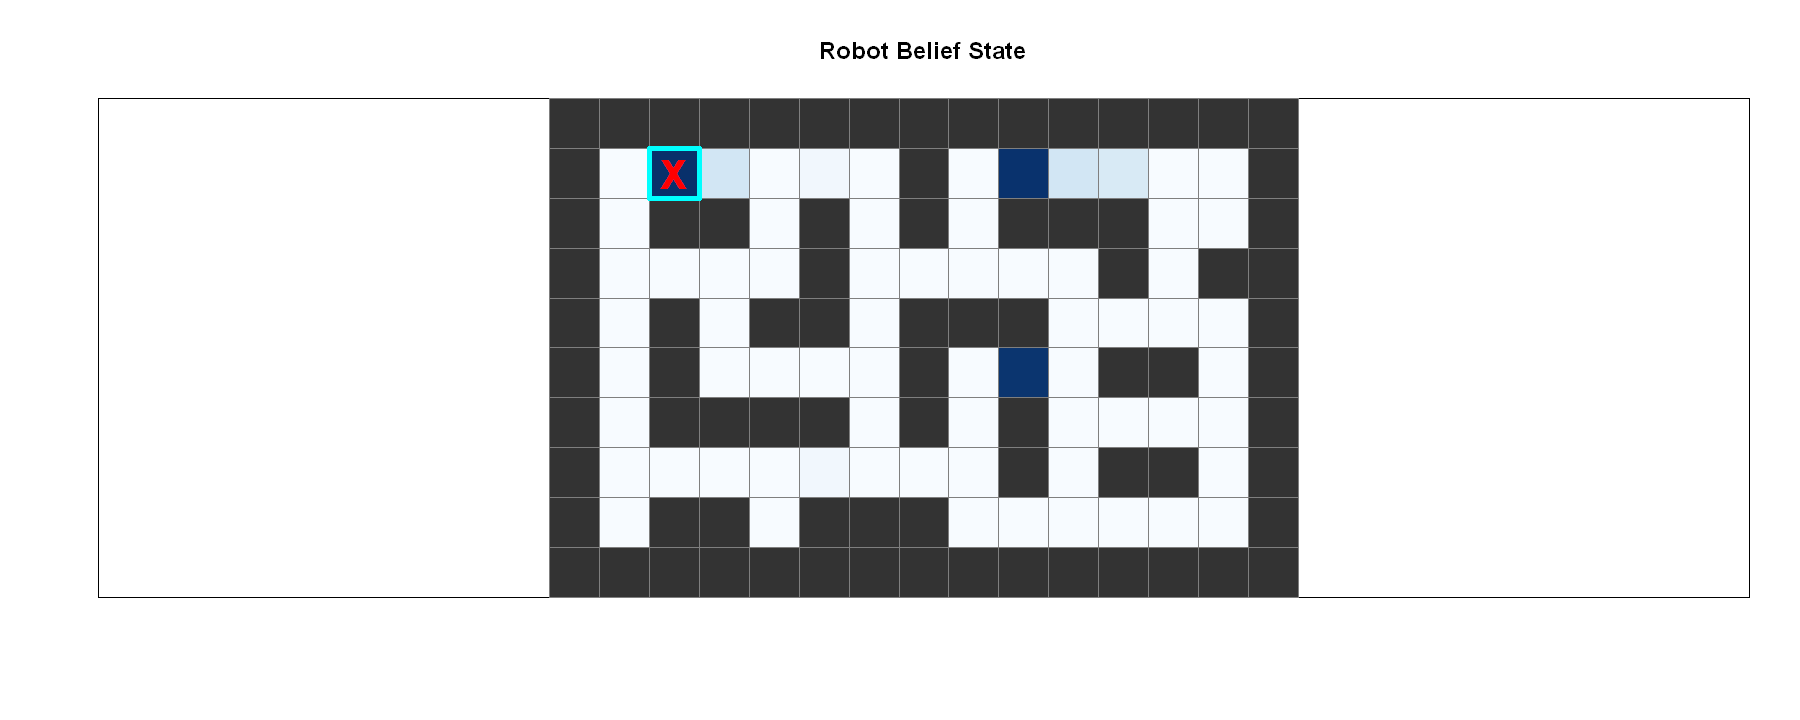

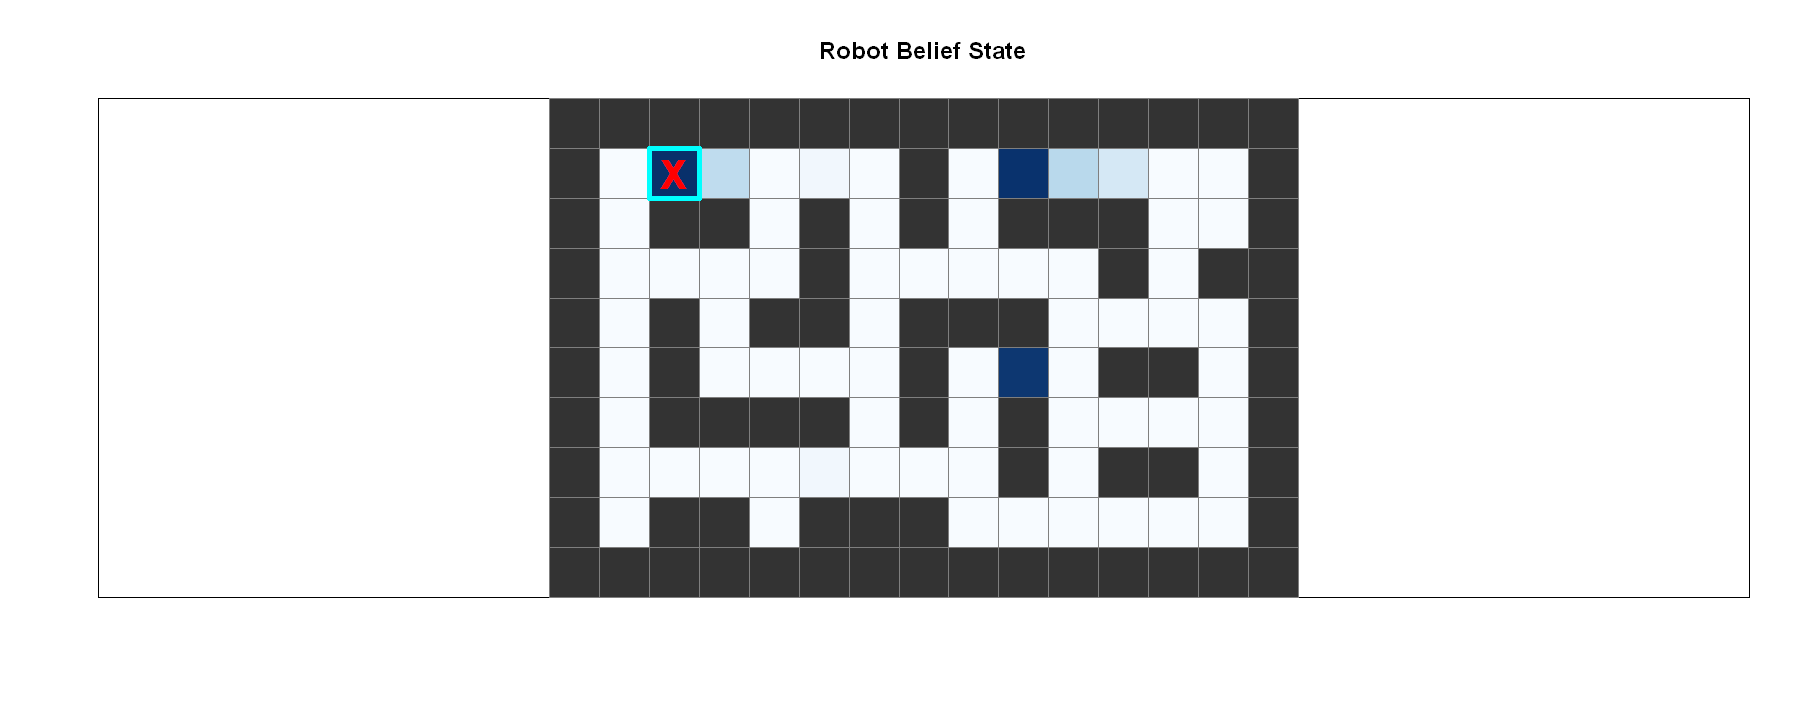

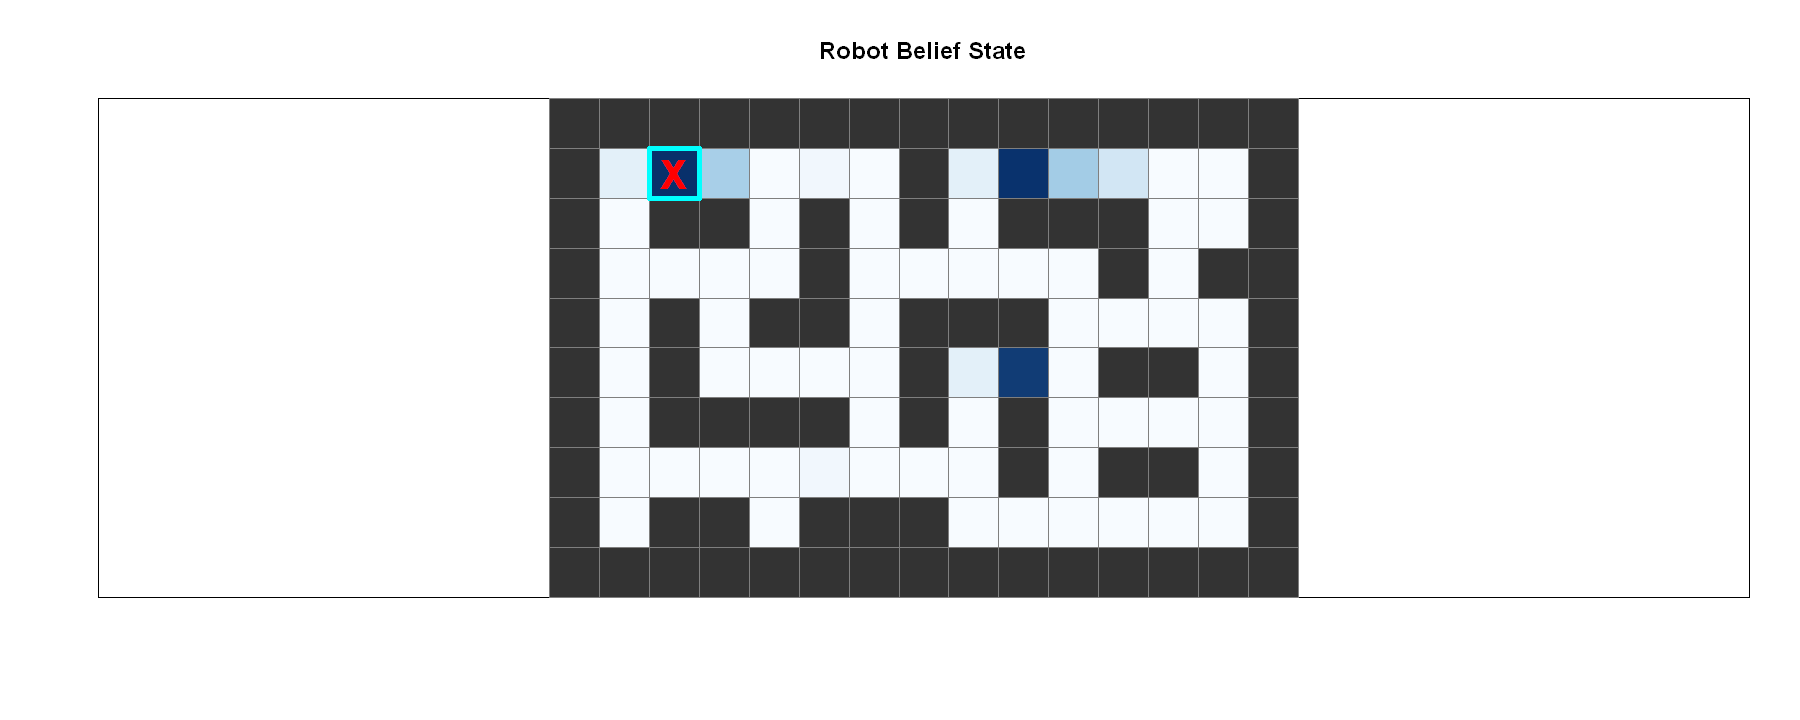

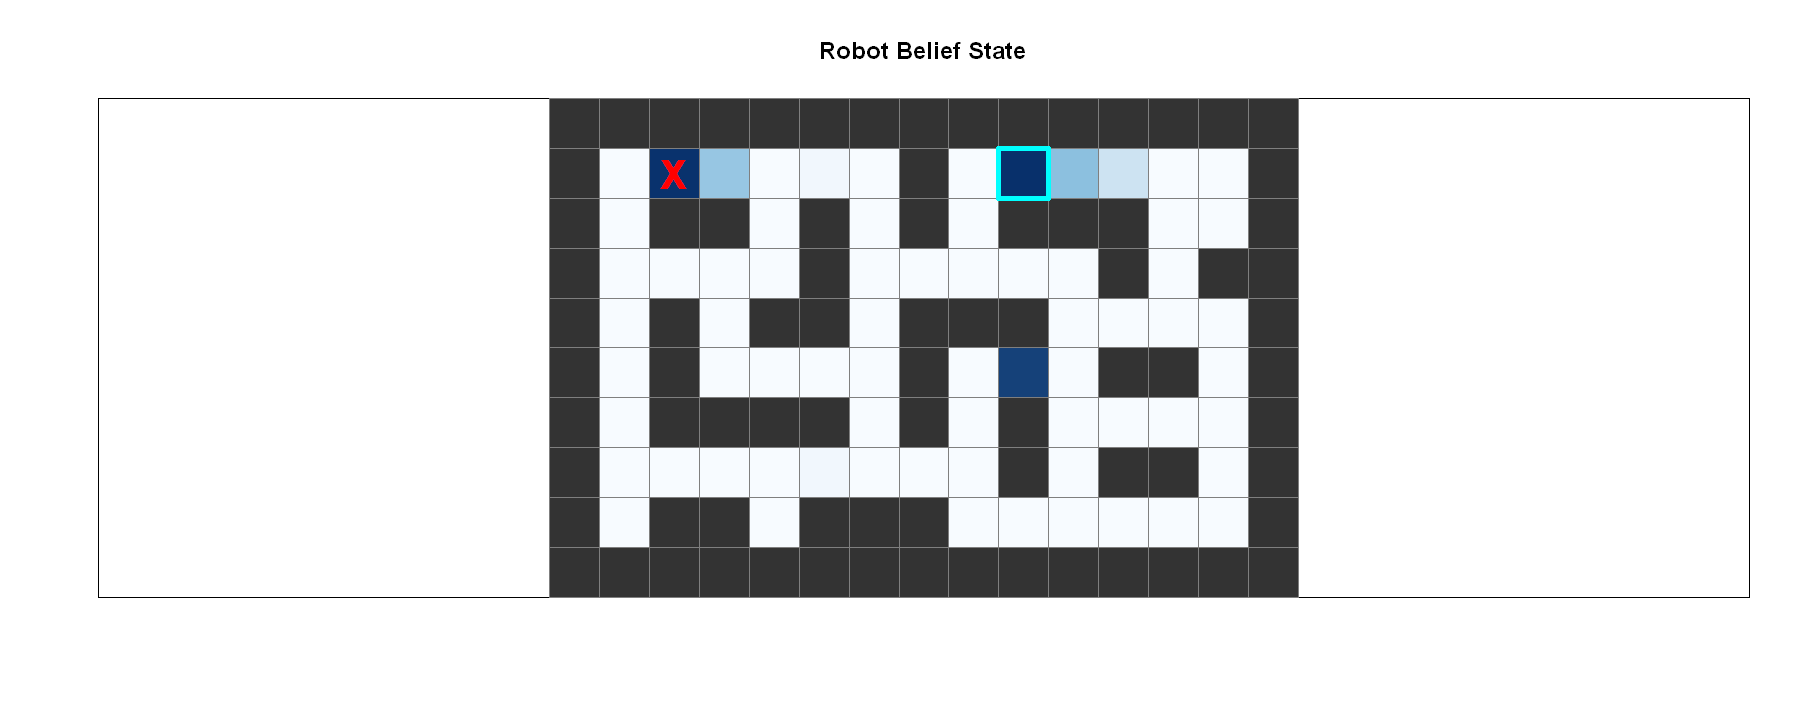

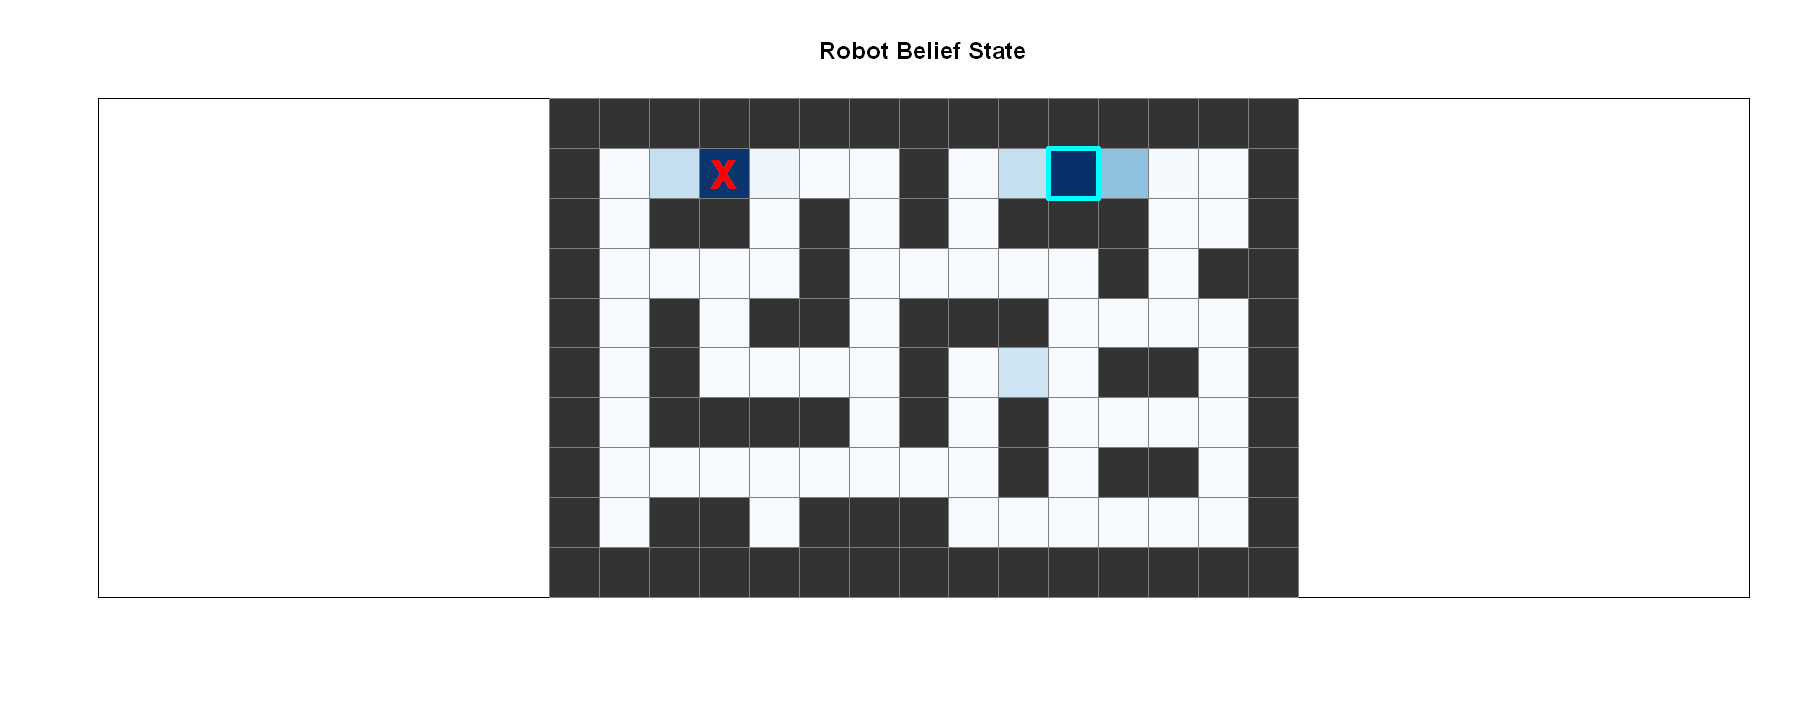

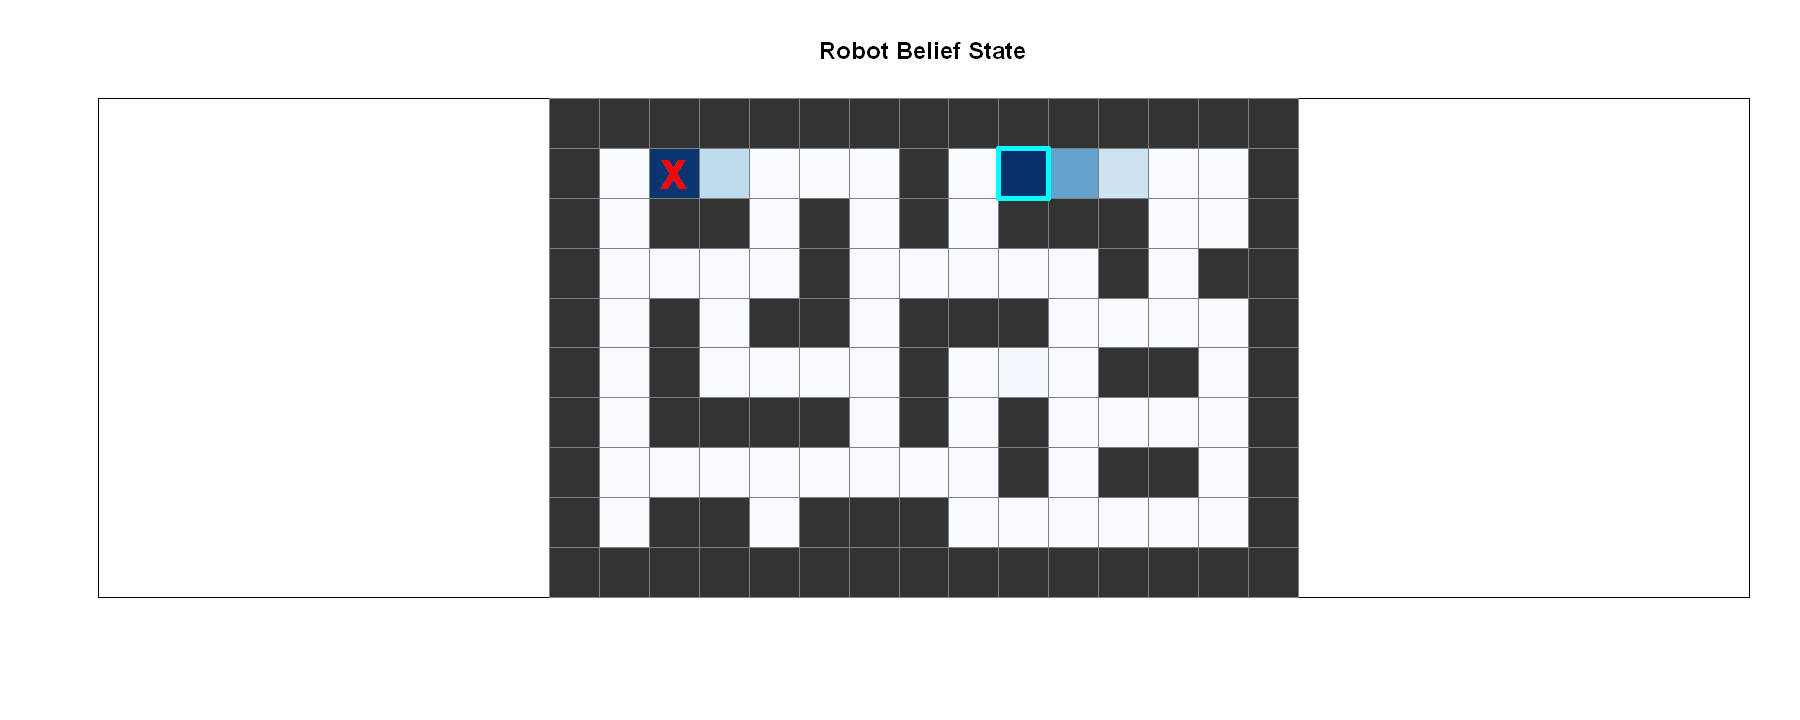

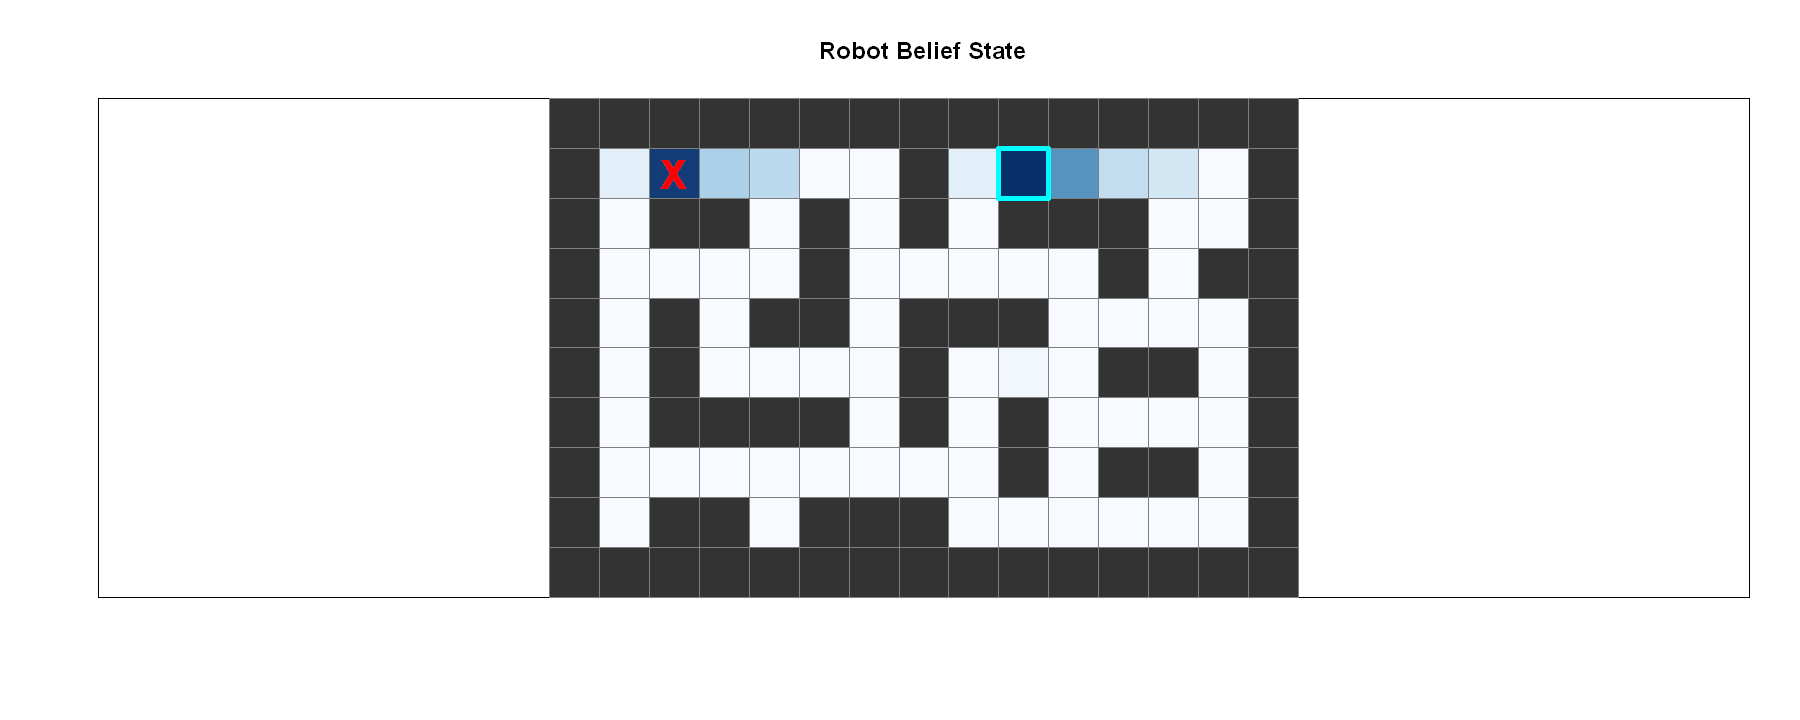

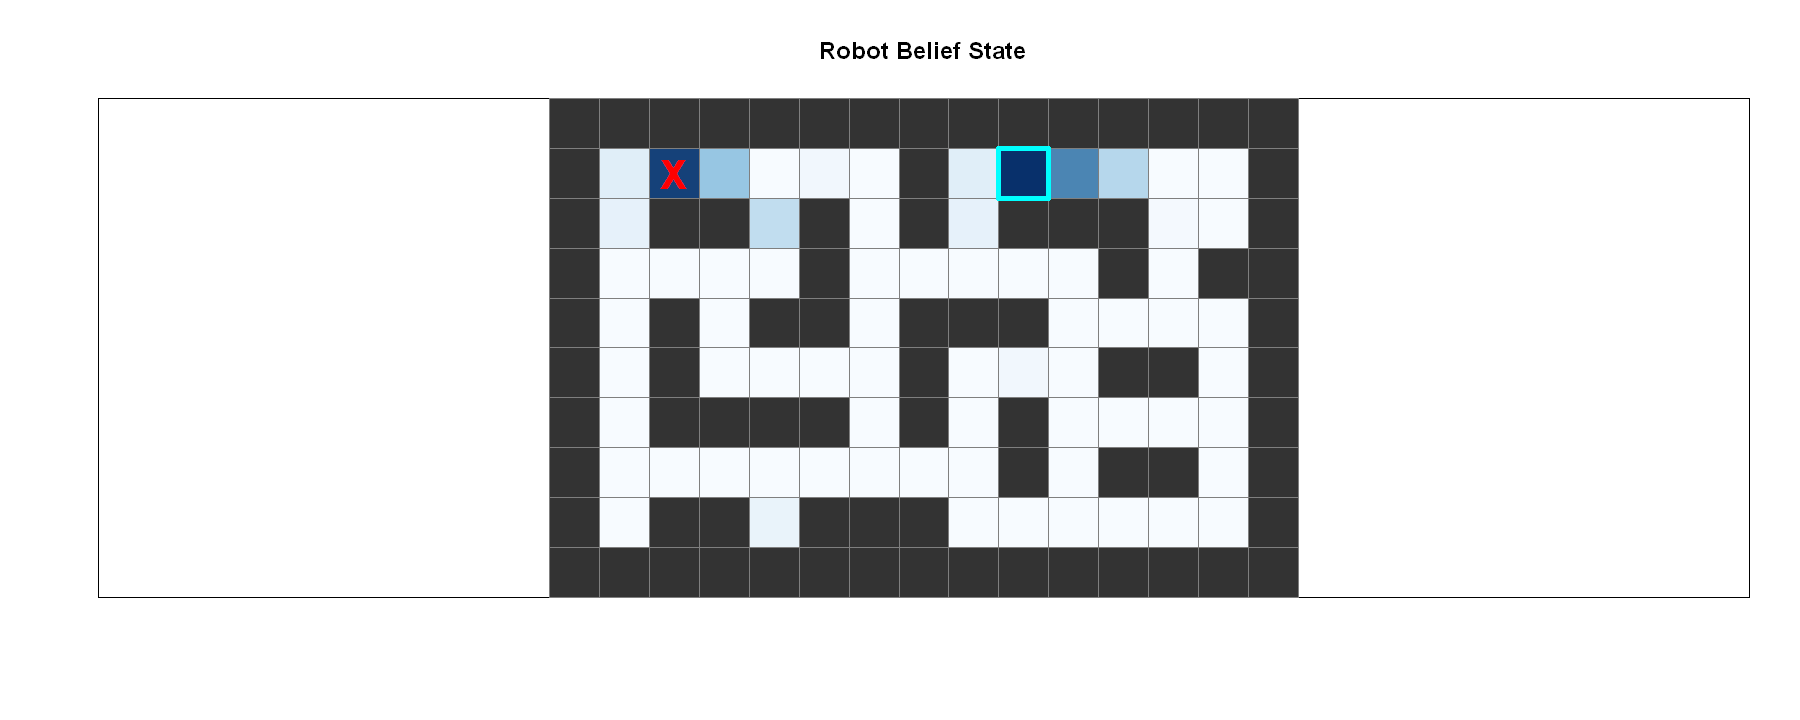

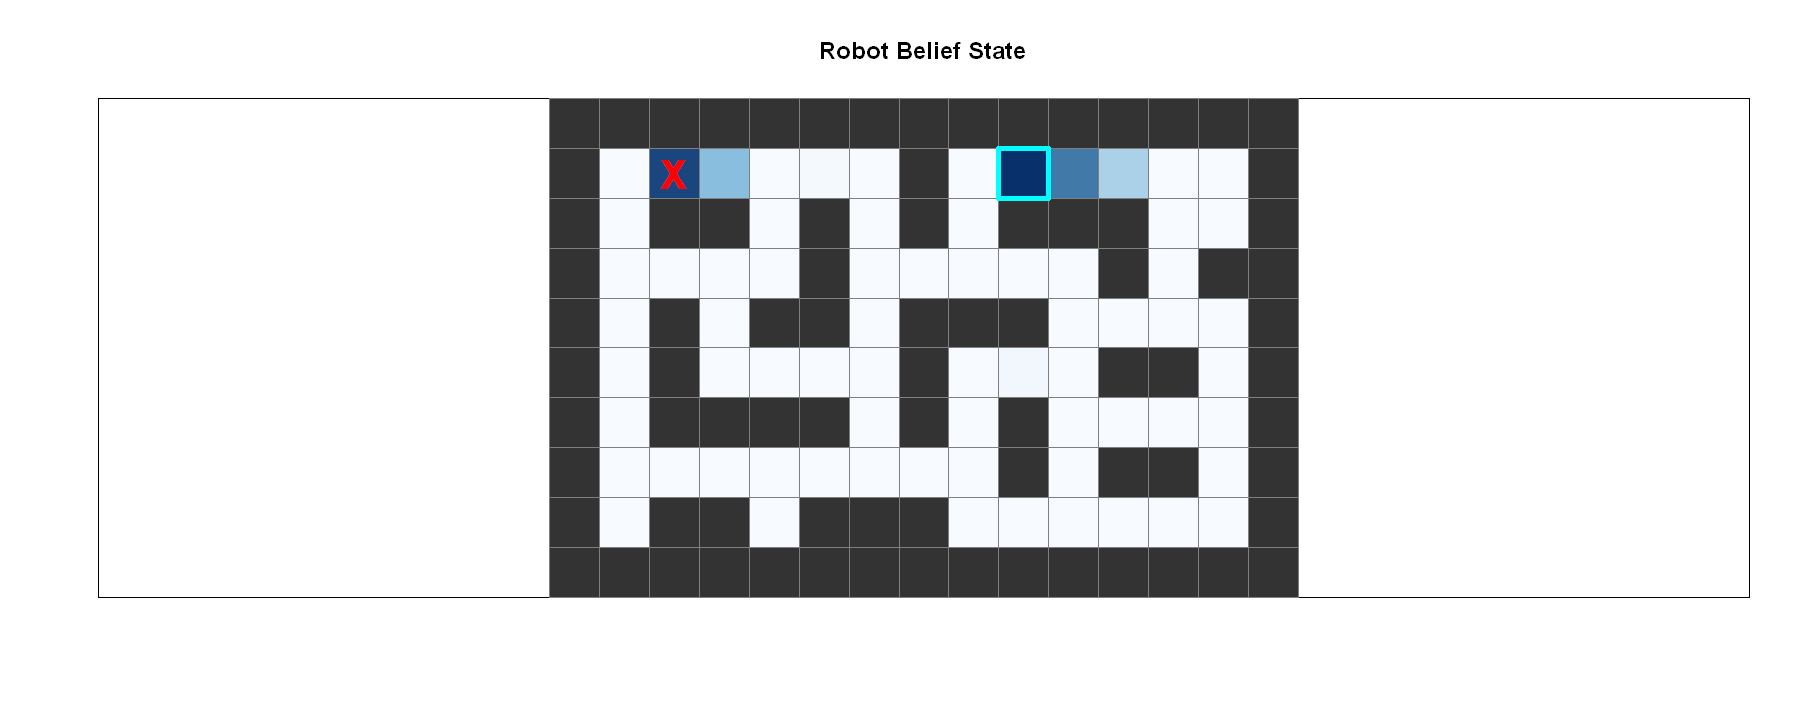

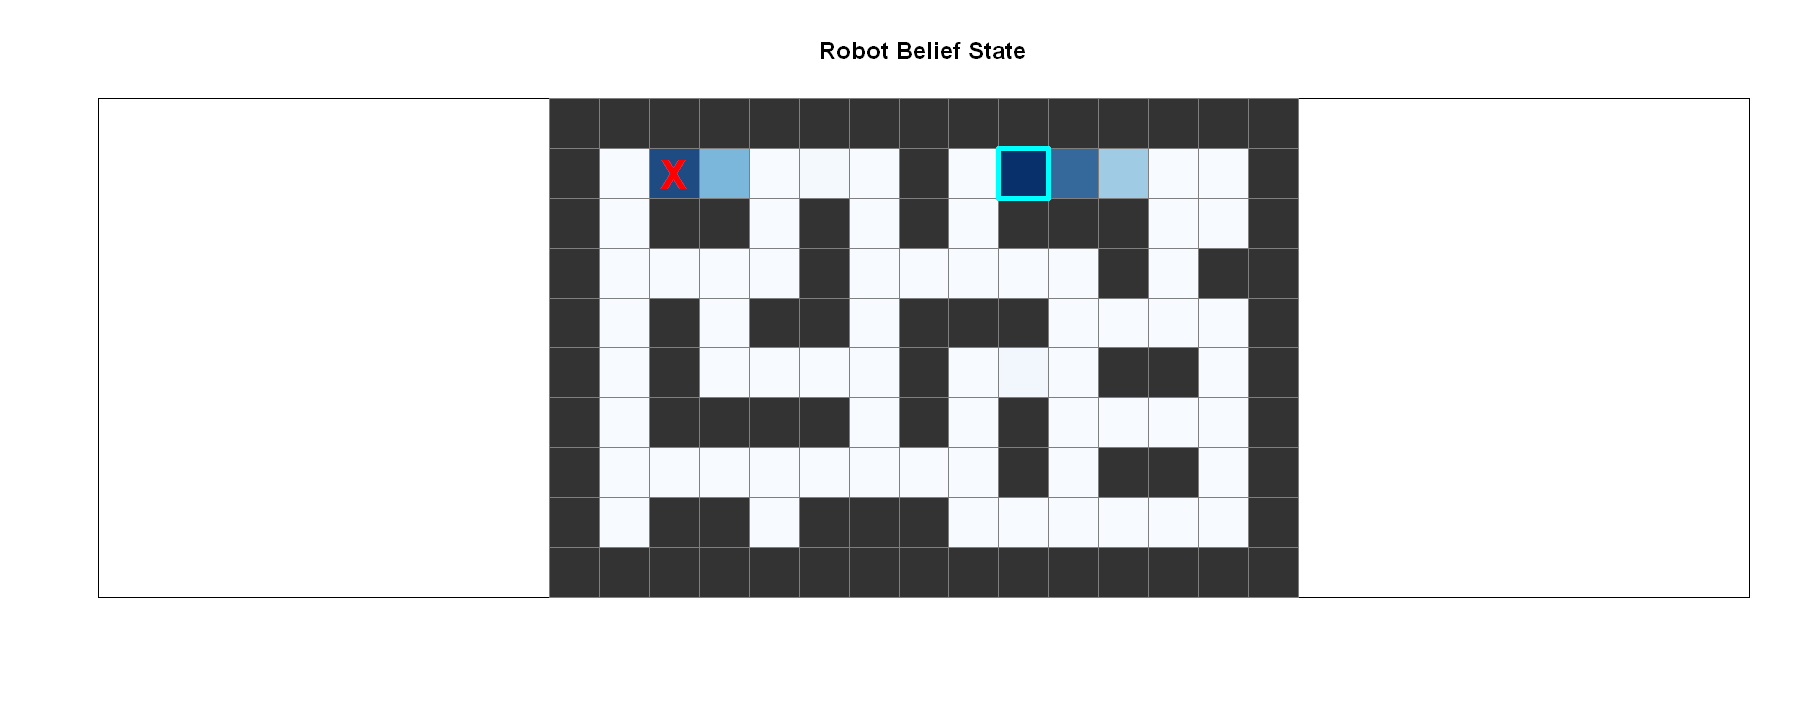

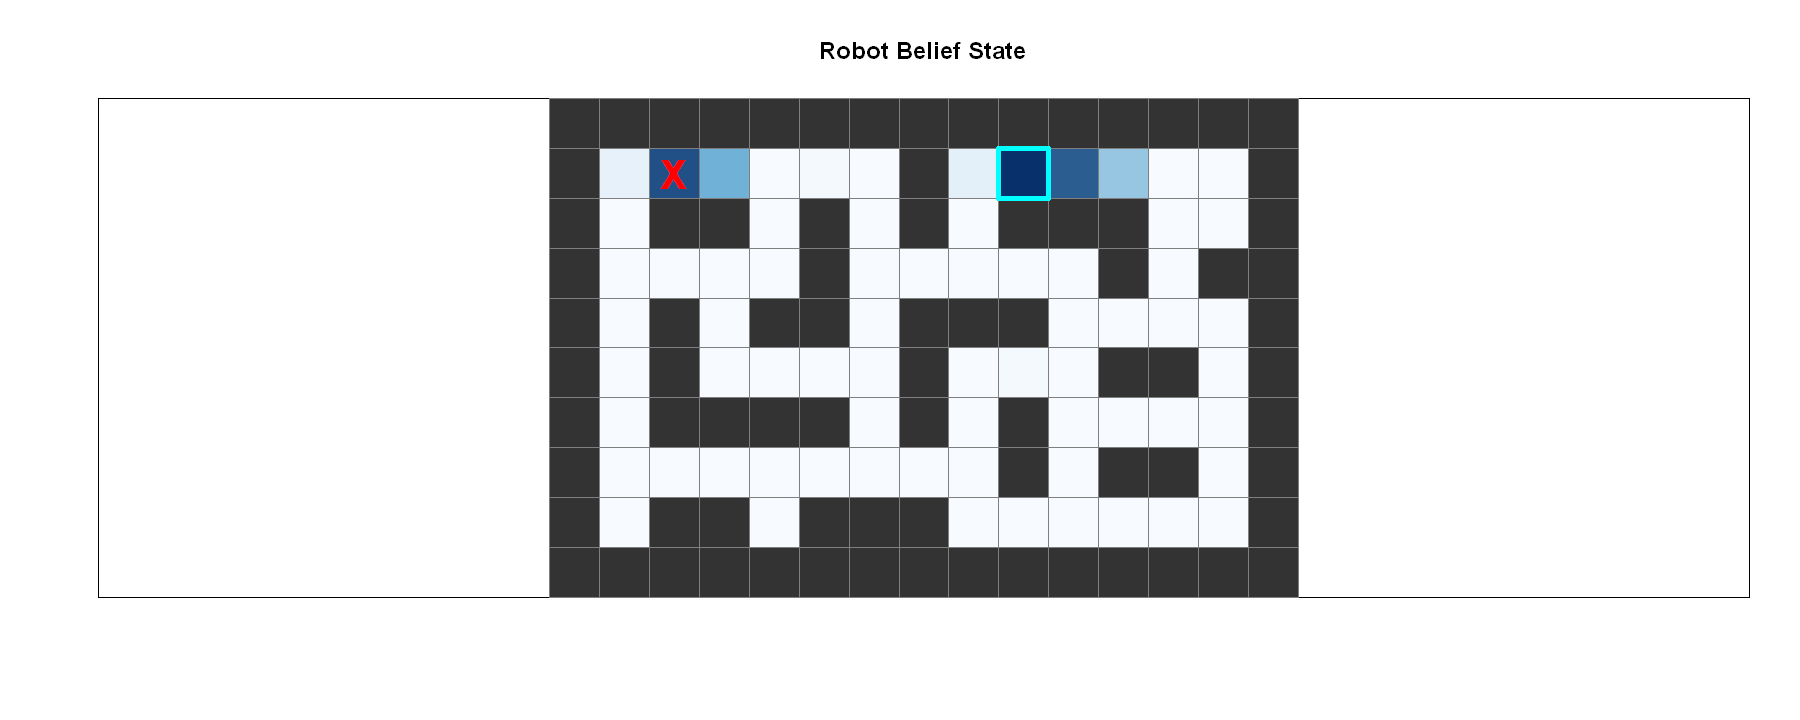

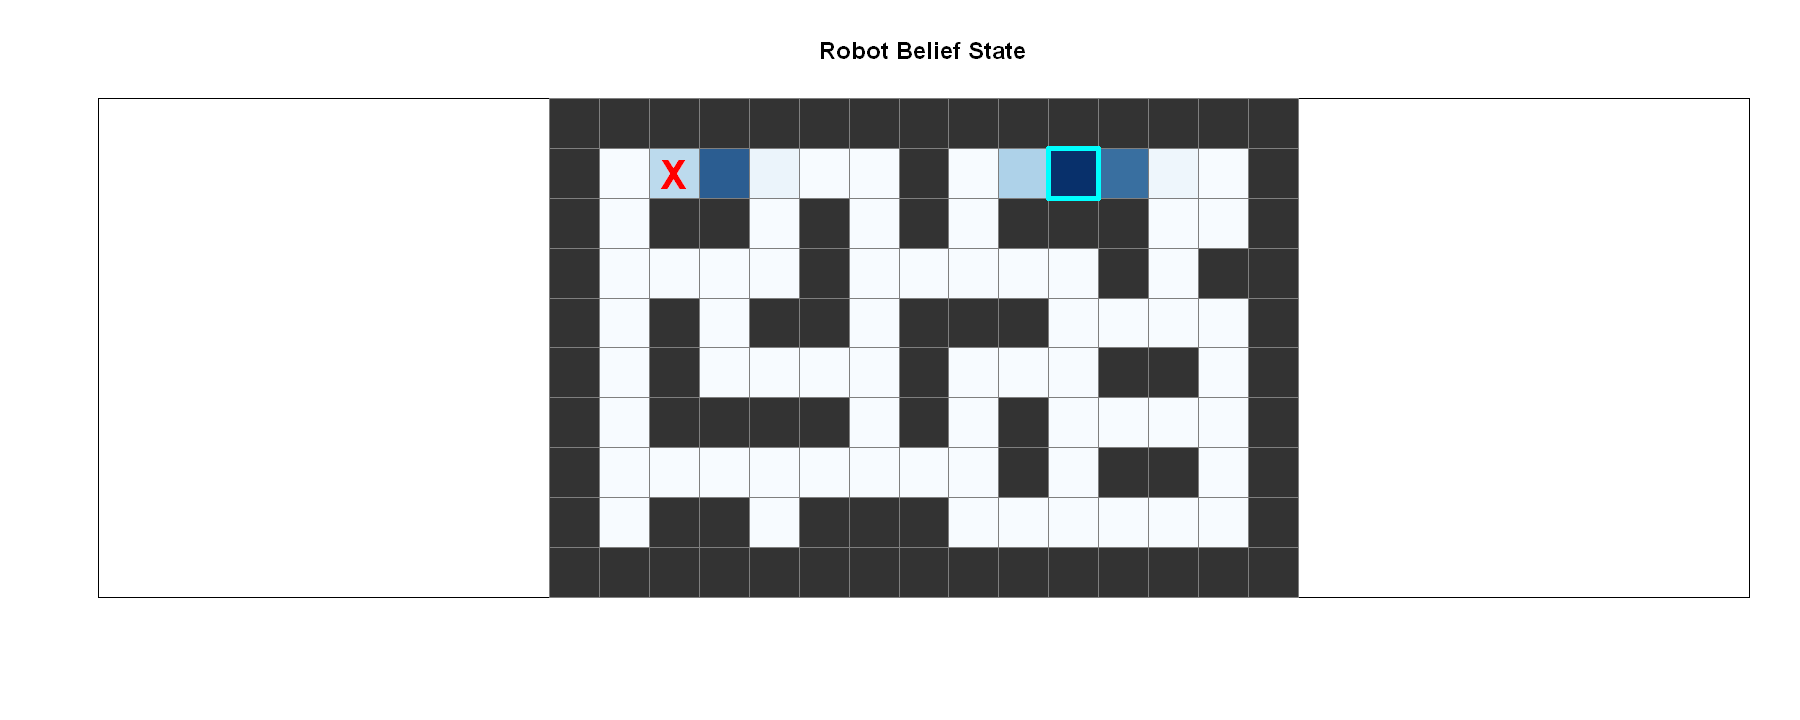

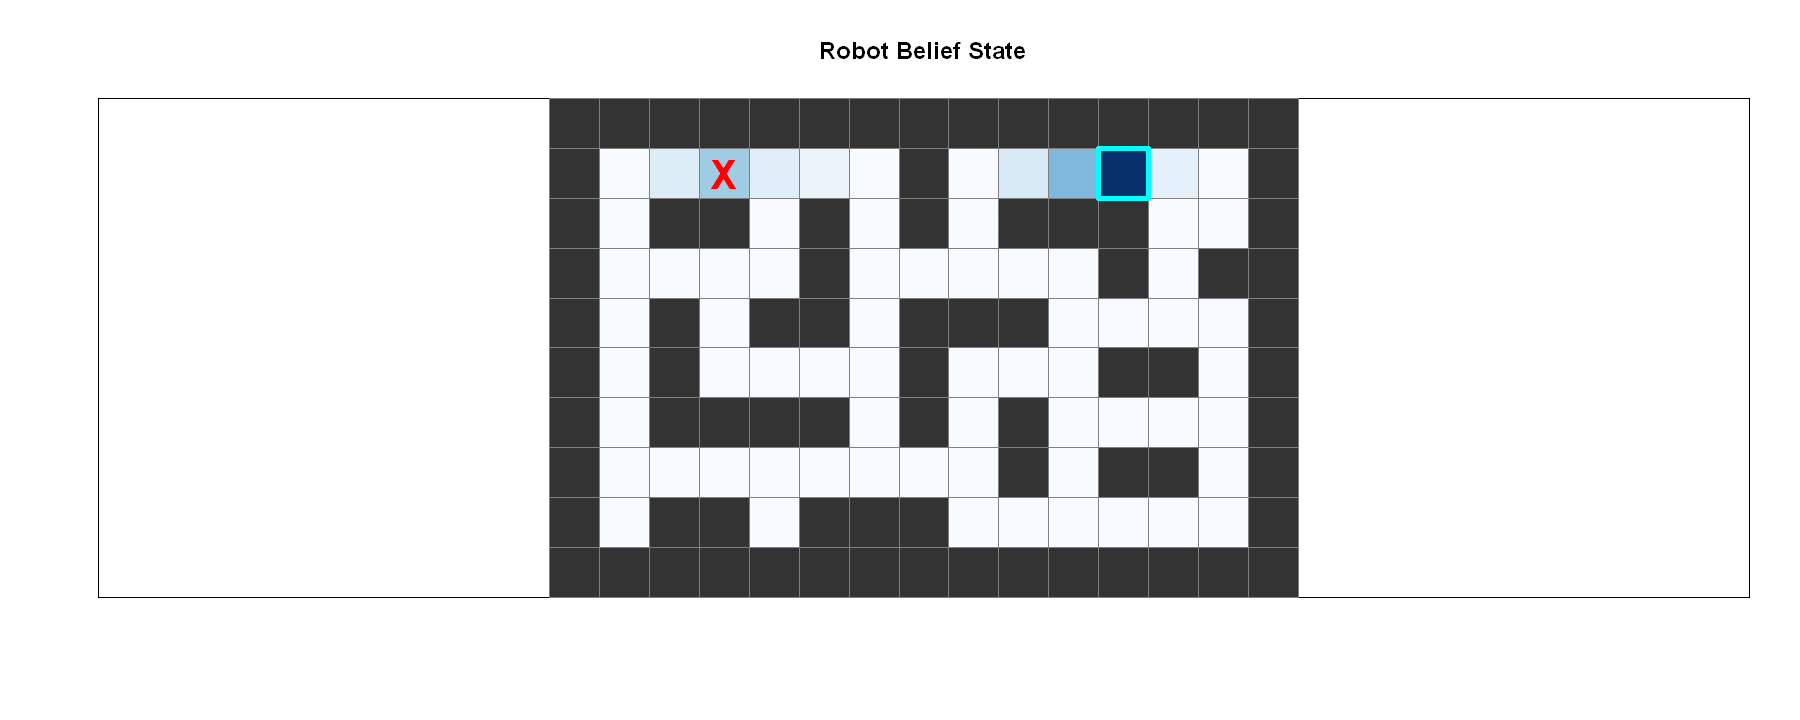

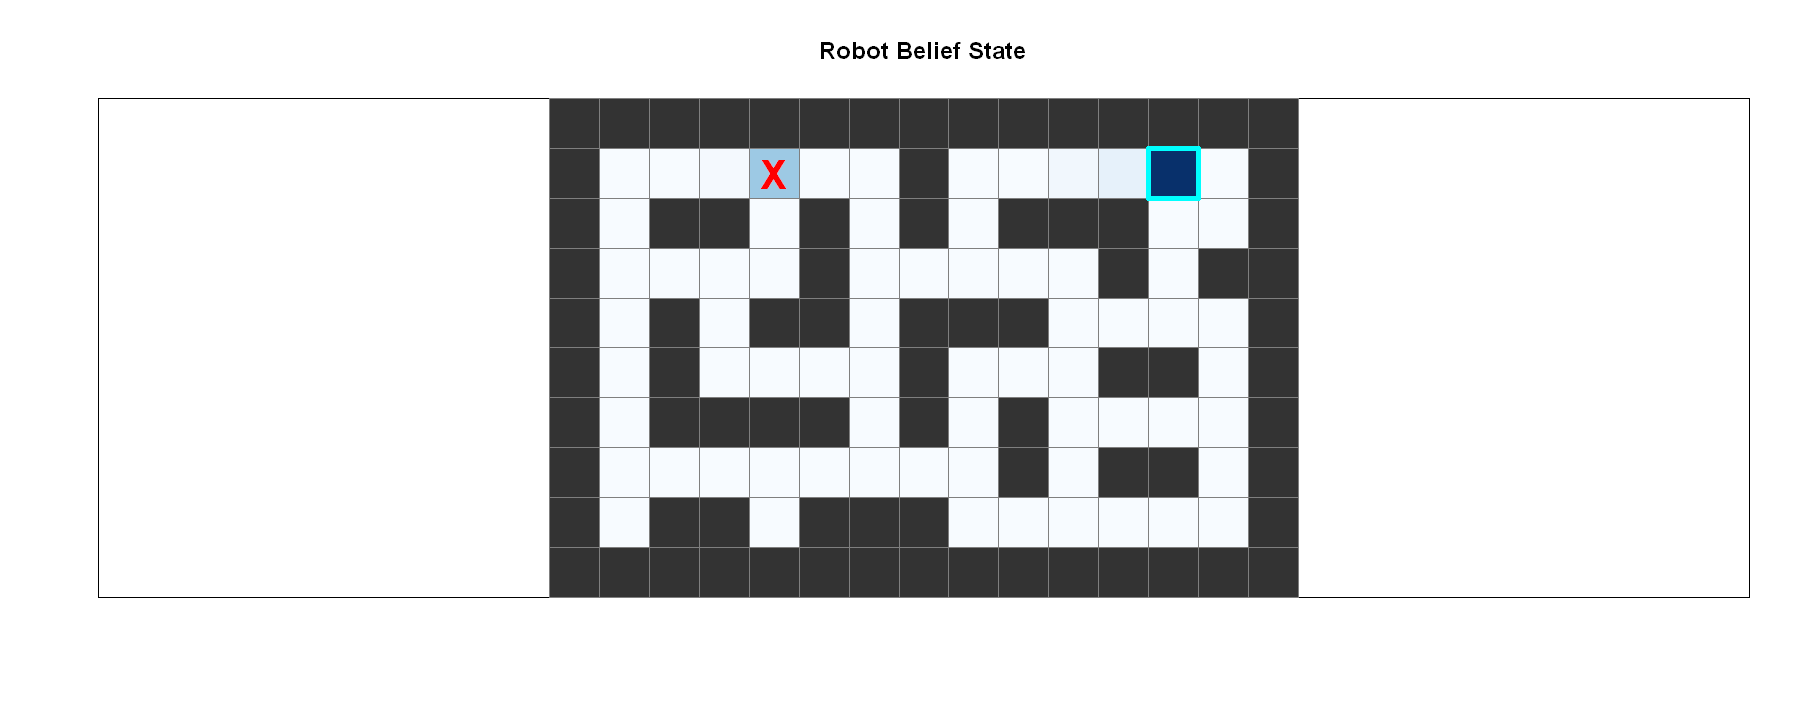

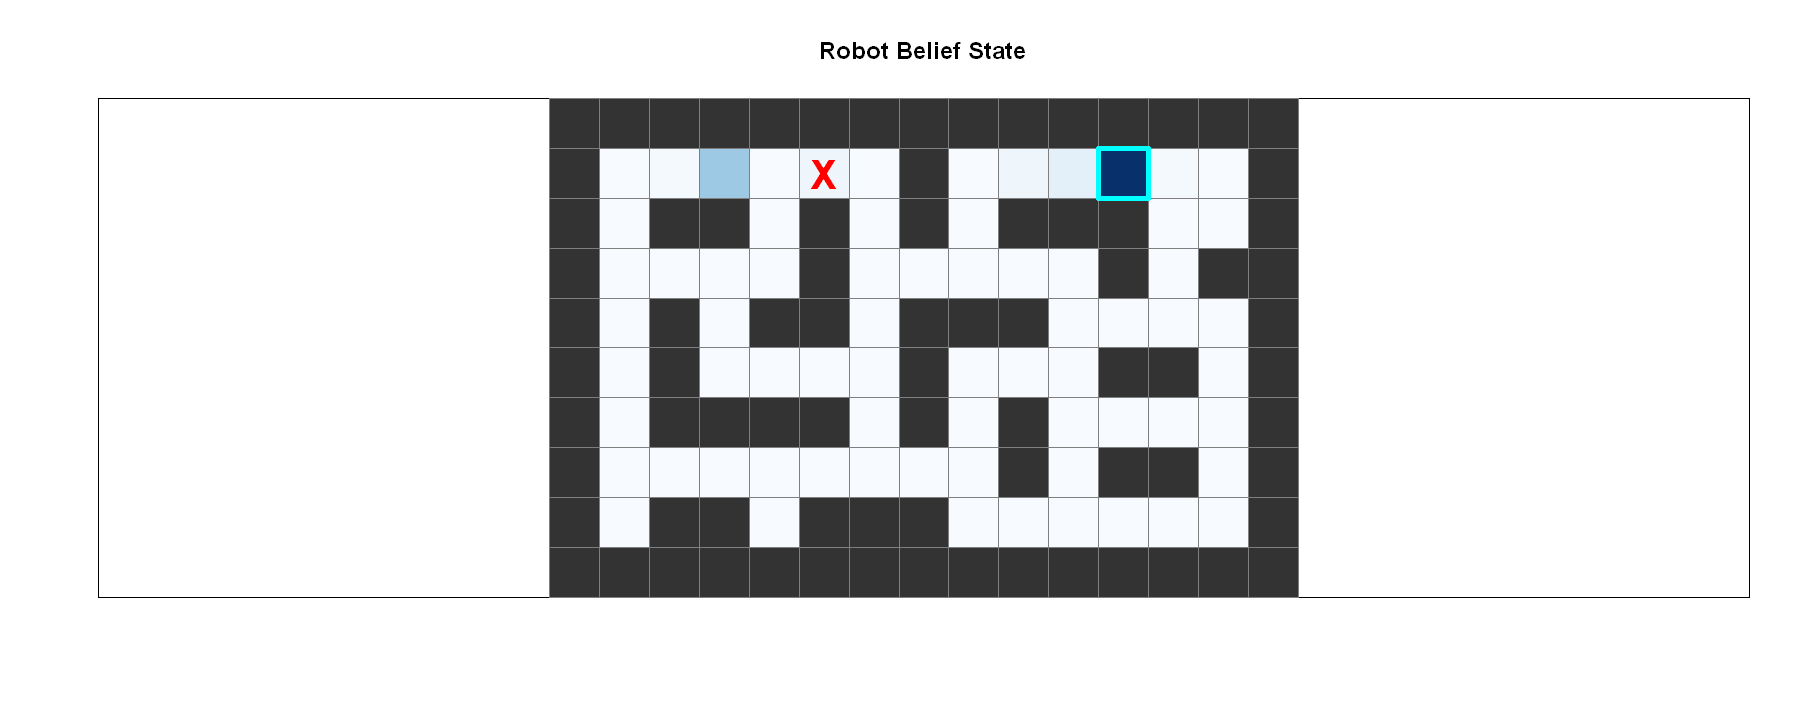

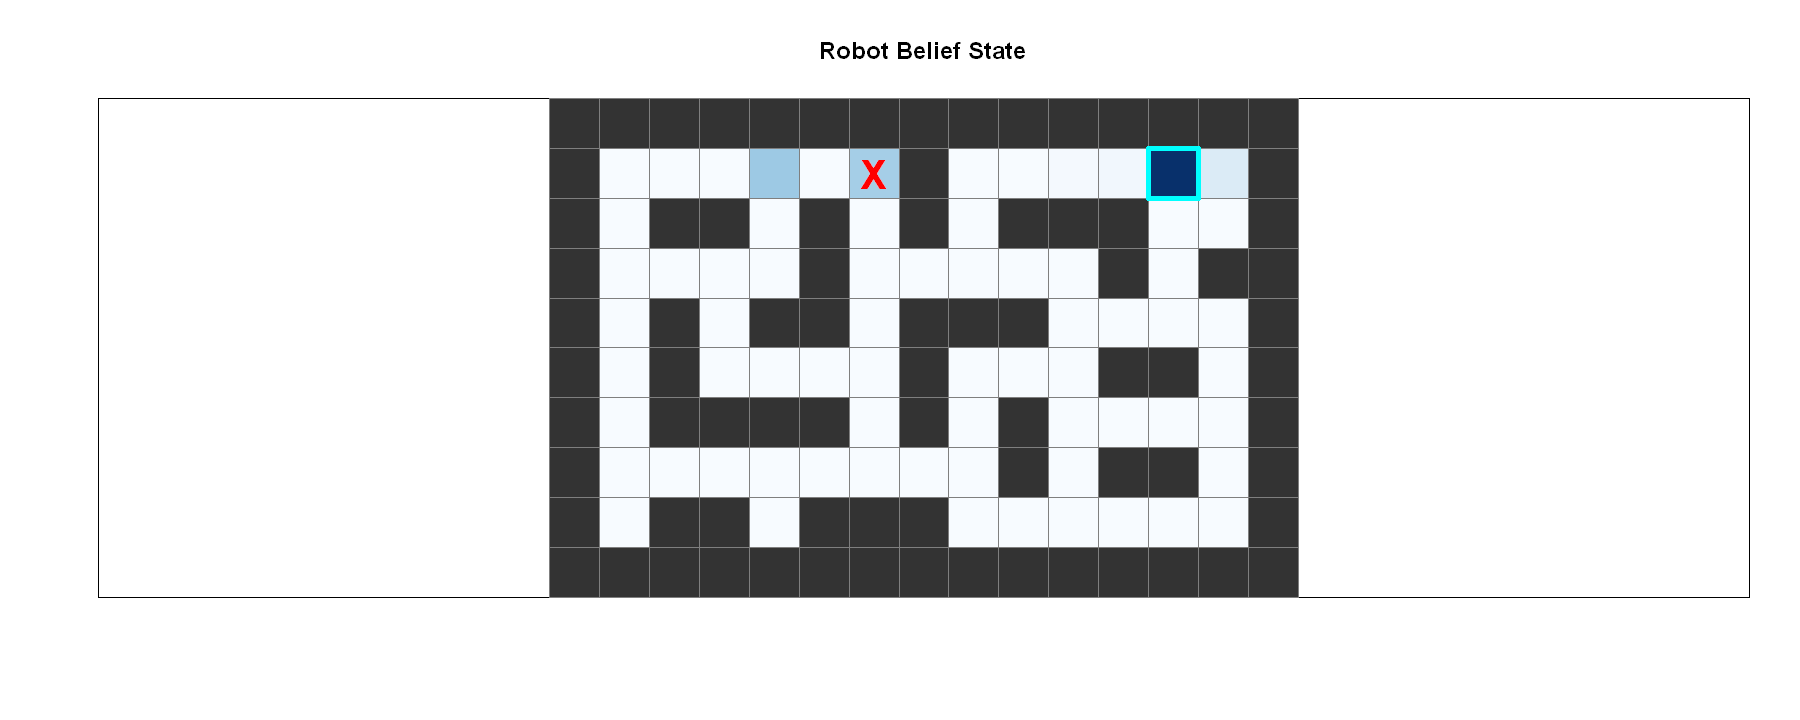

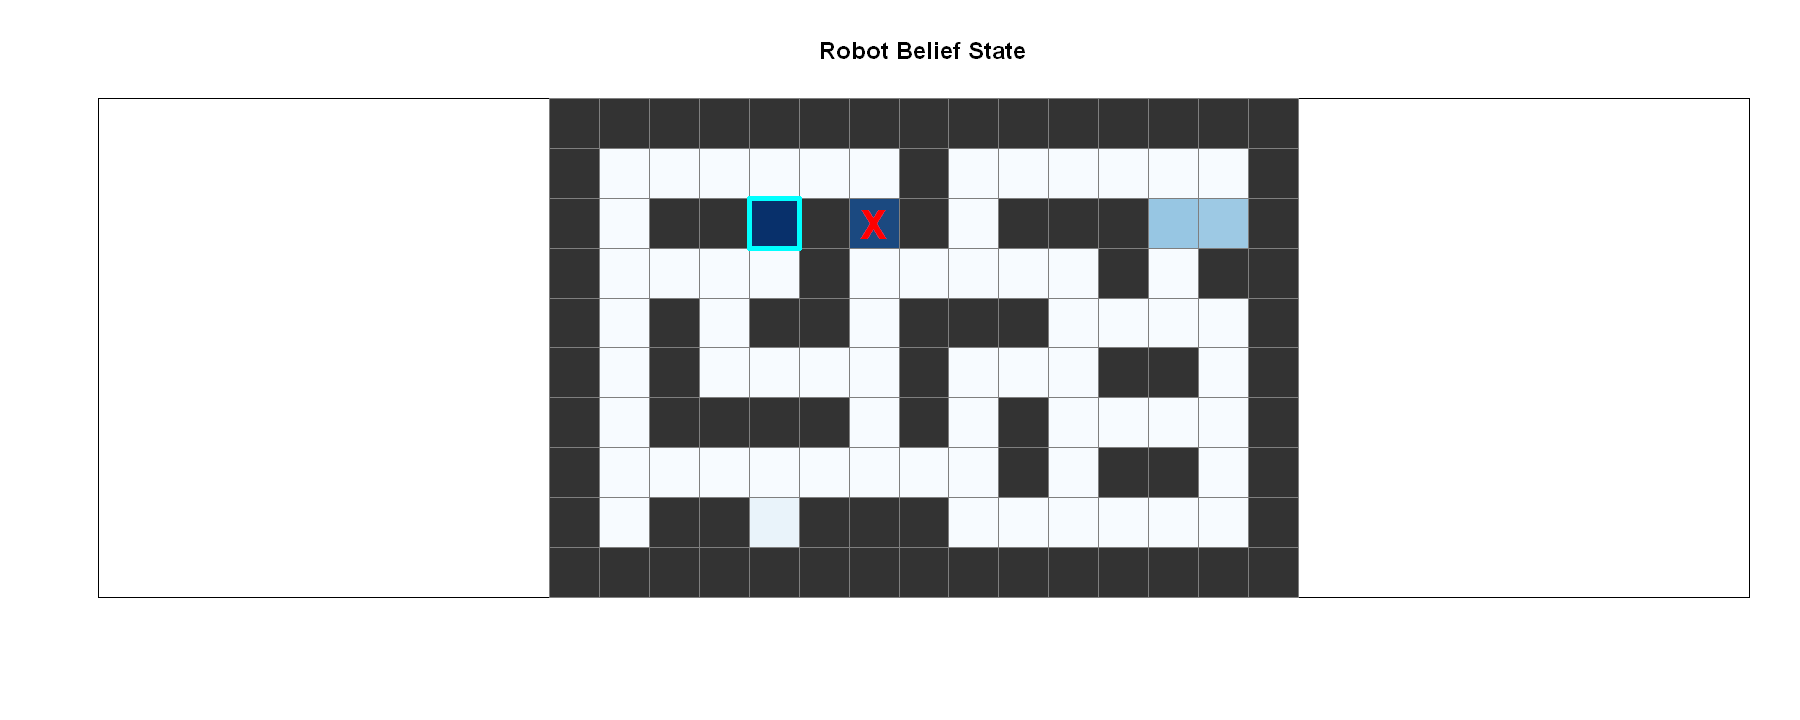

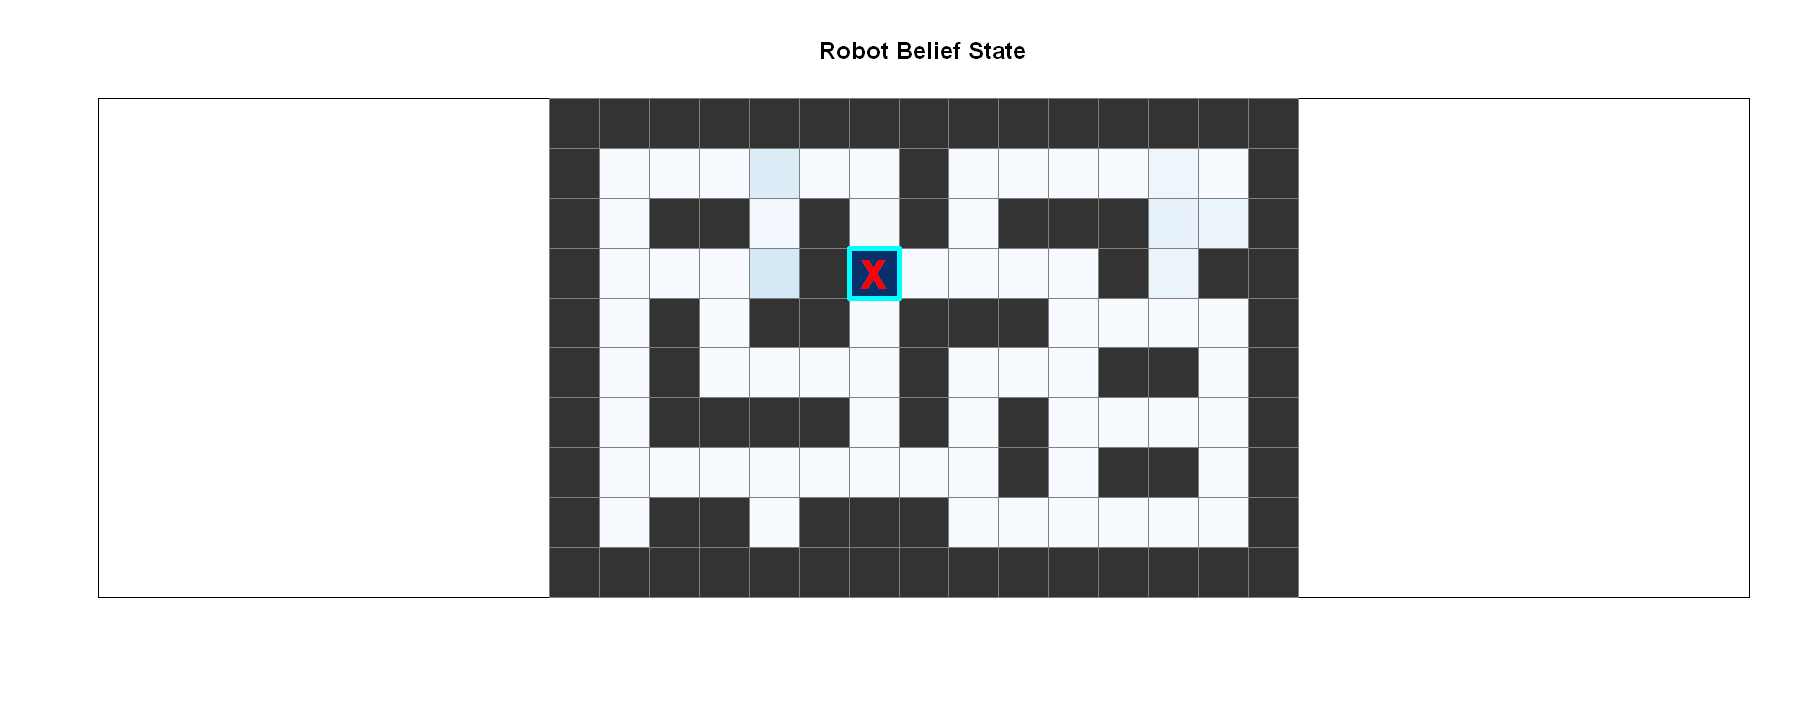

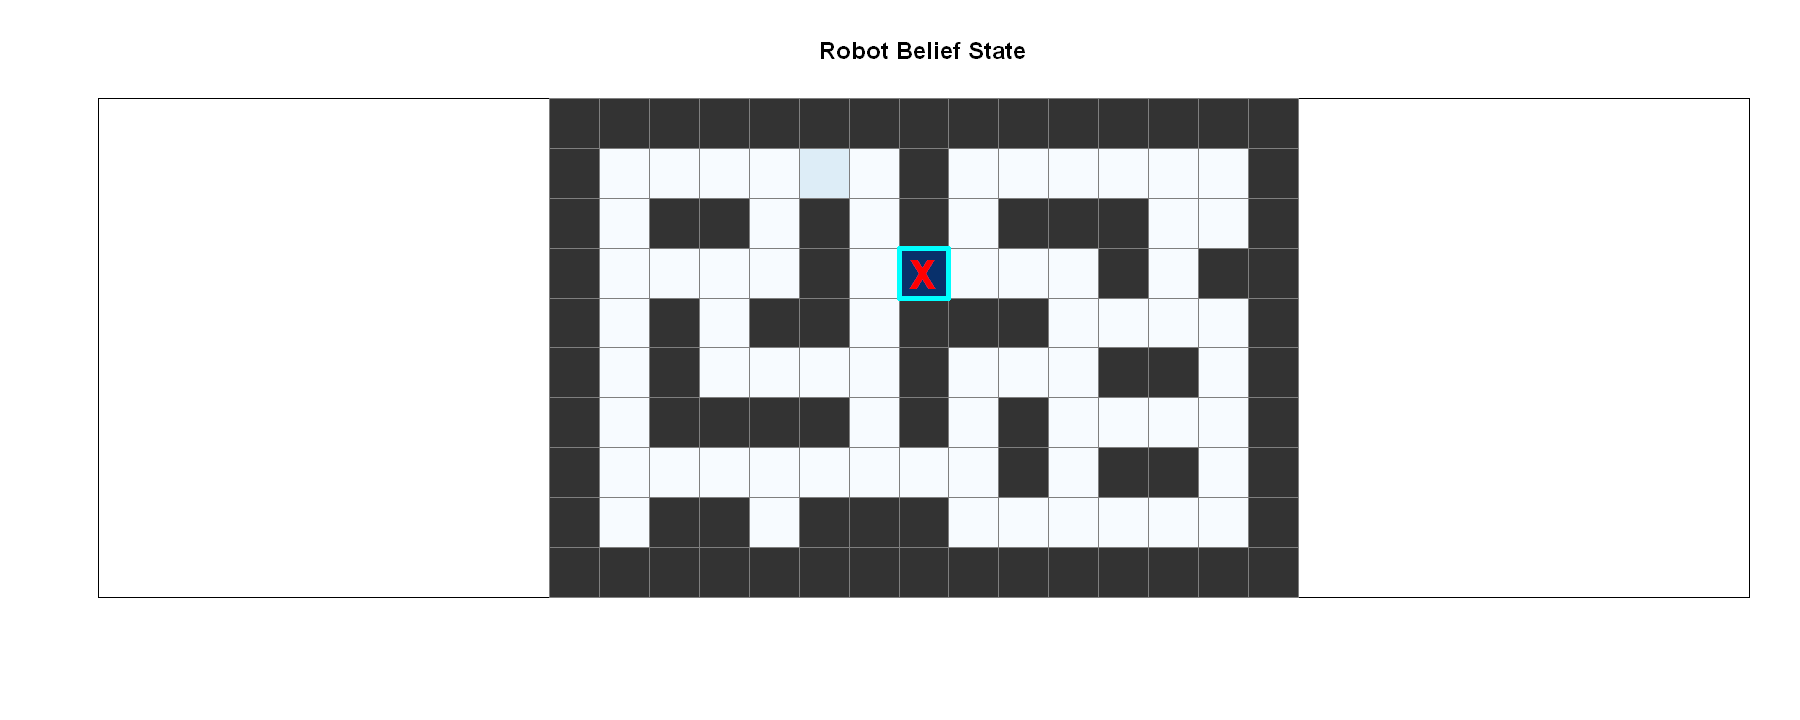

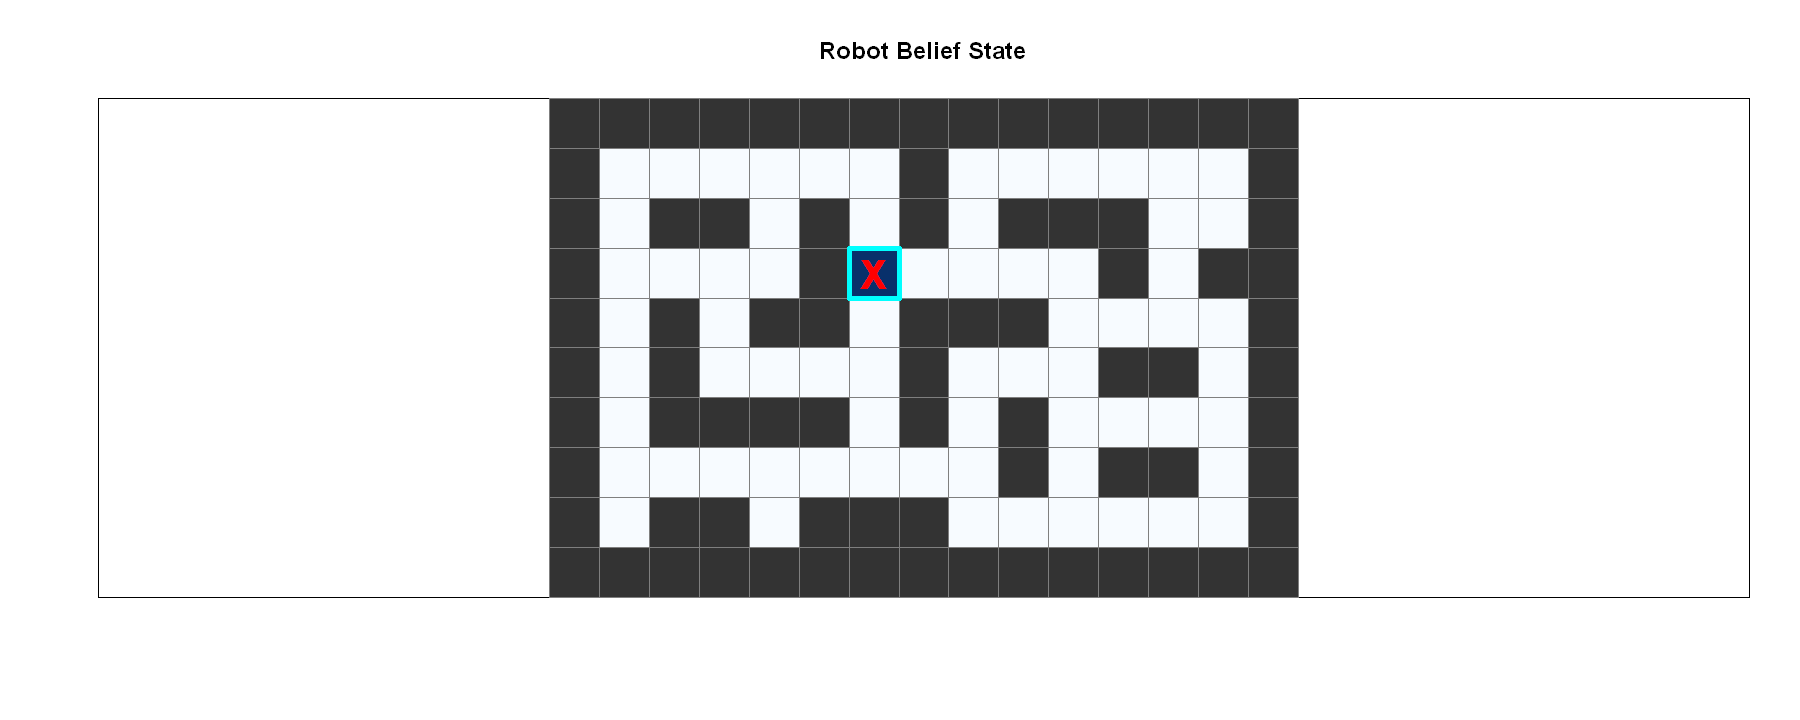

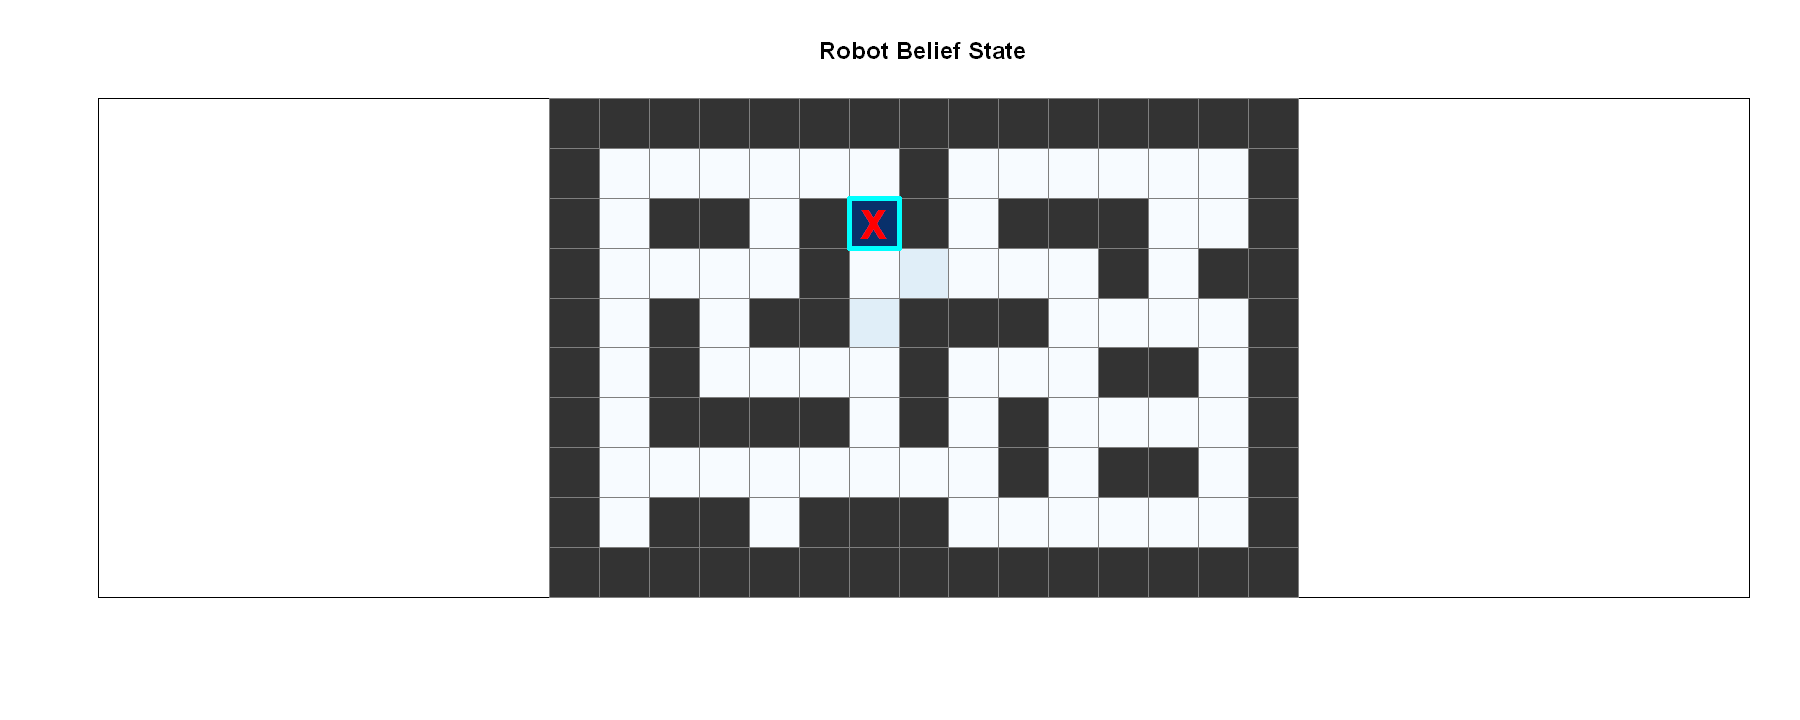

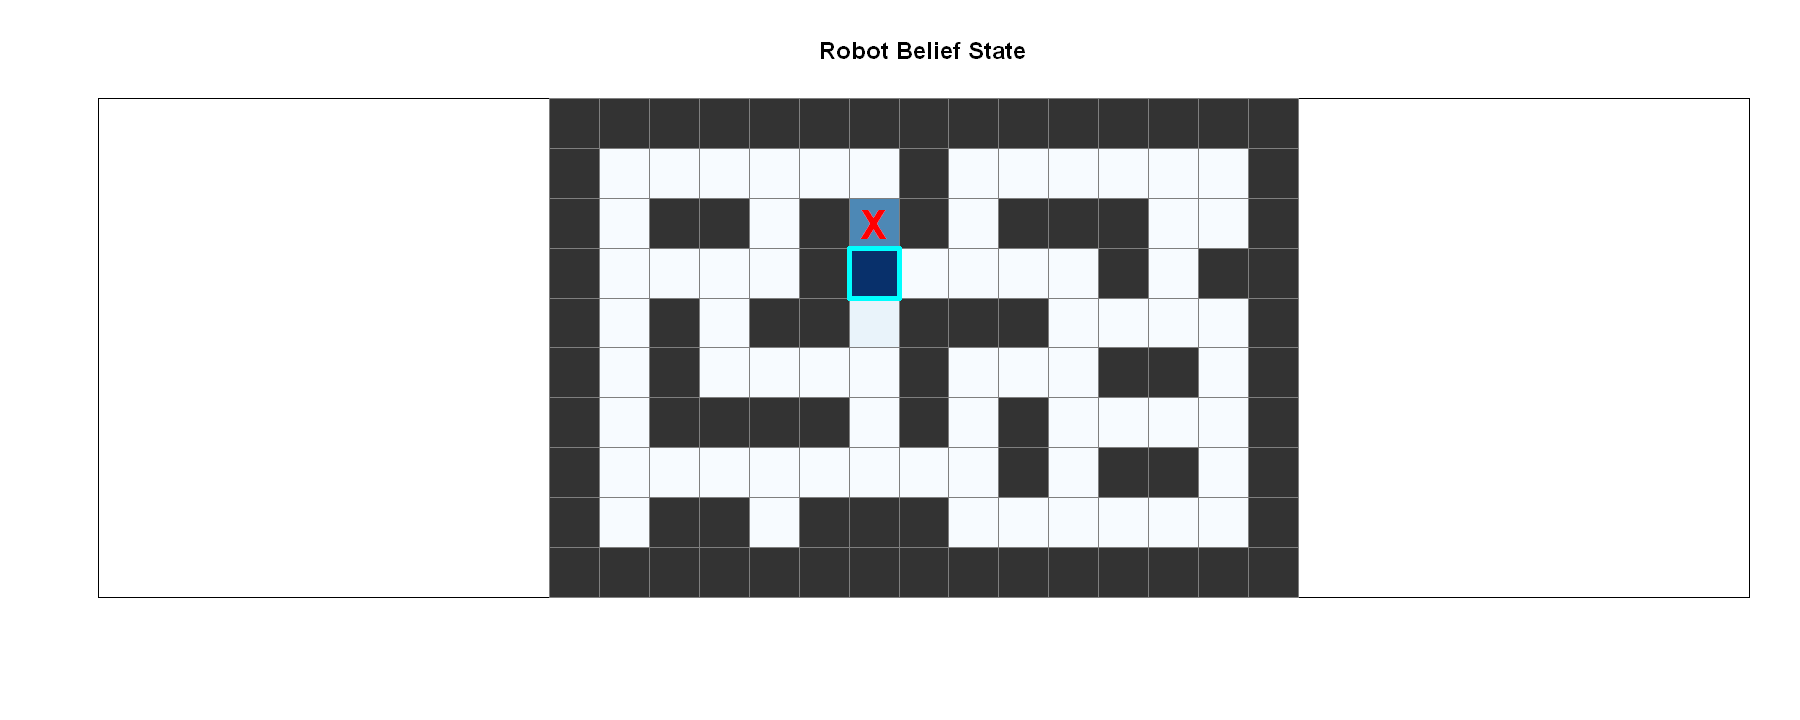

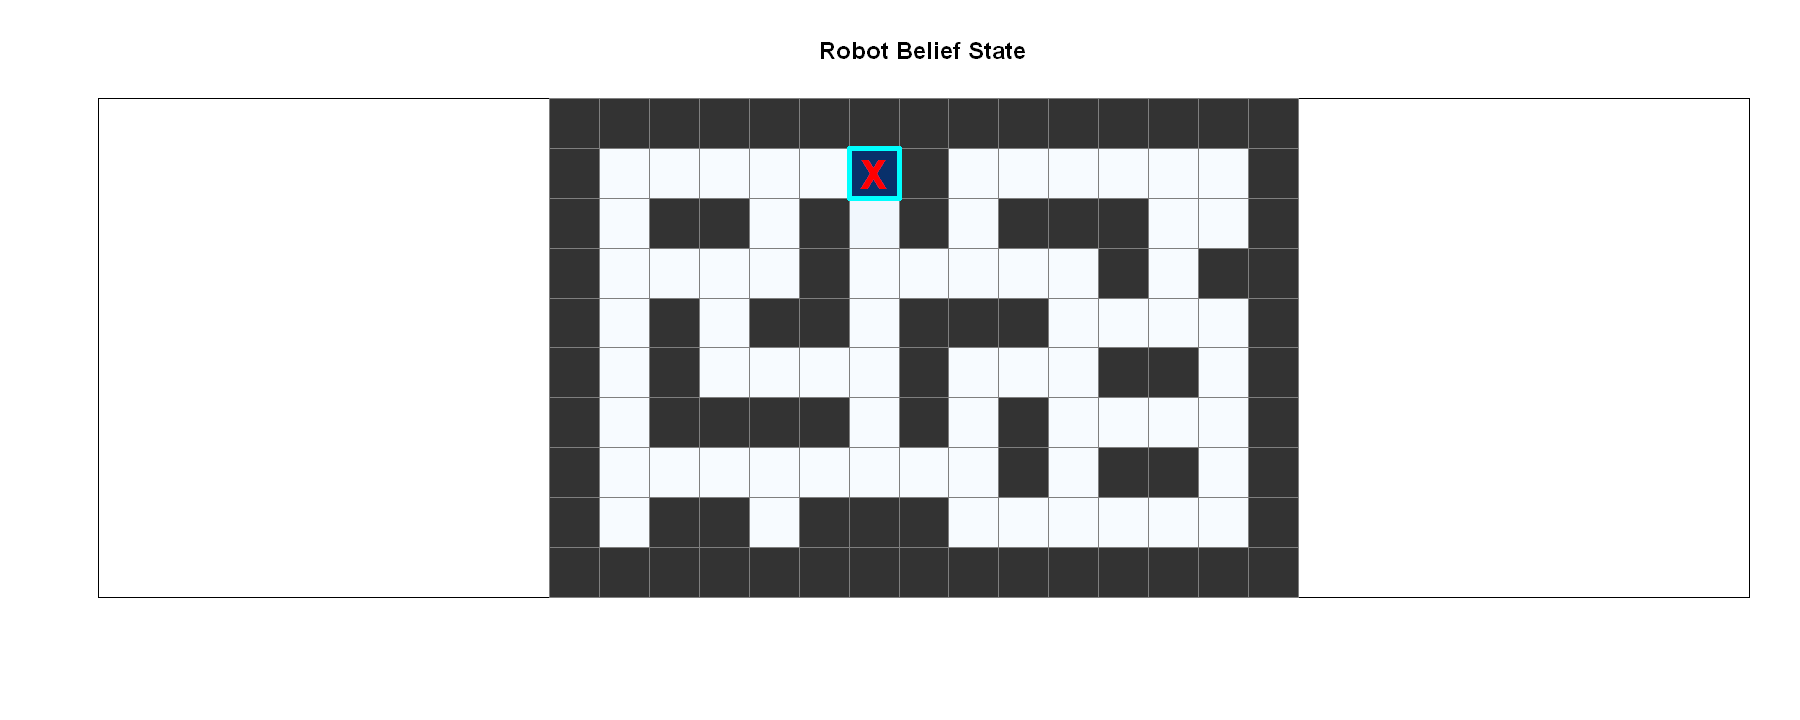

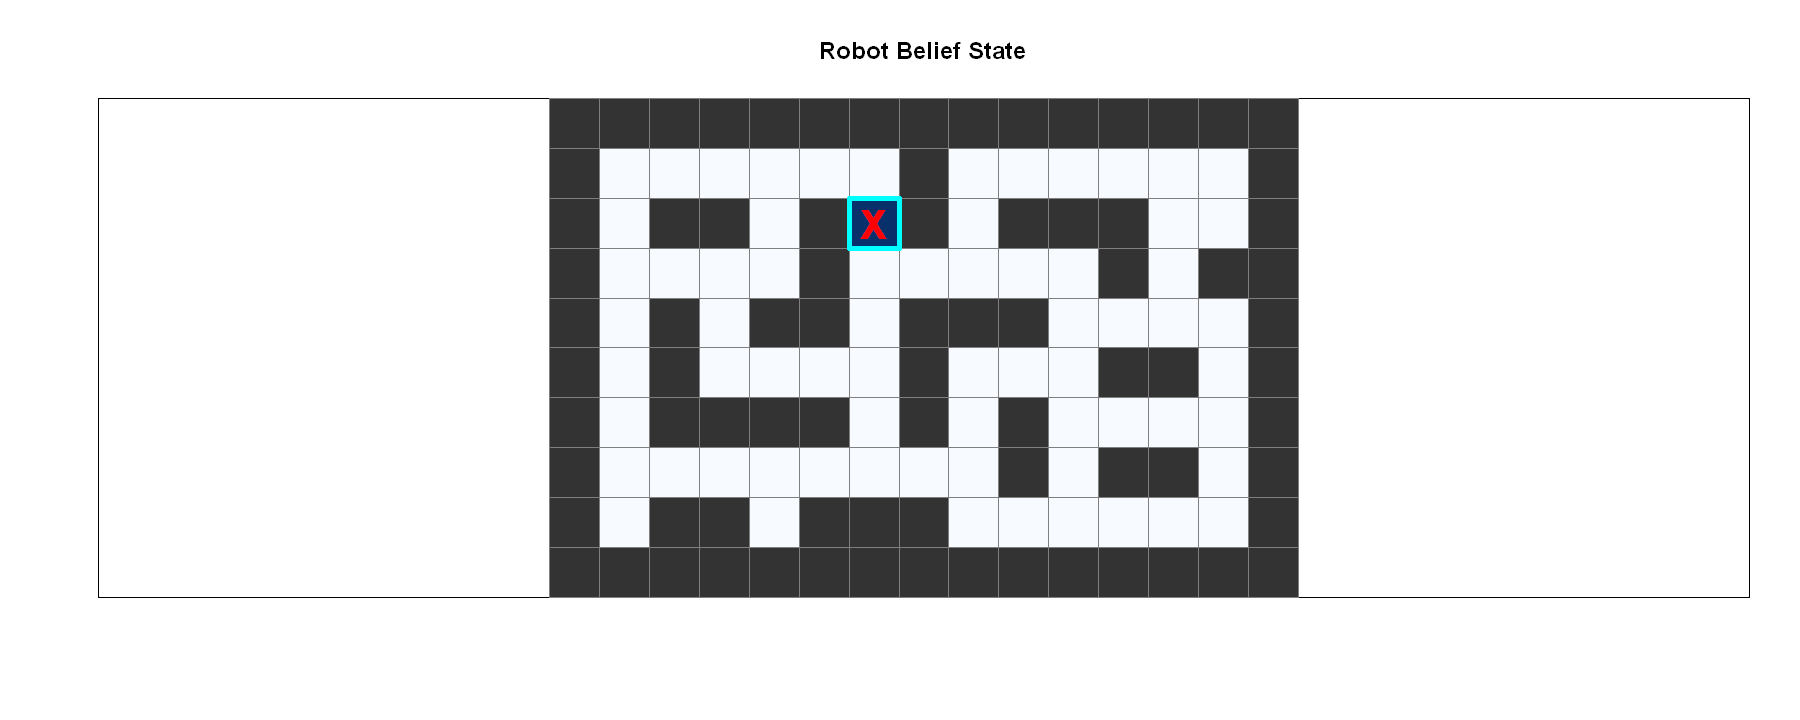

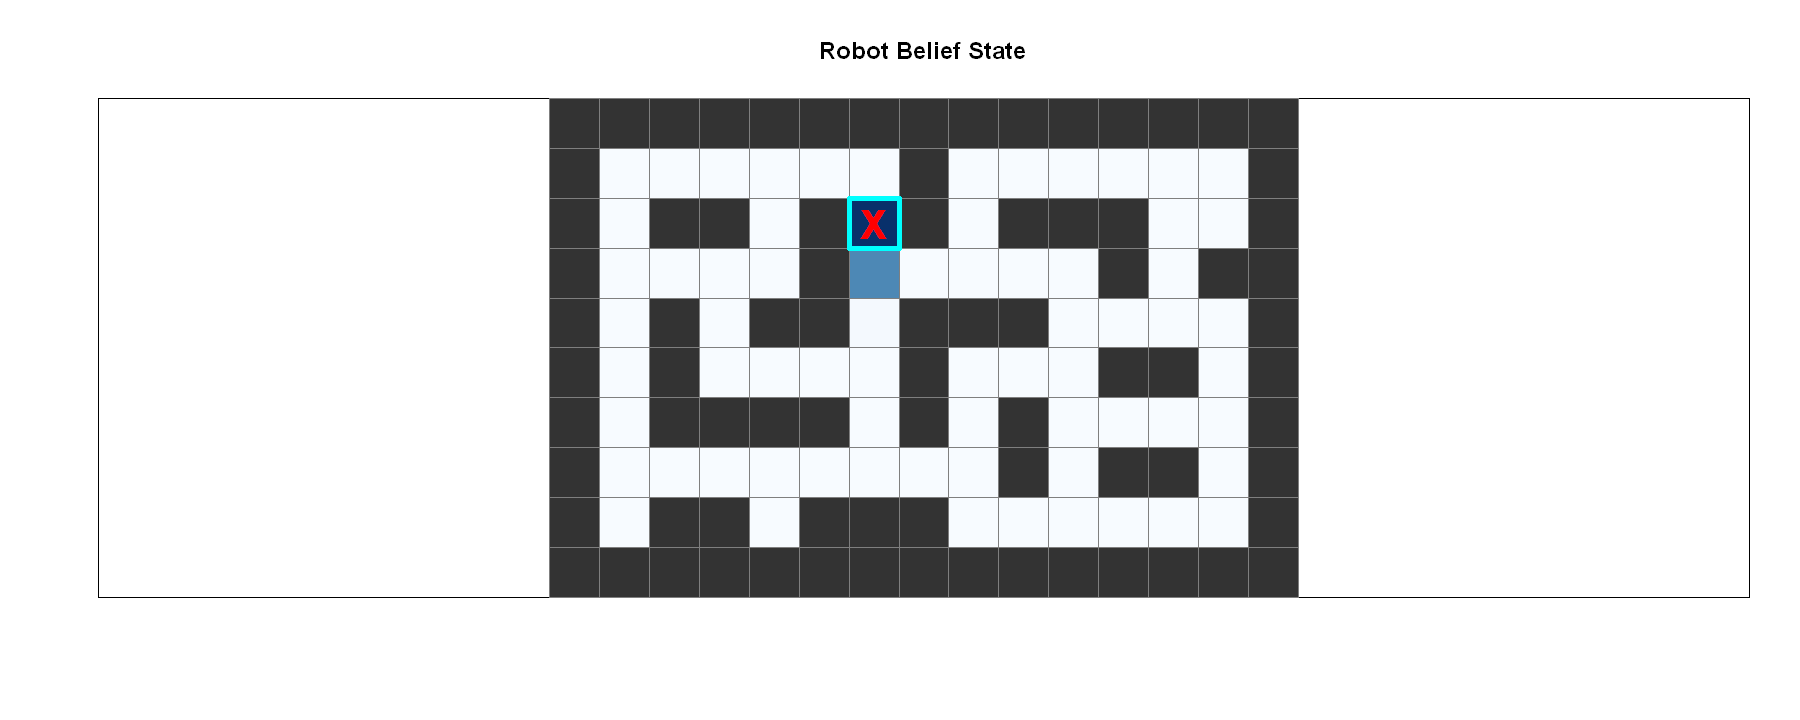

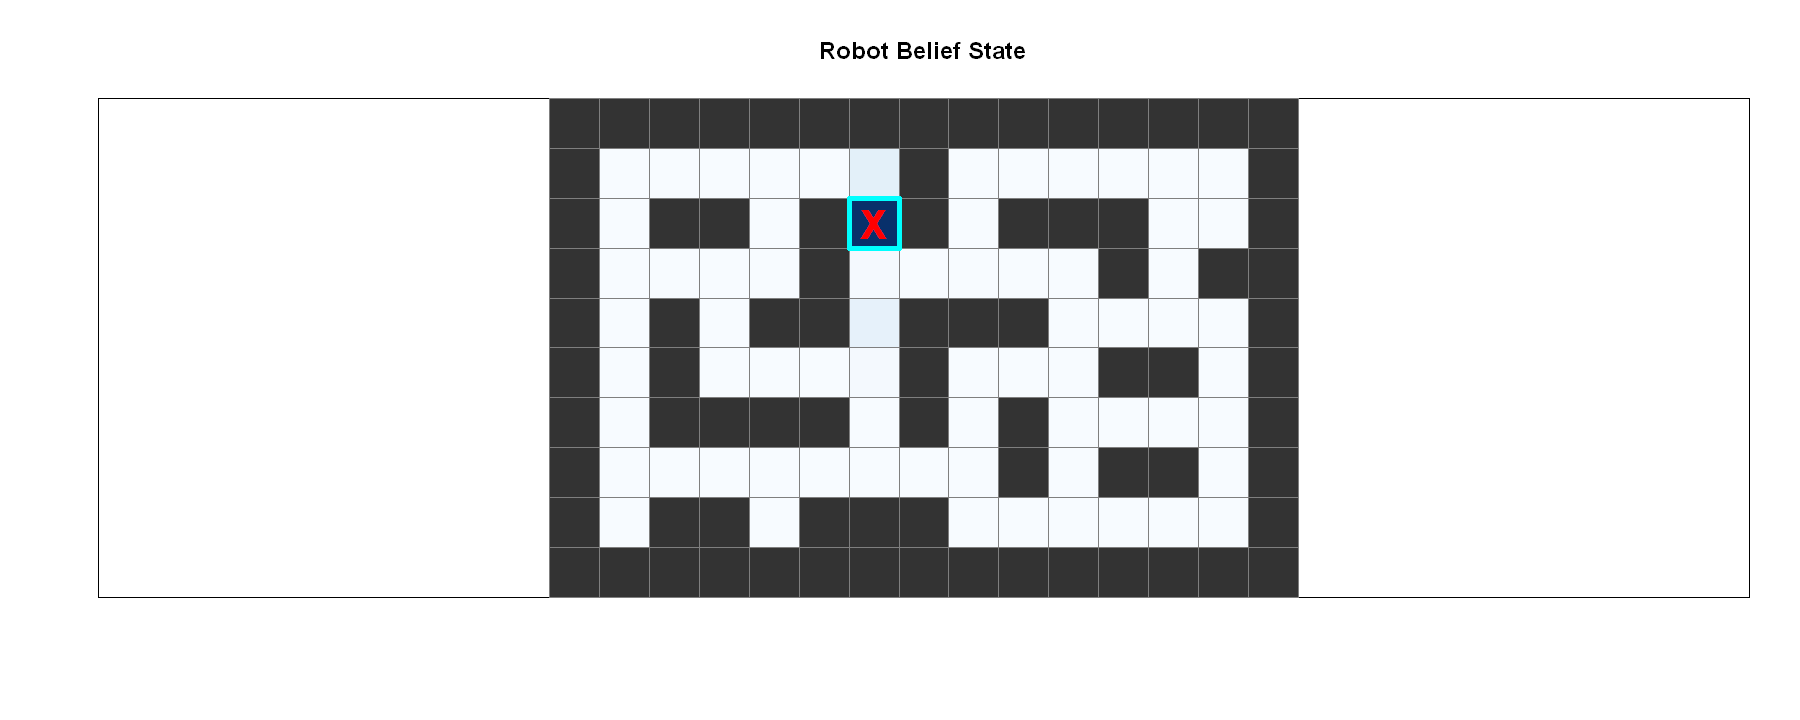

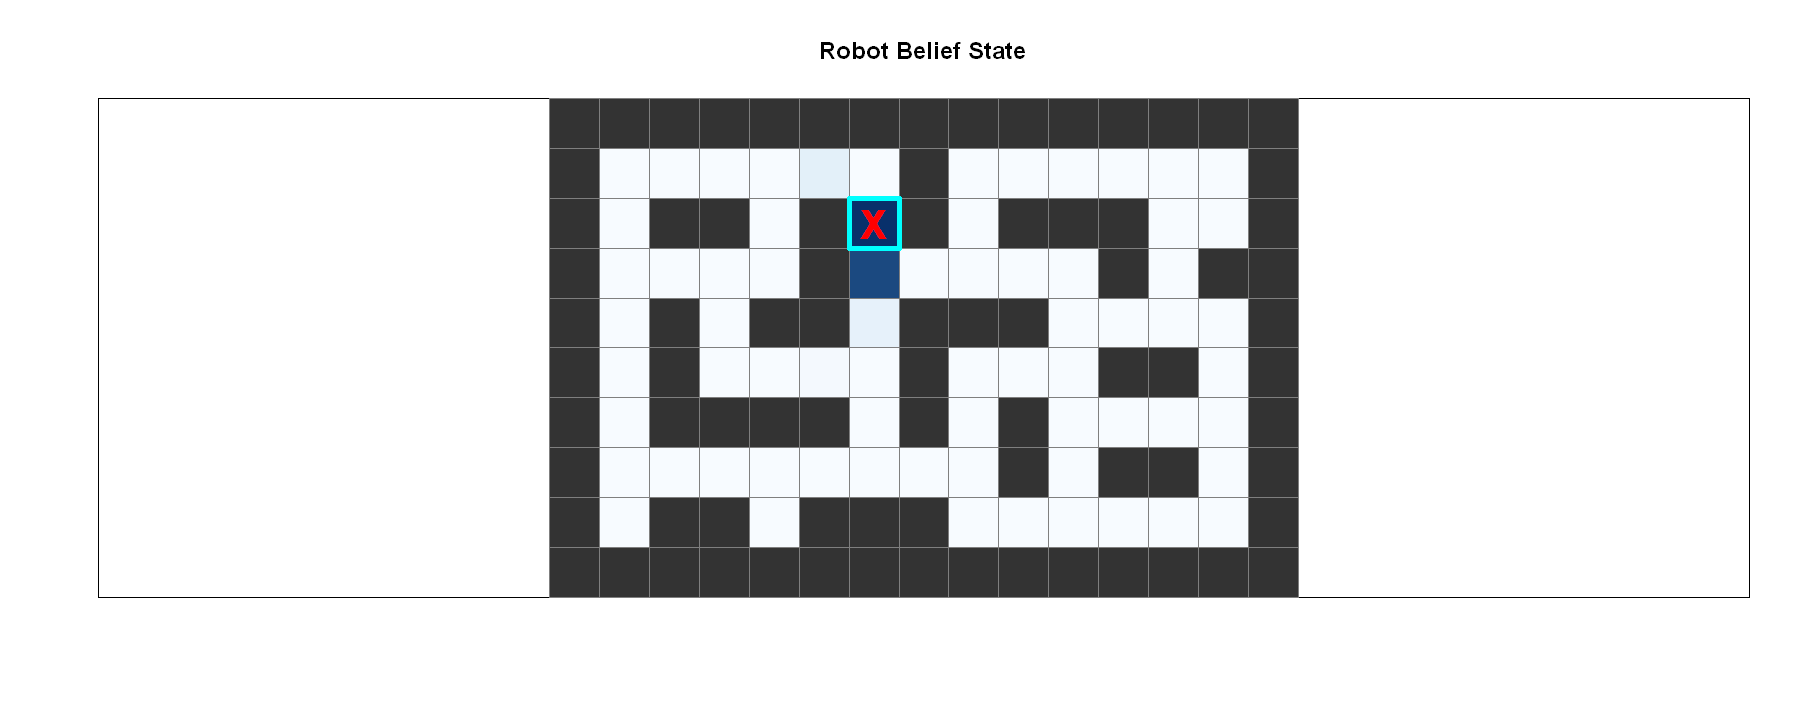

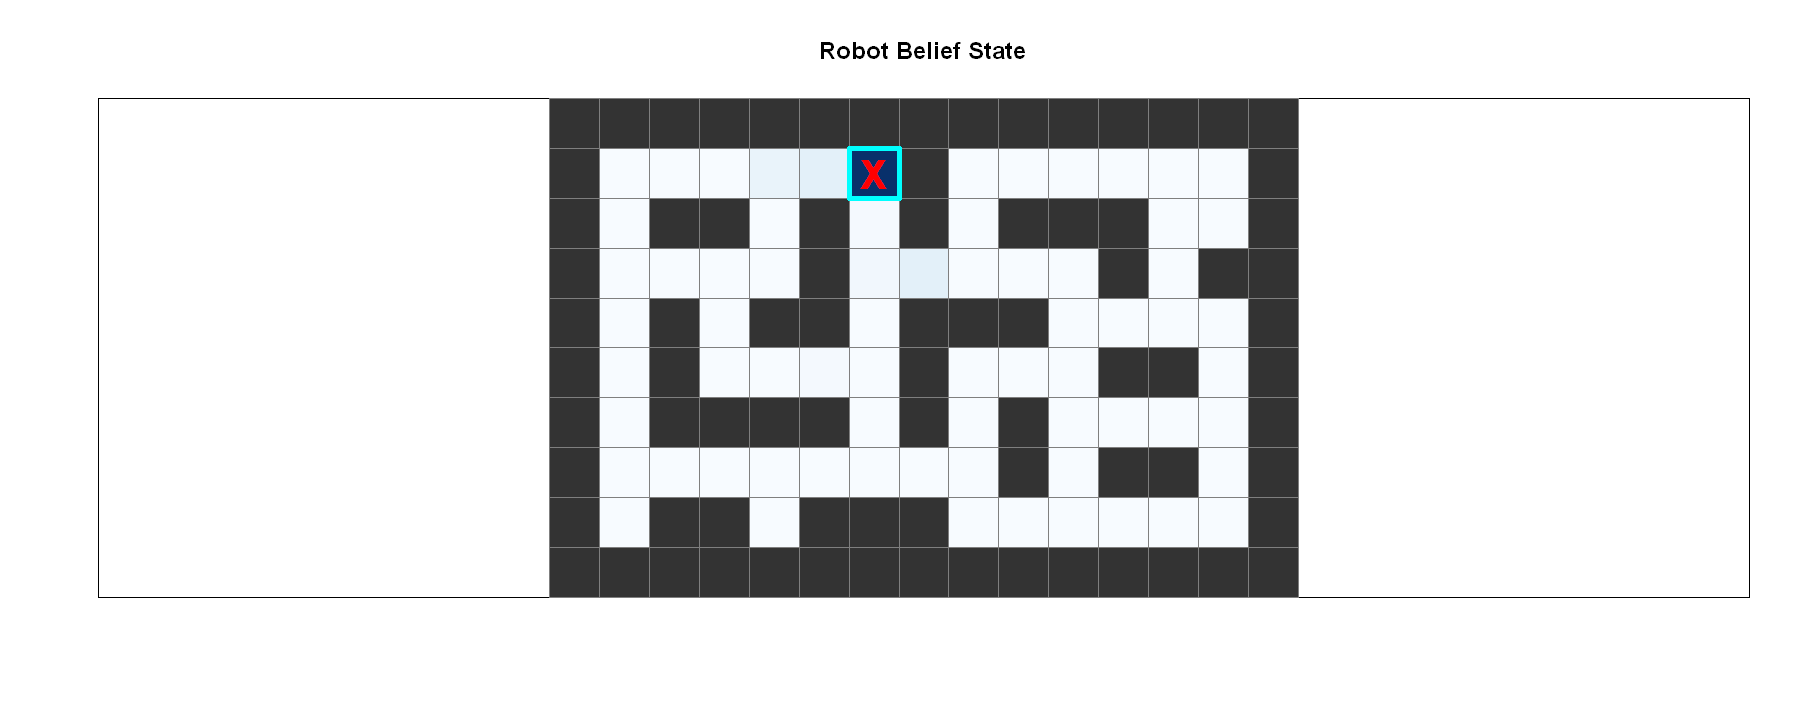

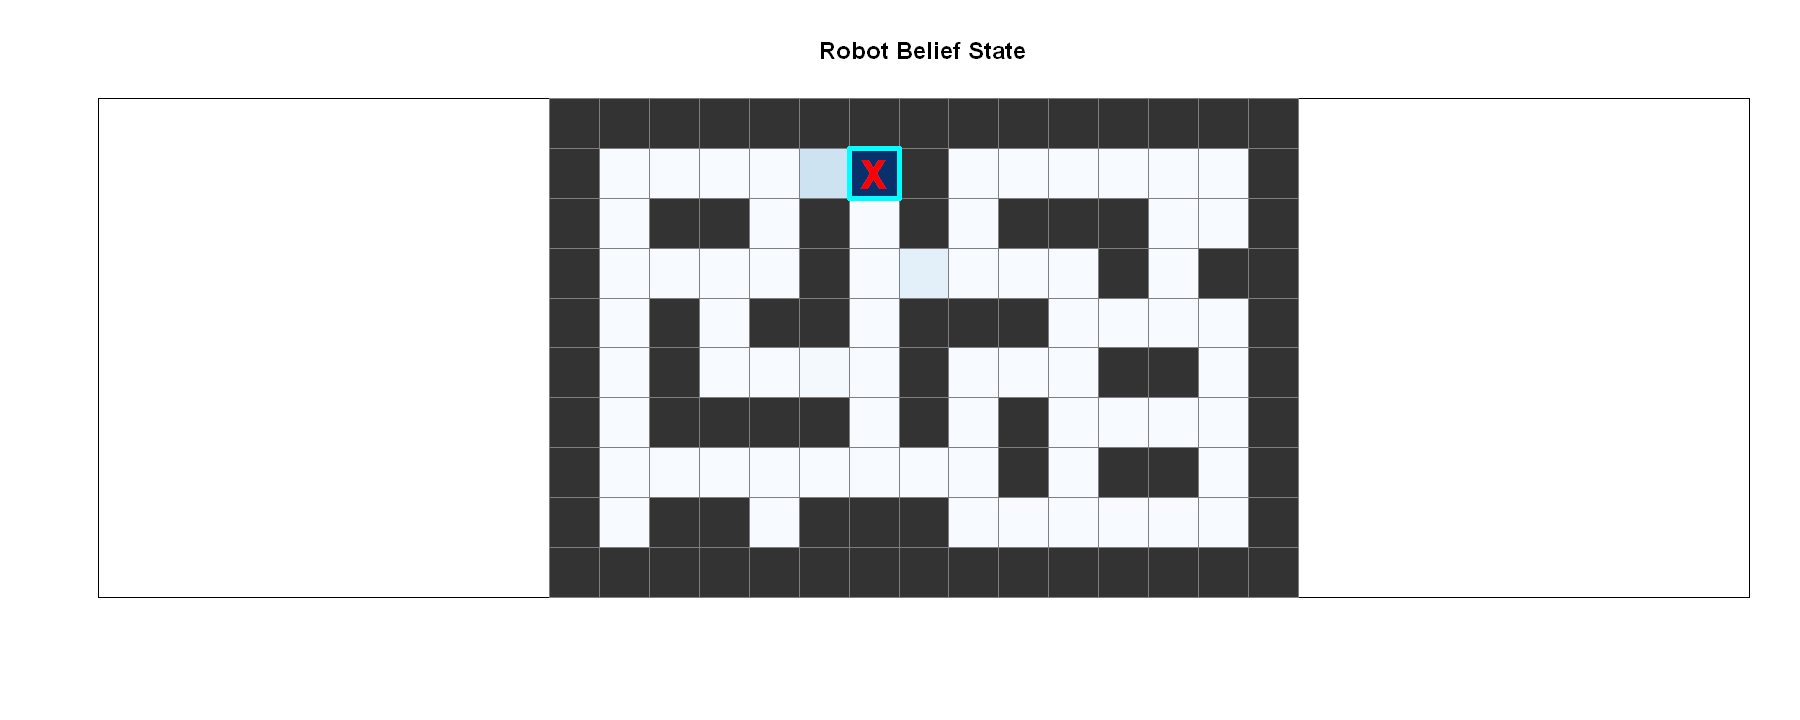

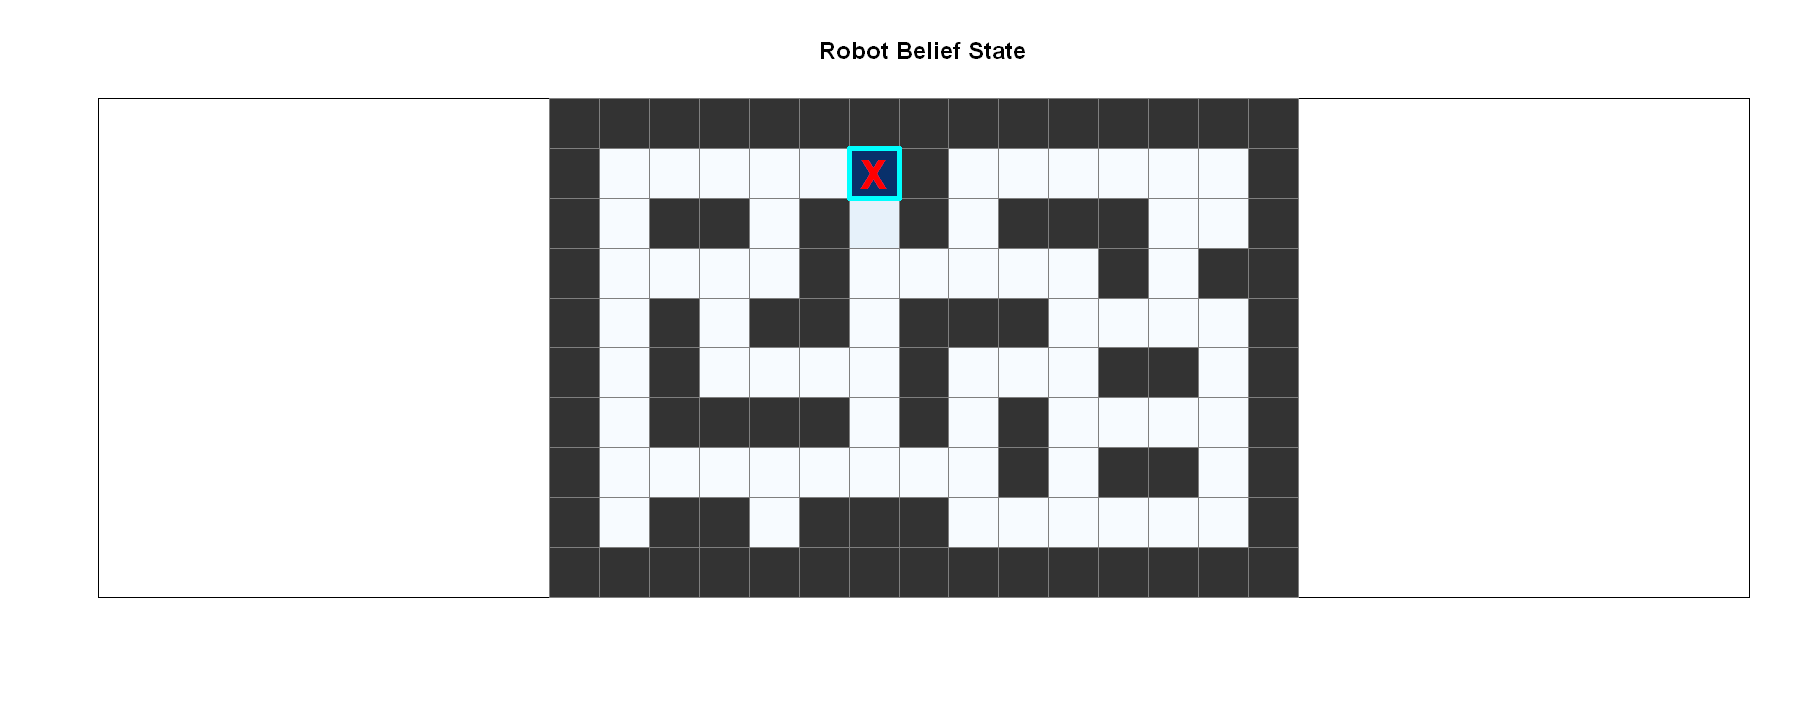

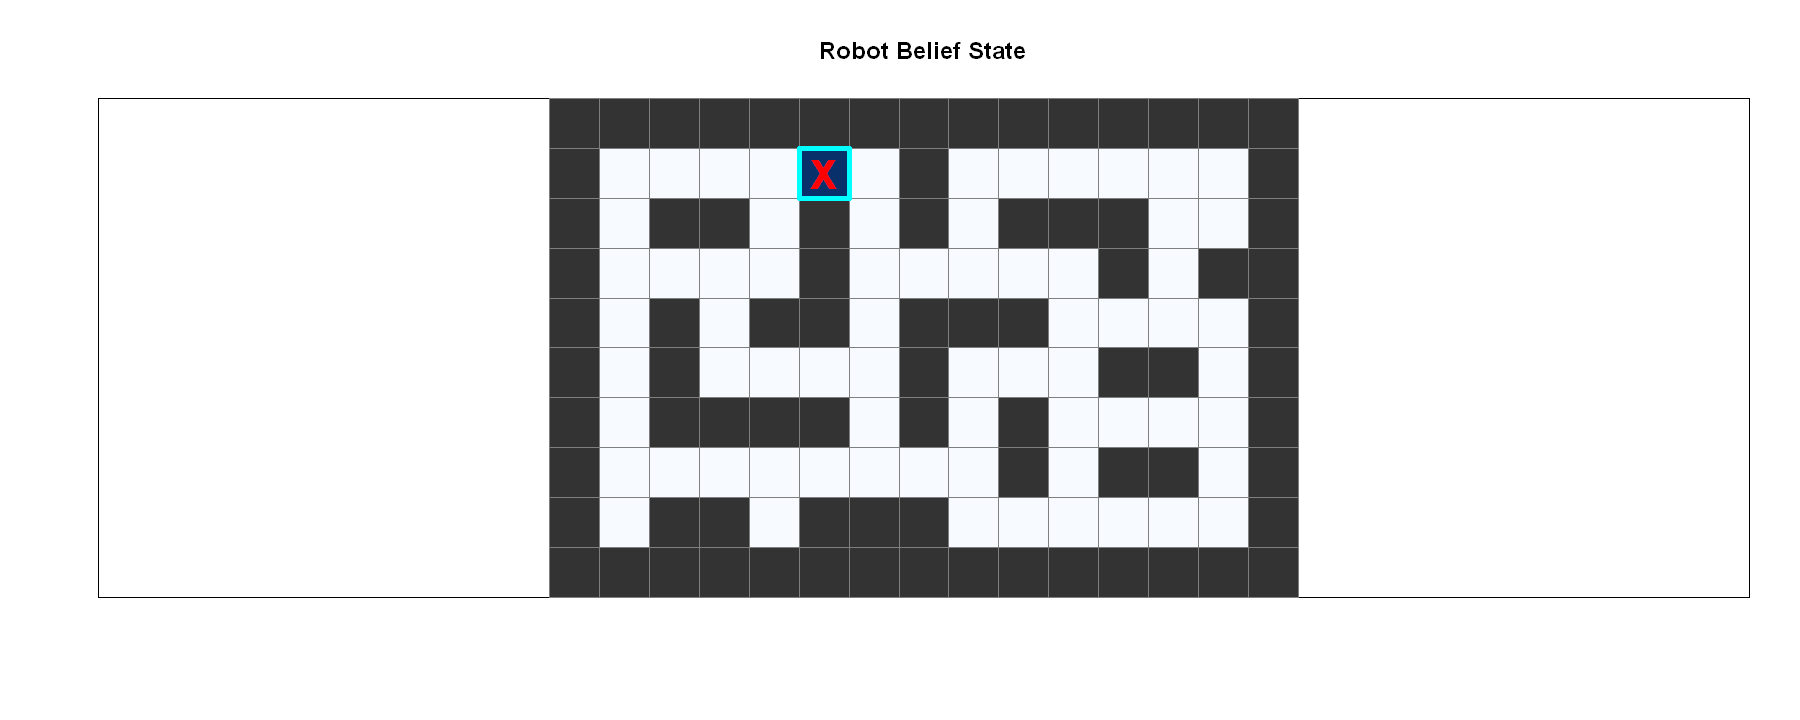

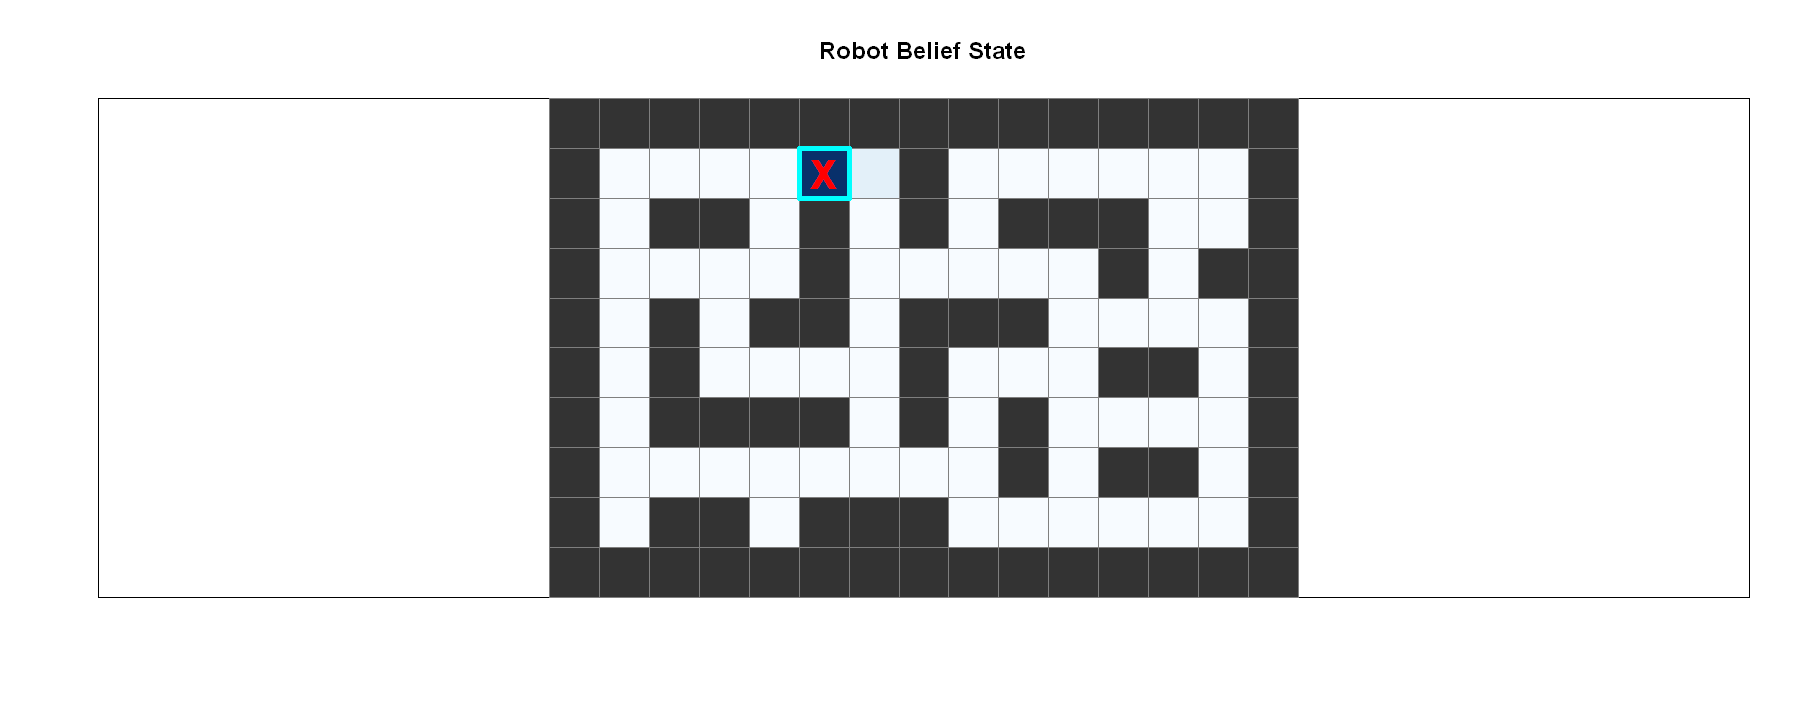

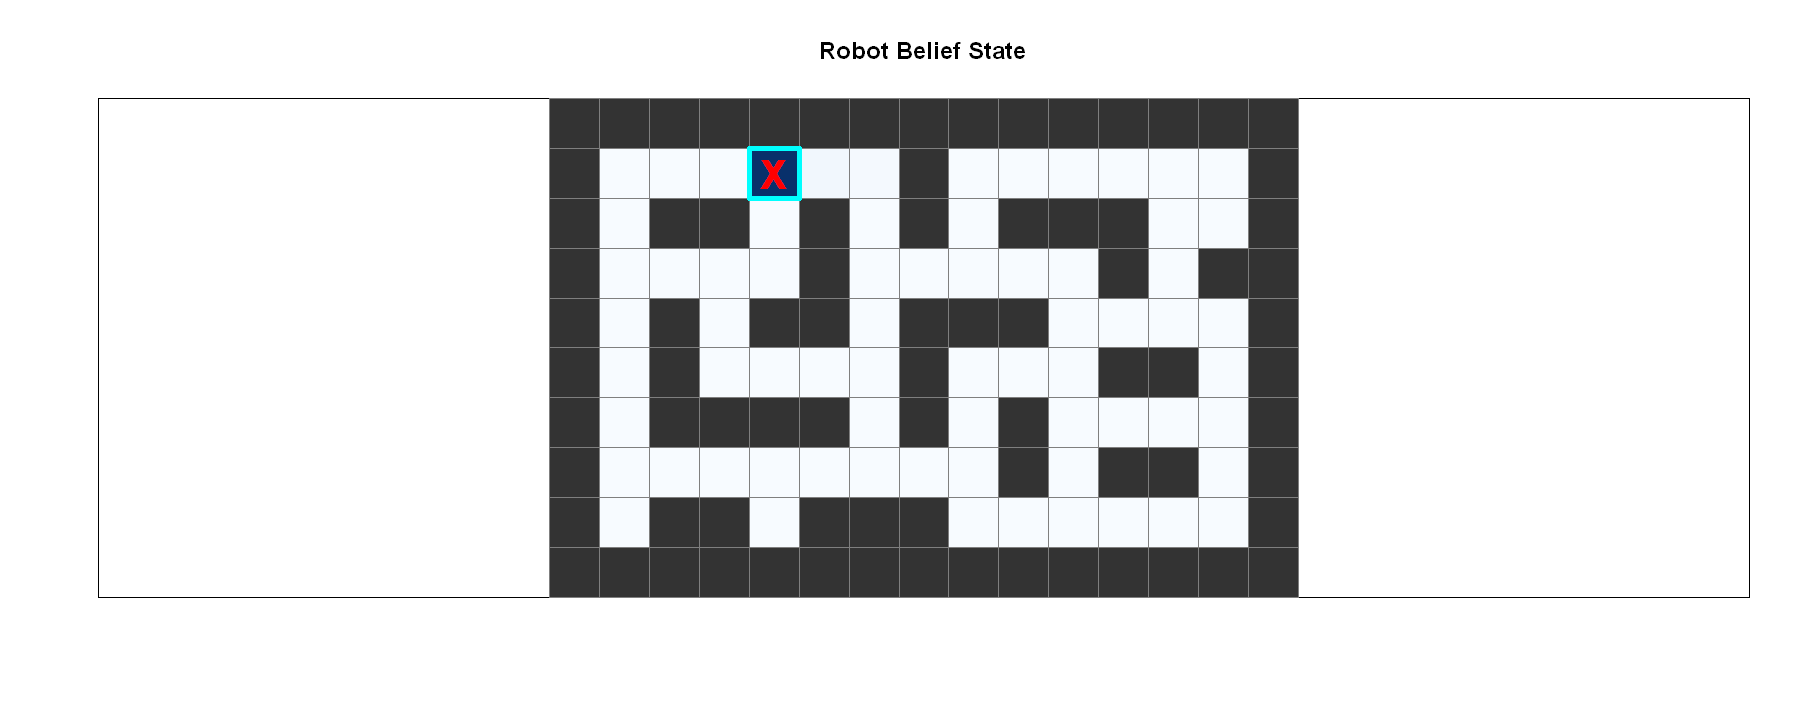

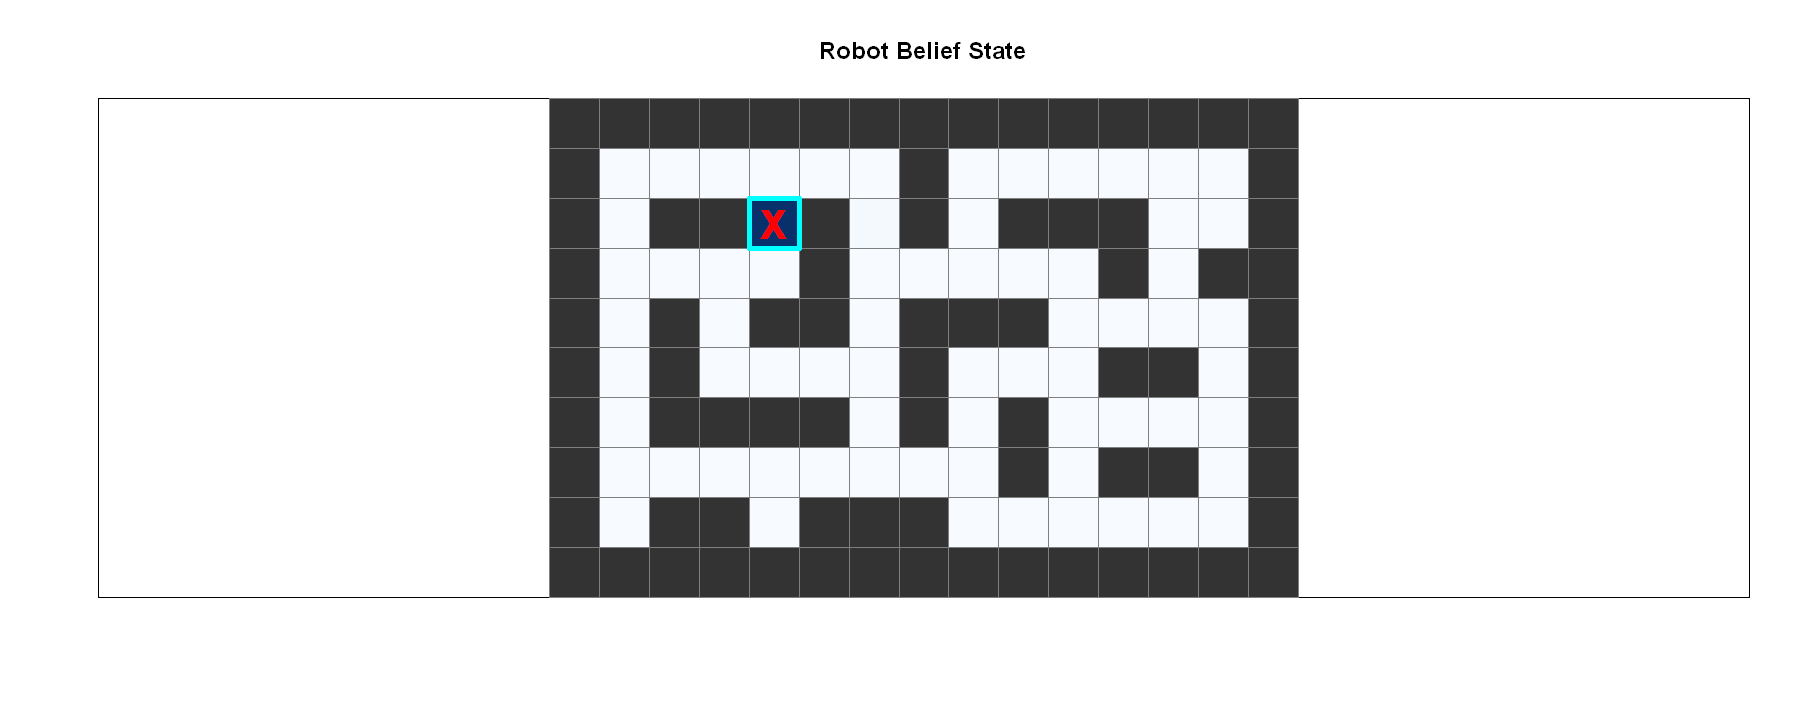

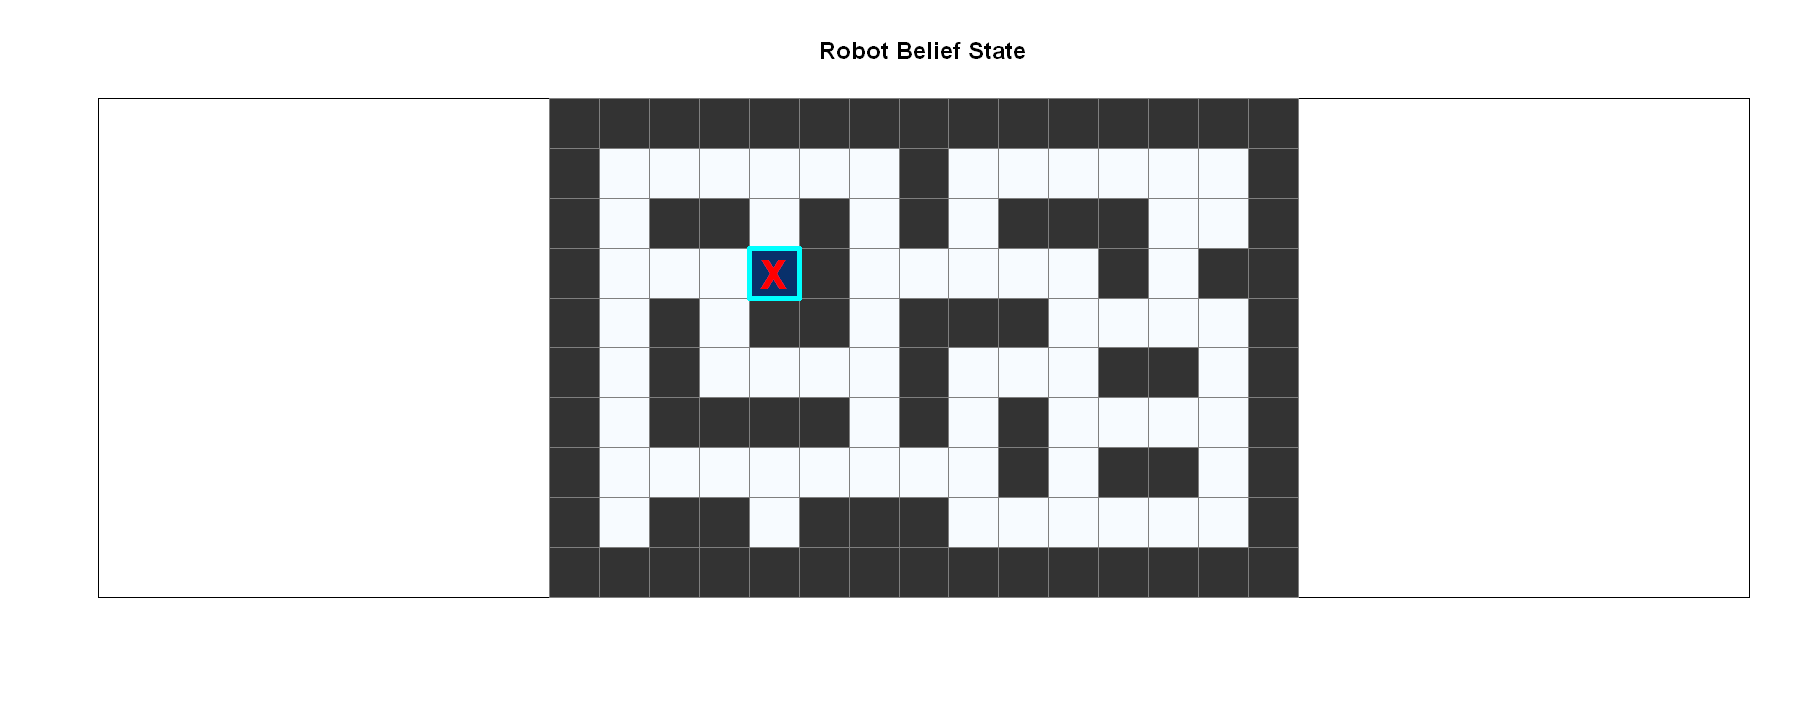

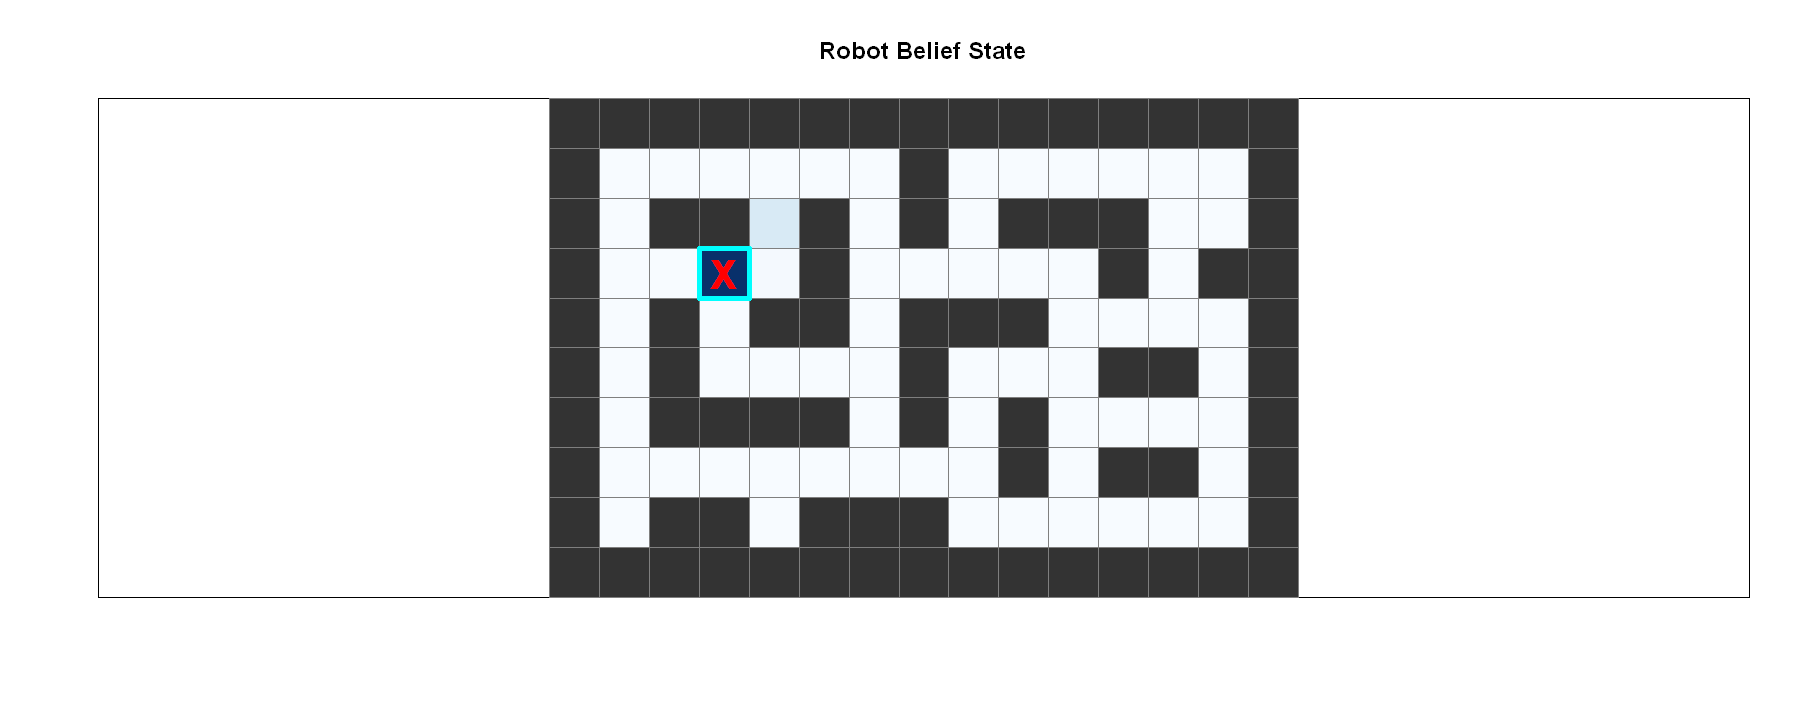

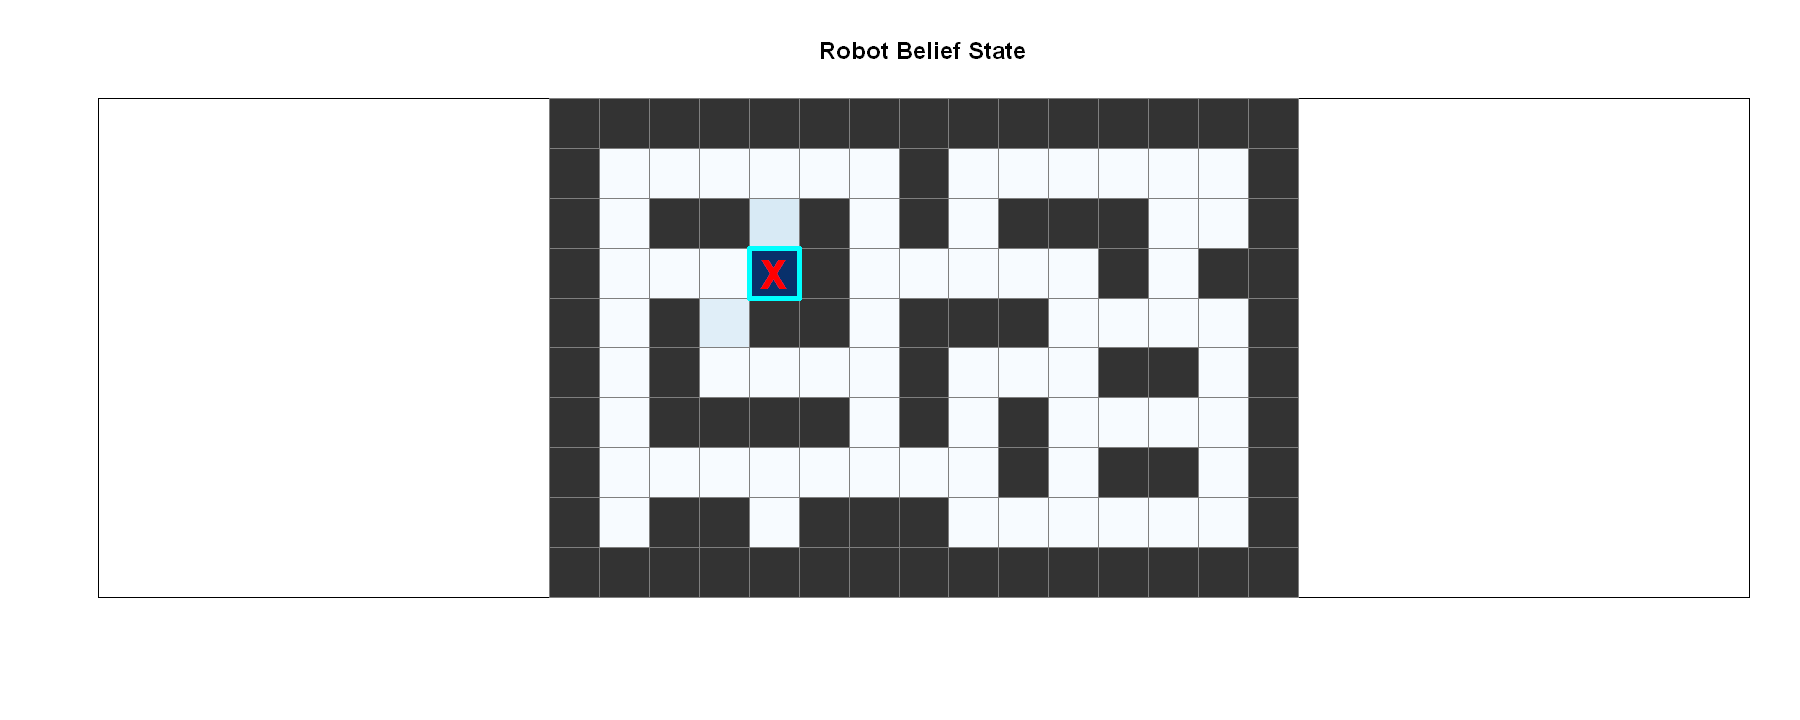

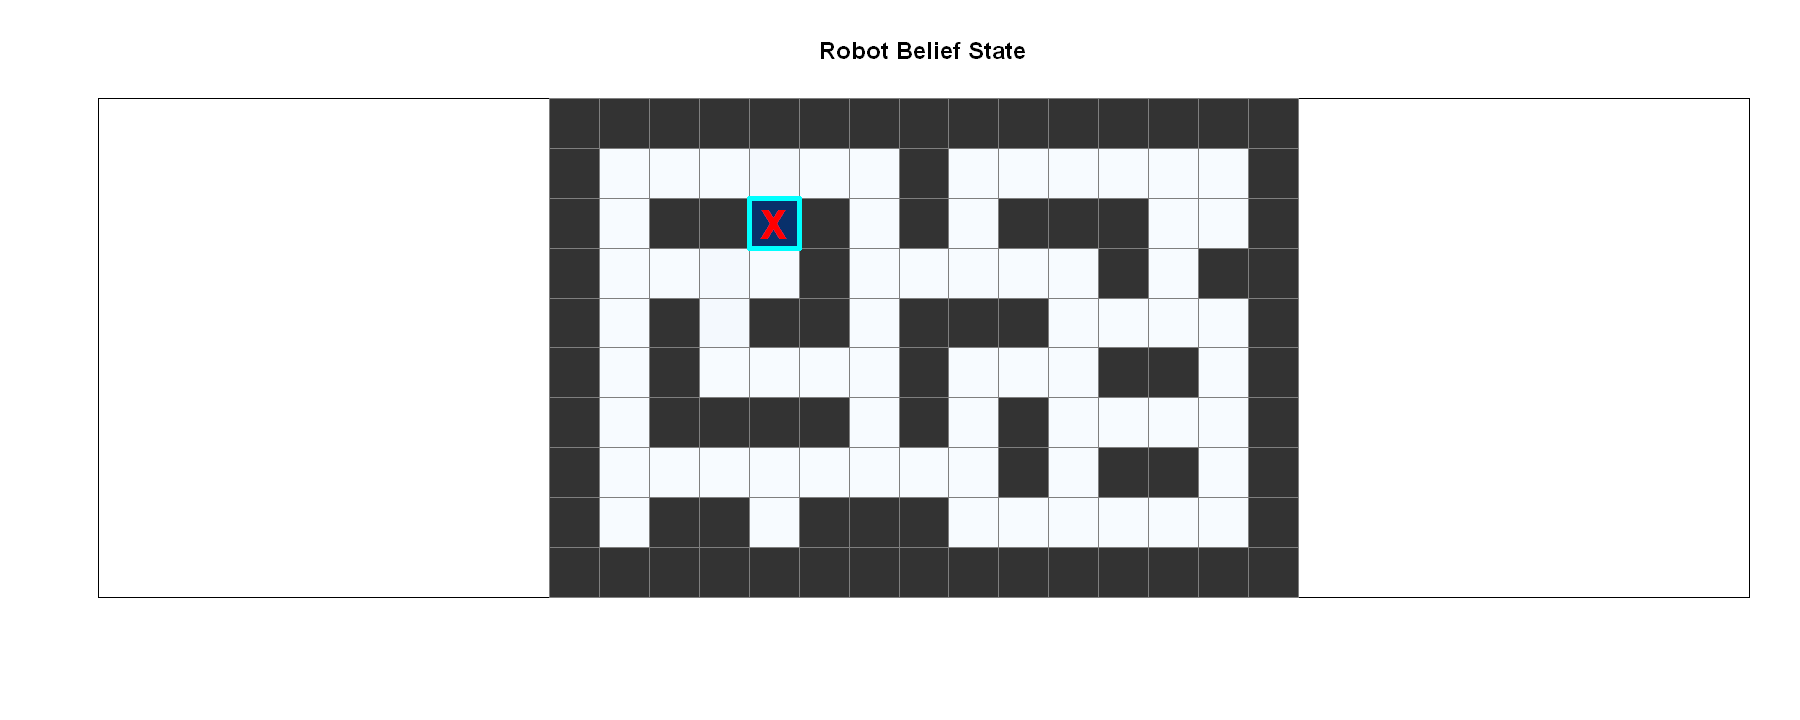

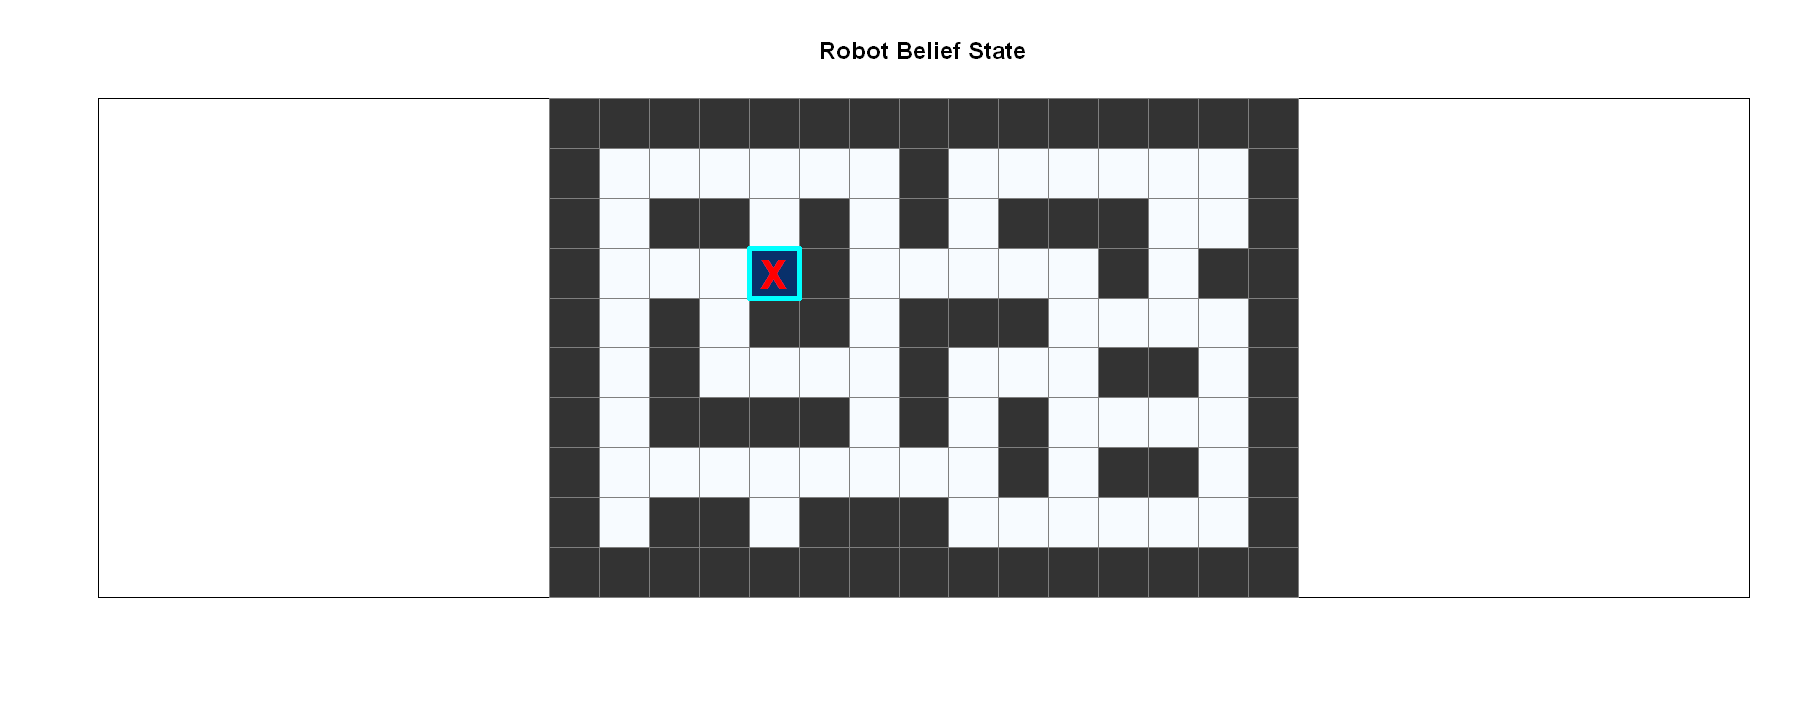

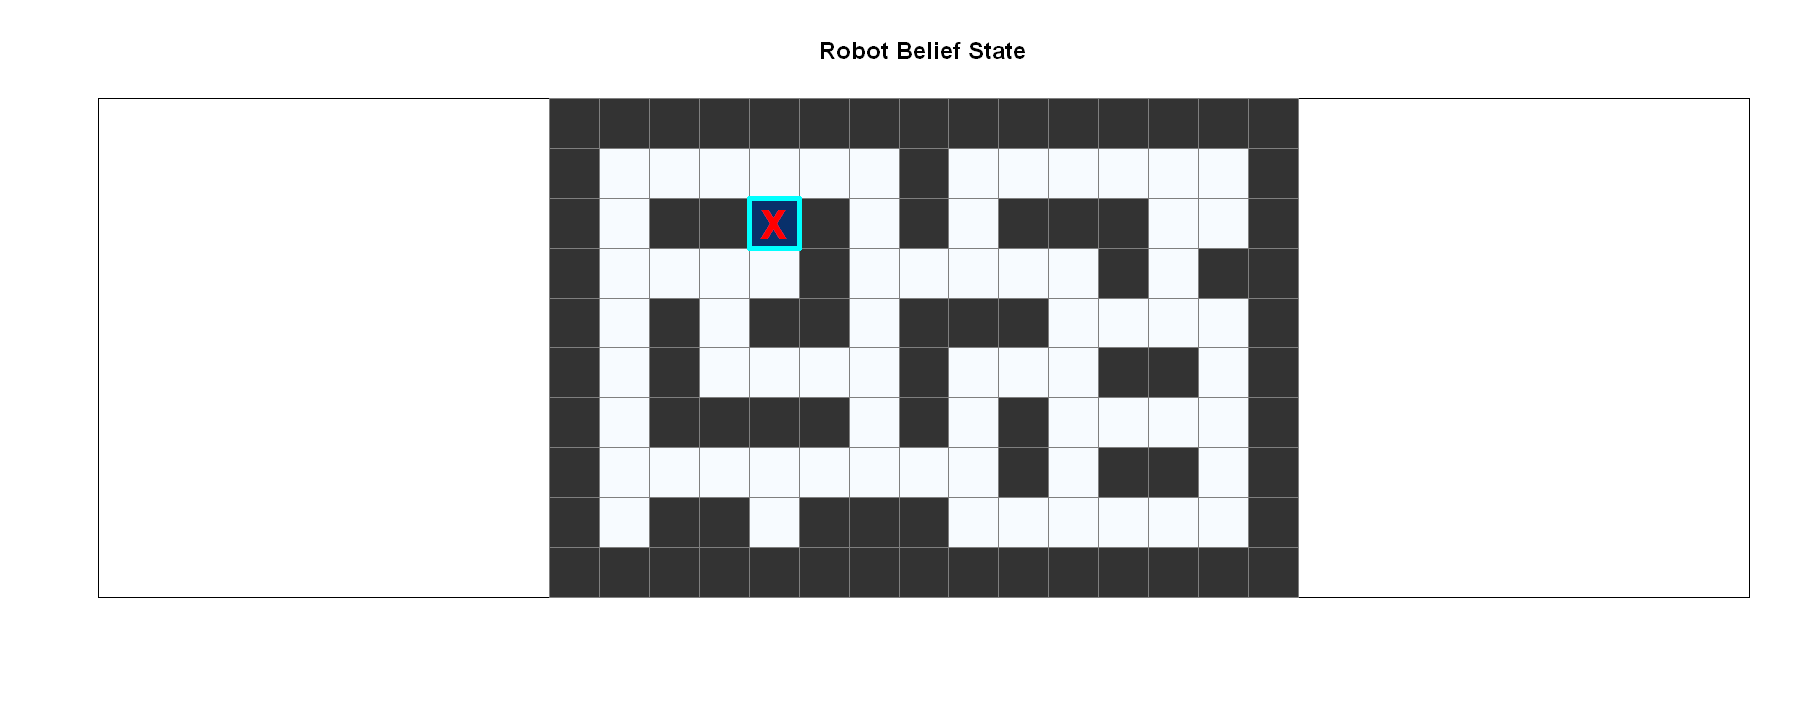

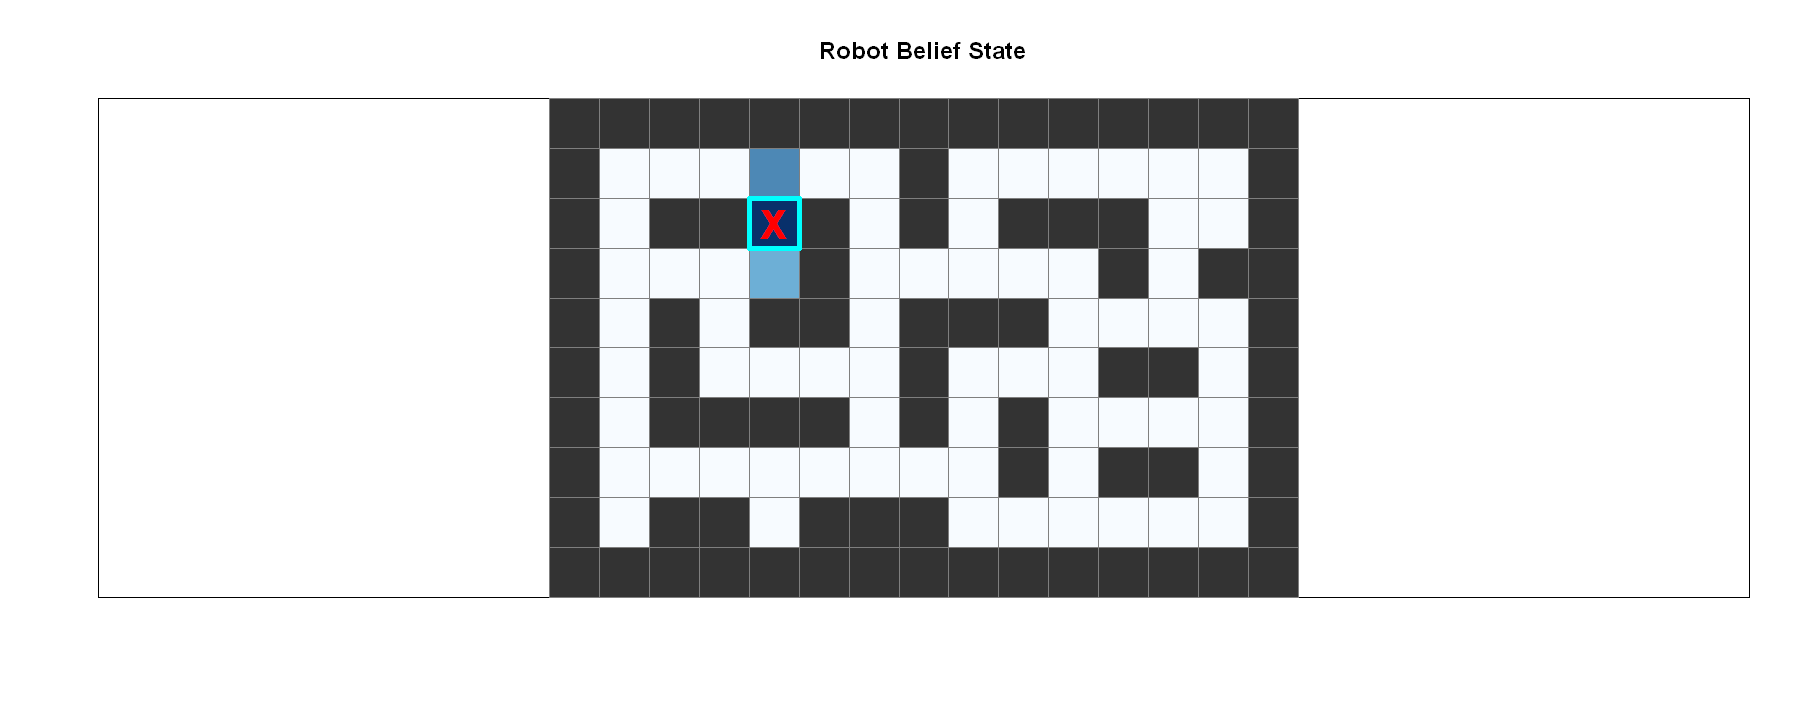

In [42]:
for(i in 1:50) {
  plot_belief_map(map, beliefs[[i]], real_pos[[i]])
}

### 8. **TO-DO:** Evaluate the results 📈 (10 points🎯)
Pass the output of your model to the following functions. Function `plot_belief_maxima` plots our maximum likelihood belief versus state. Function `plot_belief_accuracy` prints the number of correct predictions in each group of 5 along with the overall accuracy.

In [43]:
plot_belief_maxima <- function(beliefs) {
  if (!is.list(beliefs) || !all(sapply(beliefs, is.matrix))) {
    stop("Input must be a list of matrices.")
  }

    max_values <- sapply(beliefs, max)

  df <- data.frame(
    Index = seq_along(max_values),
    MaxValue = max_values
  )

  return(
    ggplot(df, aes(x = Index, y = MaxValue)) +
    geom_line(color = "blue", linewidth = 1) +
    geom_point(color = "red", size = 3) +
    labs(
      title = "Maximum Value of Each Belief Matrix",
      x = "Matrix Index",
      y = "Maximum Value"
    ) +
    theme_minimal()
  )
}


In [44]:
plot_belief_accuracy <- function(beliefs, real_pos) {
  if (length(beliefs) != length(real_pos)) {
    stop("beliefs and real_pos must have the same length.")
  }

  predicted_pos <- lapply(beliefs, function(b) {
    idx <- which(b == max(b), arr.ind = TRUE)
    return(idx[1, ])
  })

  correct <- mapply(function(p, r) all(p == r), predicted_pos, real_pos)

  n <- length(correct)
  group_indices <- ceiling(seq_len(n) / 5)
  correct_counts <- tapply(correct, group_indices, sum)

  df <- data.frame(
    Group = factor(seq_along(correct_counts)),
    Correct = as.numeric(correct_counts)
  )

  overall_acc <- mean(correct)
  cat(sprintf("Overall accuracy: %.2f%%\n", 100 * overall_acc))

  return(
    ggplot(df, aes(x = Group, y = Correct)) +
    geom_col(fill = "steelblue") +
    labs(
      title = "Correct Predictions per 5 Belief Blocks",
      x = "Group of 5 Beliefs",
      y = "Number of Correct Predictions"
    ) +
    theme_minimal()
  )

}



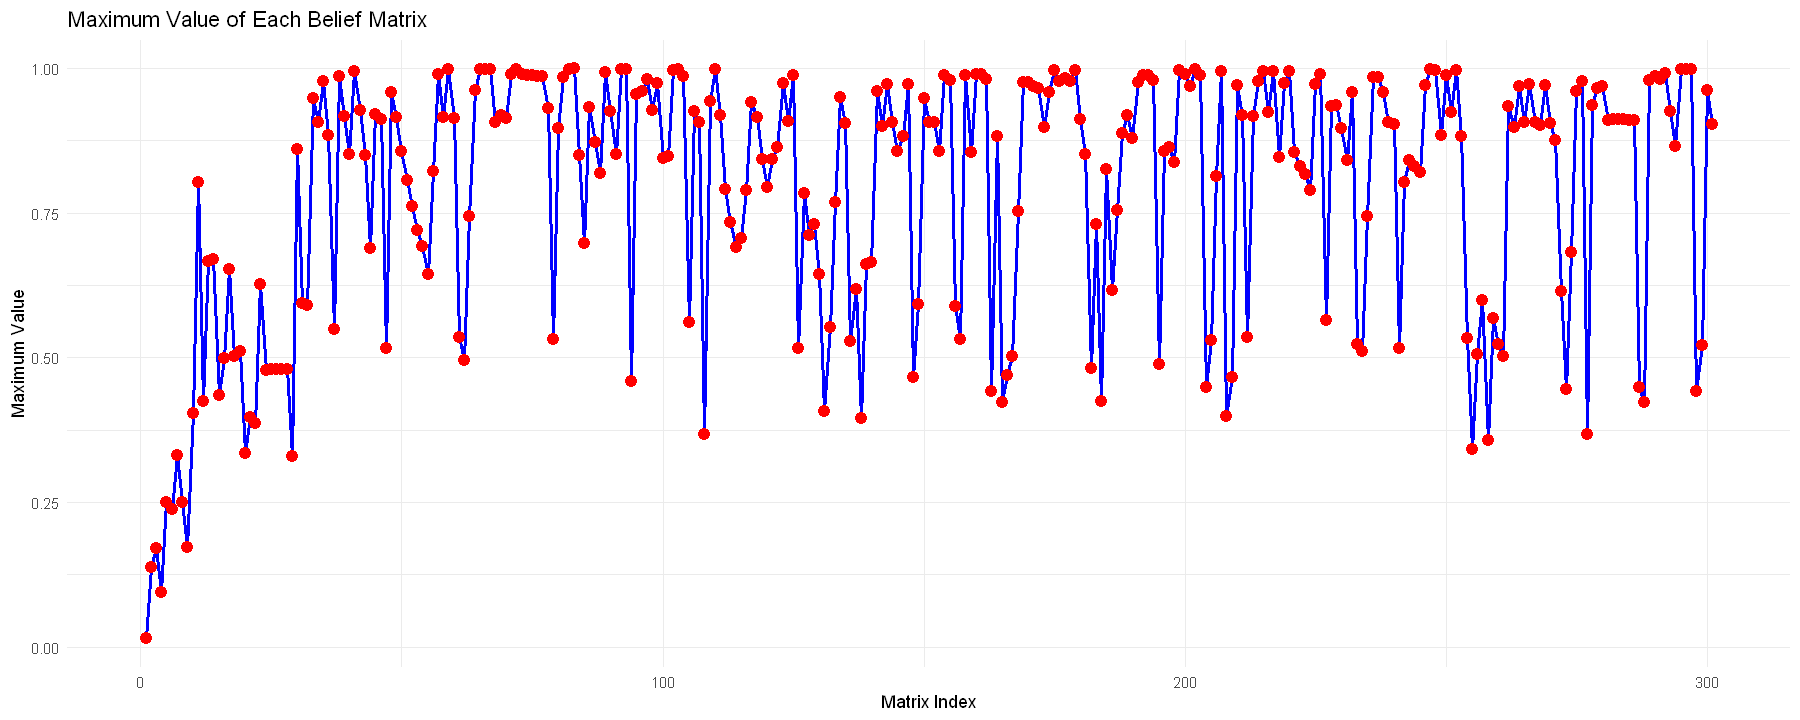

In [58]:
plot_belief_maxima(beliefs)

Overall accuracy: 81.40%


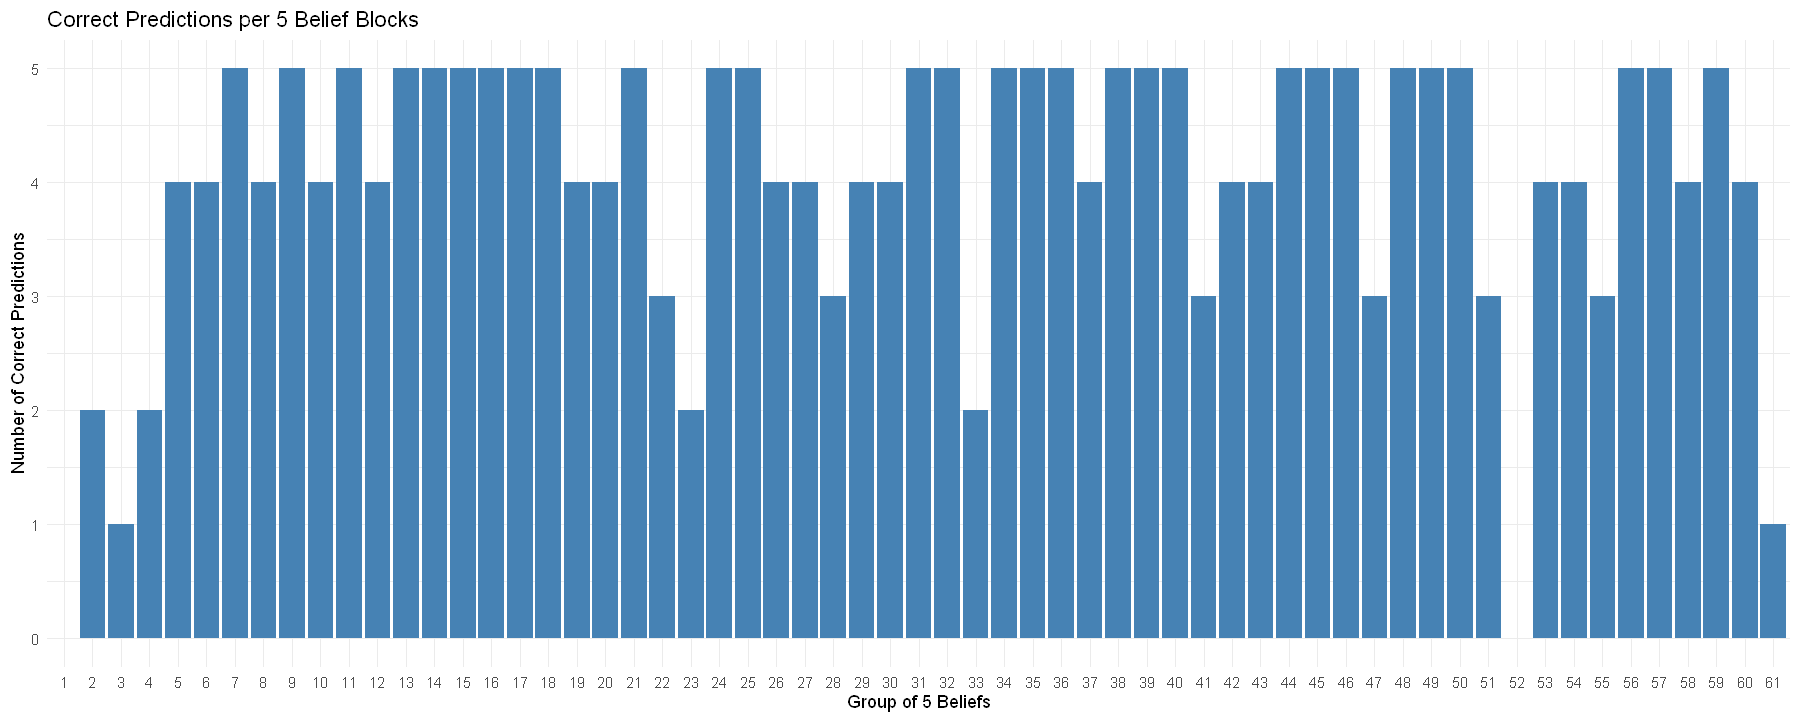

In [59]:
plot_belief_accuracy(beliefs, real_pos)

8.1. Change the model error percentage according to the table below and compare the graphs for 300 moves.
+ At each step, change the `SENSOR_ERROR` and `MOVE_ERROR` values ​​and call the `model` function again and plot the model output with given functions.

| Sensor error | Movement Error |
| ------------ | -------------- |
| 0.01         | 0.01           |
| 0.05         | 0.05           |
| 0.6          | 0.6            |
| 0.6          | 0.001          |
| 0.001        | 0.6            |

+ **Note:** Don't use `for` and plot each graph in a **separate cell**.

8.2. Finally, analyze the results and check the reason for the behavior of each chart. Also, compare the importance of sensor error and movement error according to the results.

Overall accuracy: 98.34%


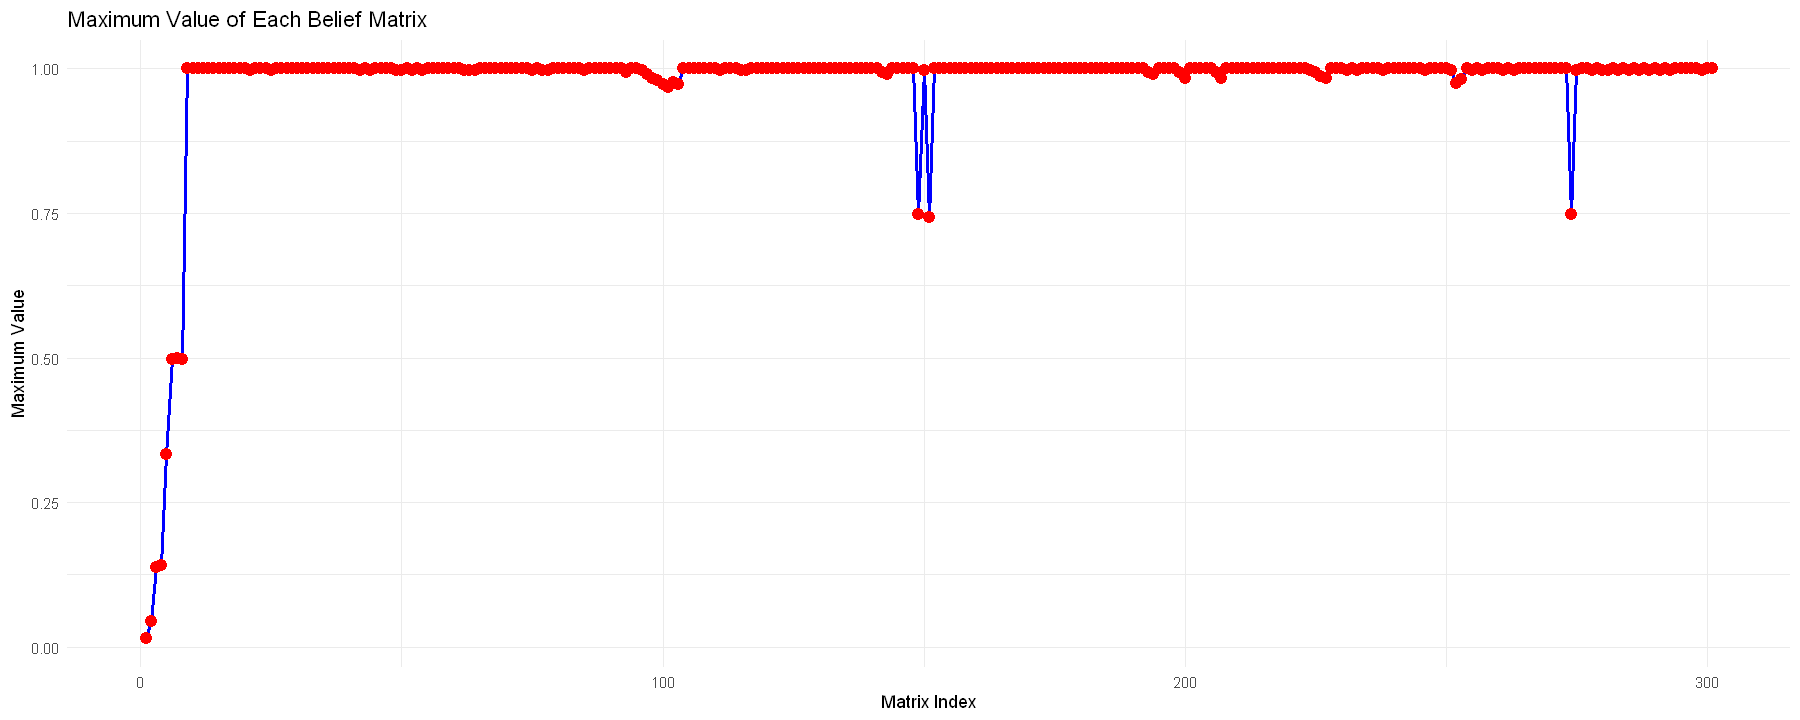

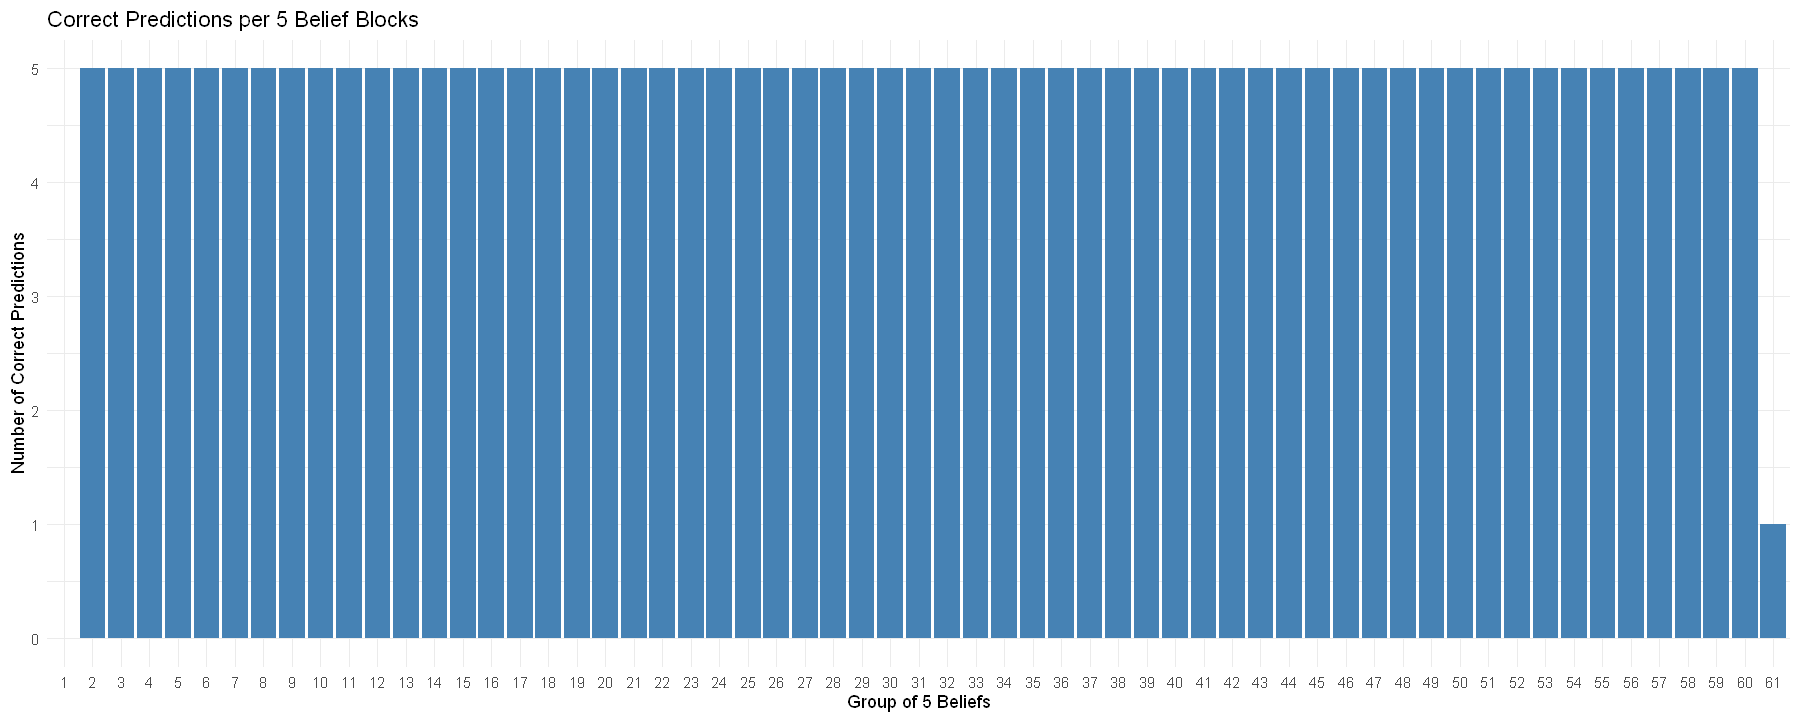

In [60]:
SENSOR_ERROR <- 0.01
MOVE_ERROR   <- 0.01

result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos <- result$real_pos

plot_belief_maxima(beliefs)
plot_belief_accuracy(beliefs, real_pos)


Overall accuracy: 93.69%


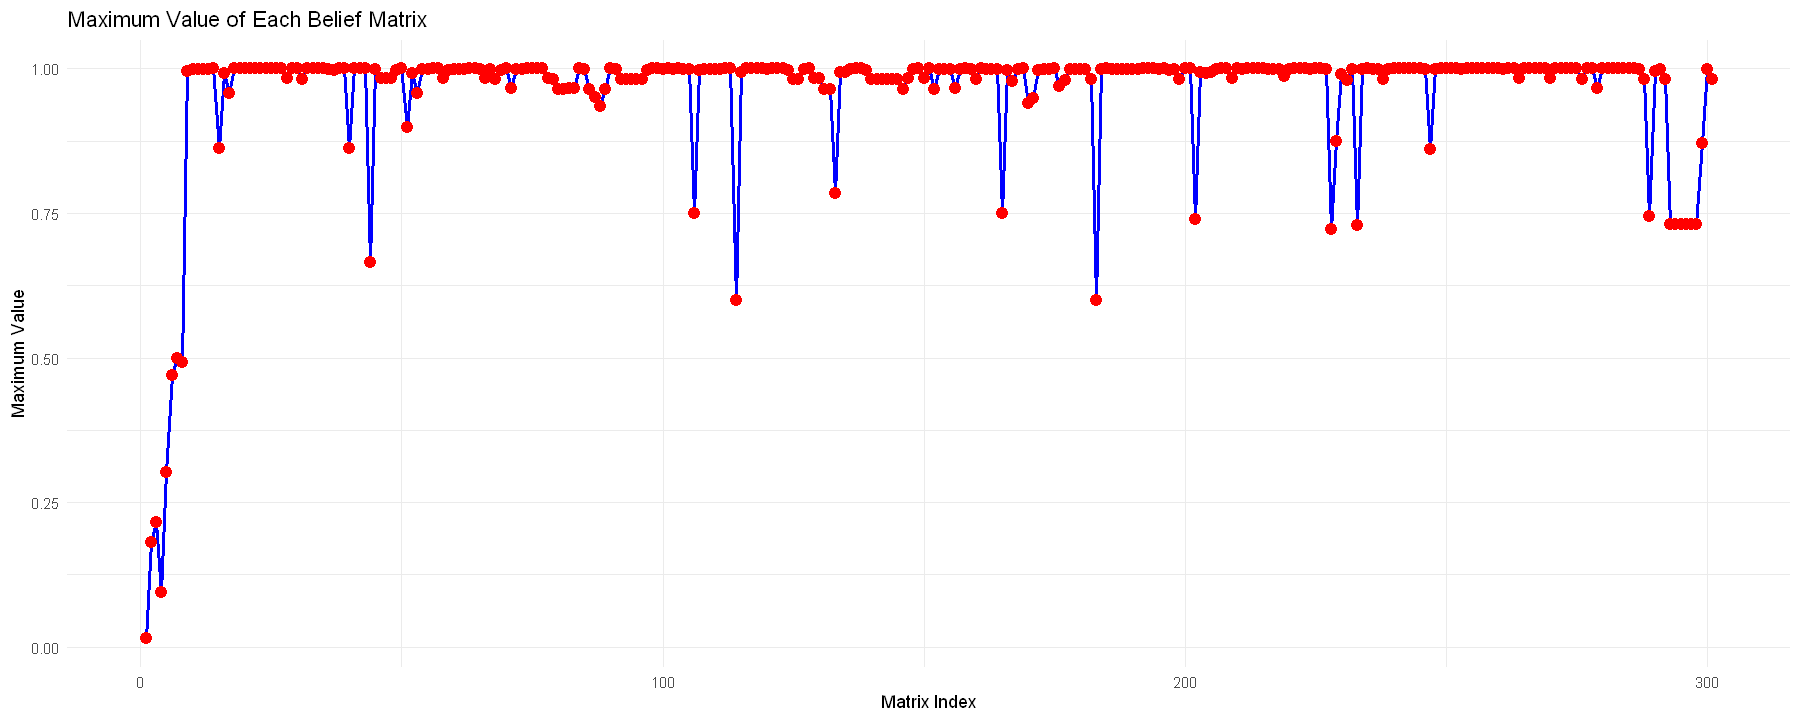

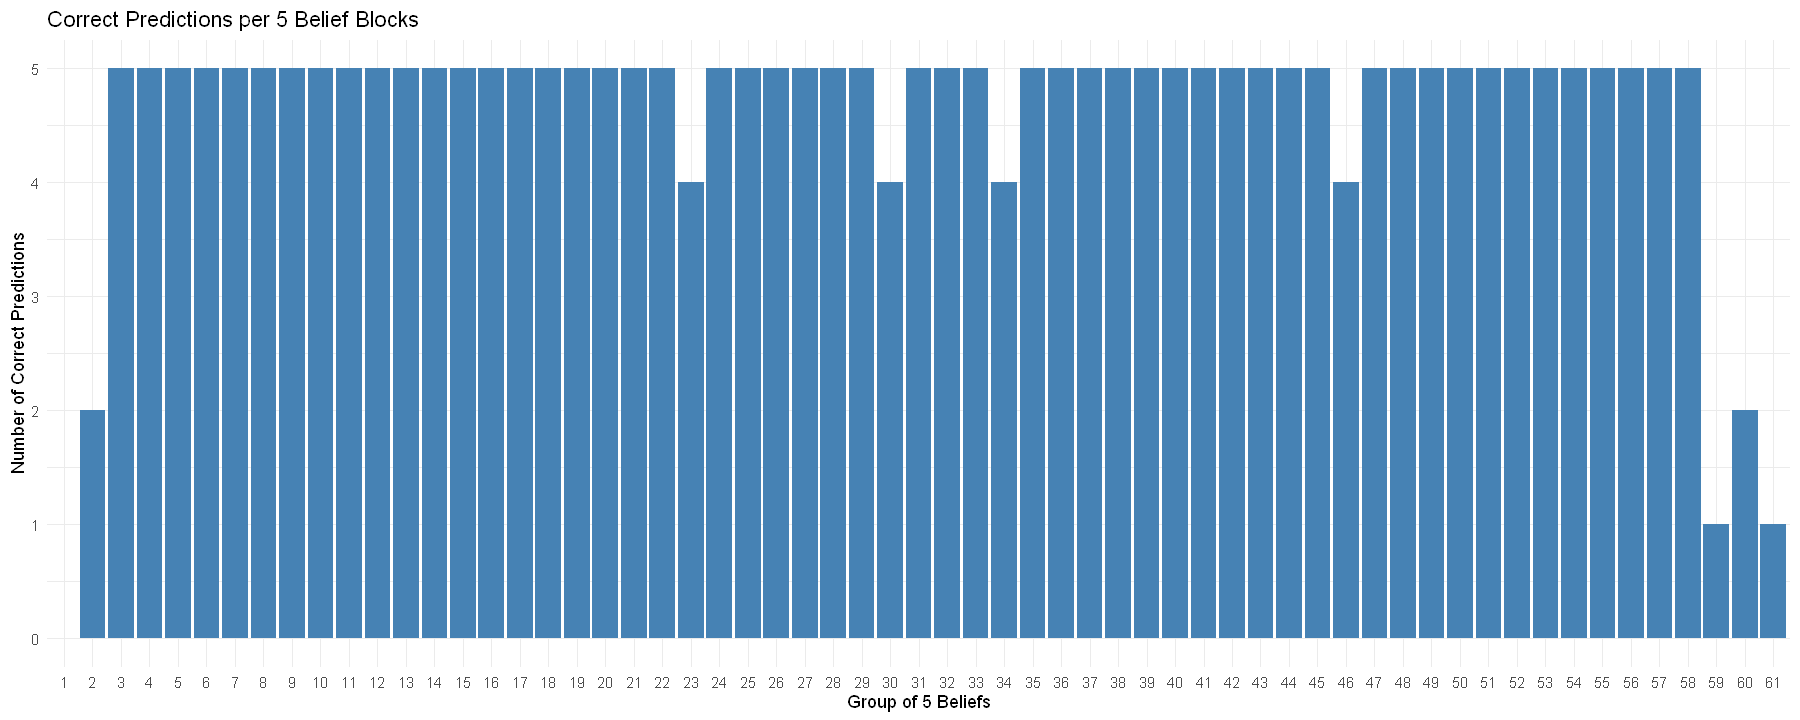

In [61]:
SENSOR_ERROR <- 0.05
MOVE_ERROR   <- 0.05

result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos <- result$real_pos

plot_belief_maxima(beliefs)
plot_belief_accuracy(beliefs, real_pos)

Overall accuracy: 9.63%


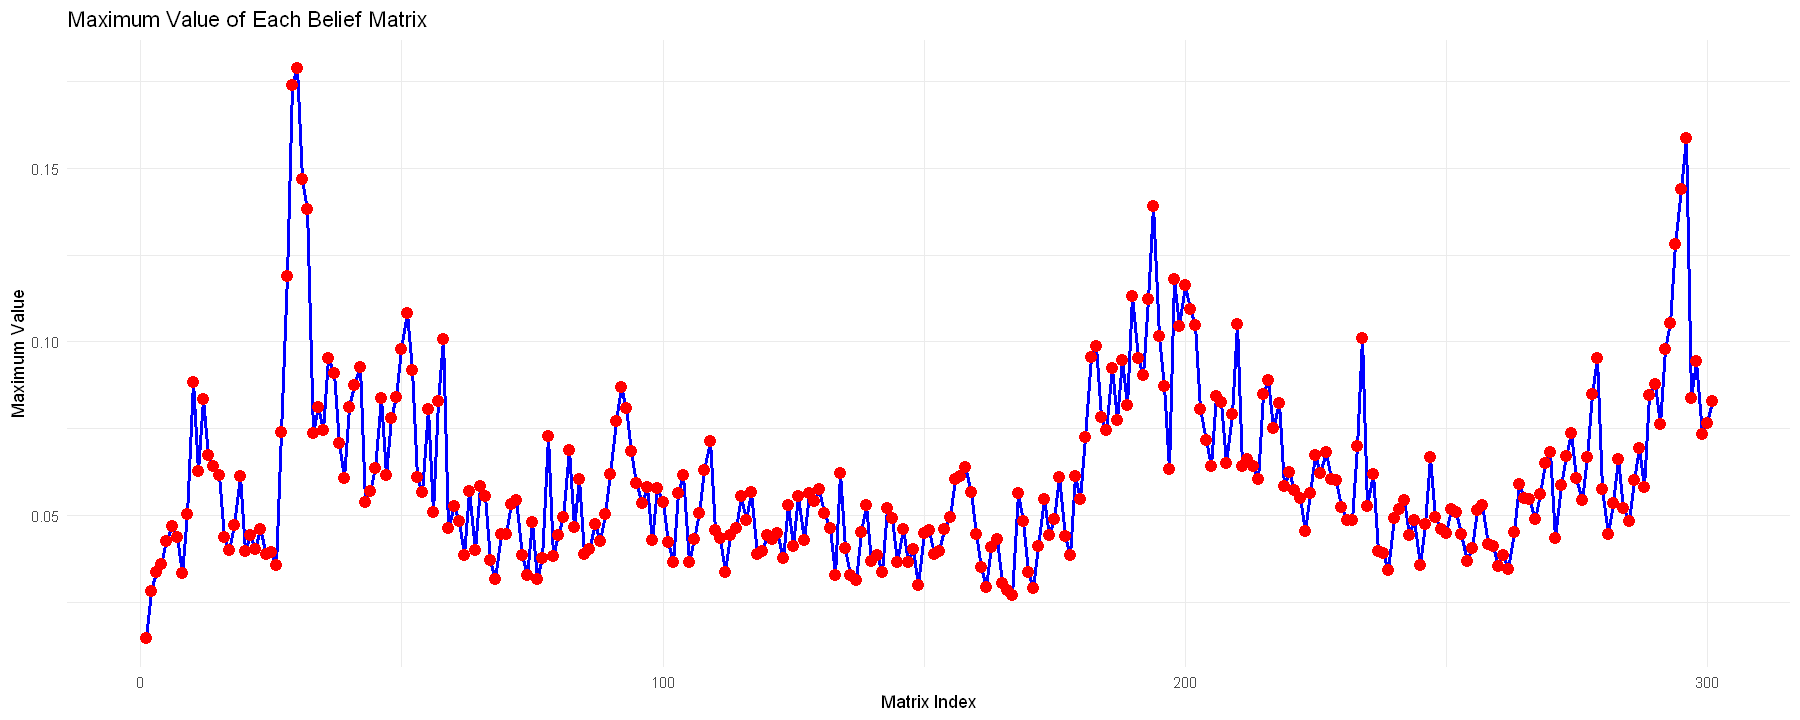

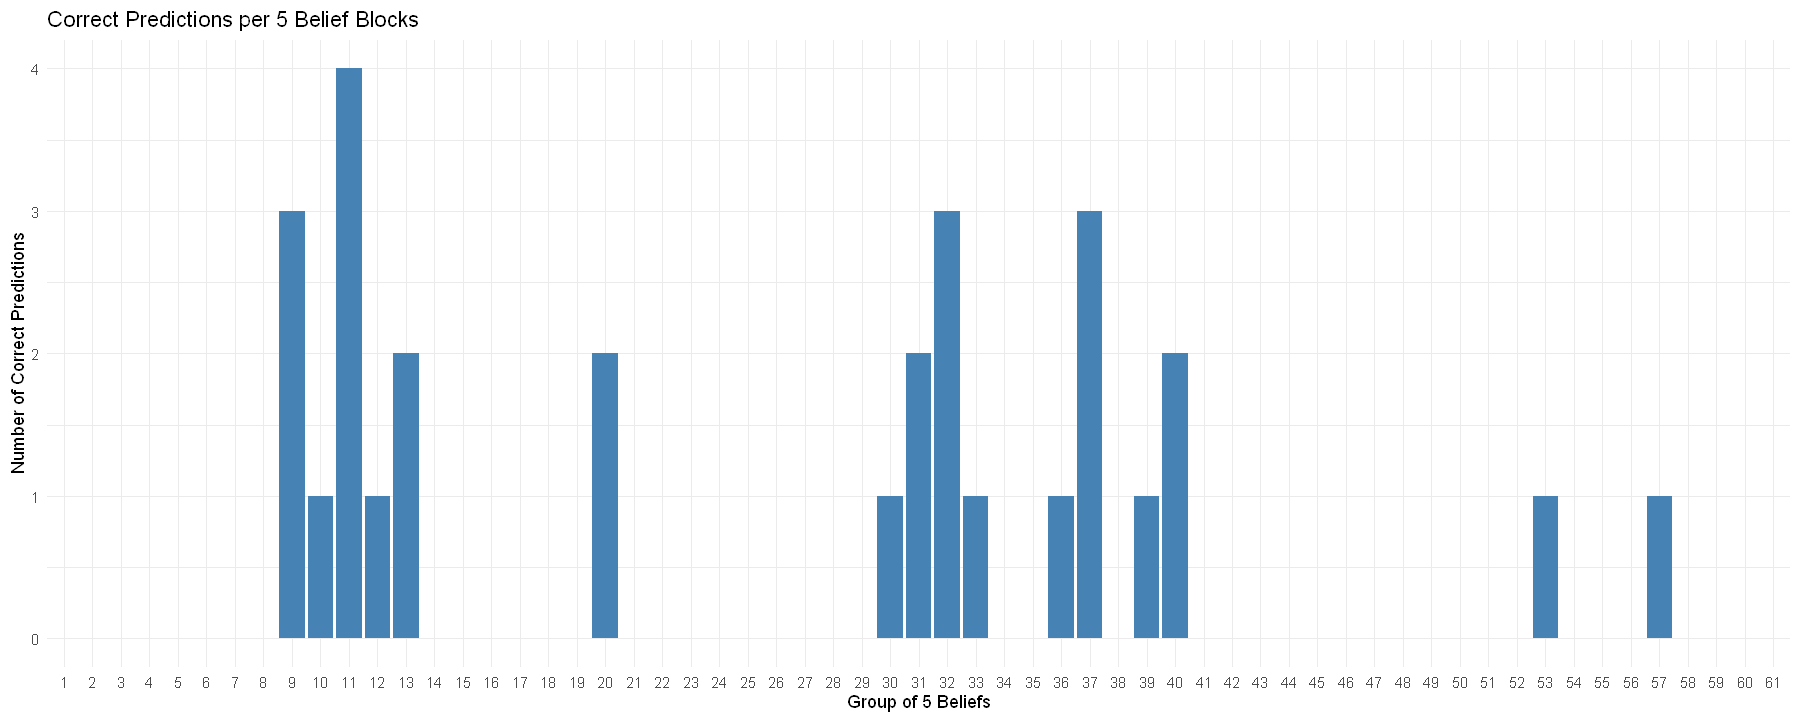

In [62]:
SENSOR_ERROR <- 0.6
MOVE_ERROR   <- 0.6

result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos <- result$real_pos

plot_belief_maxima(beliefs)
plot_belief_accuracy(beliefs, real_pos)

Overall accuracy: 97.01%


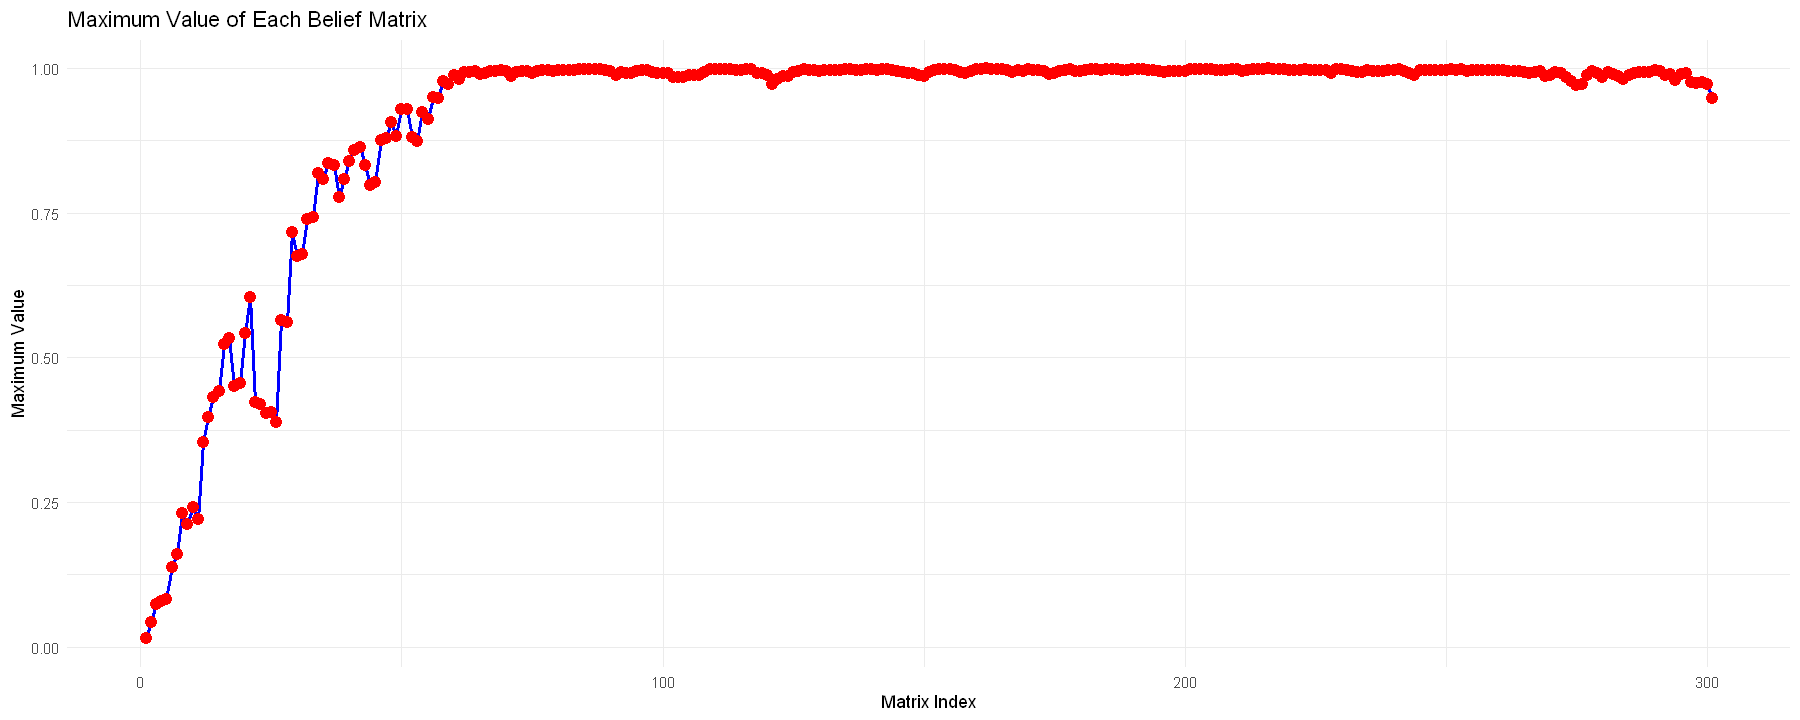

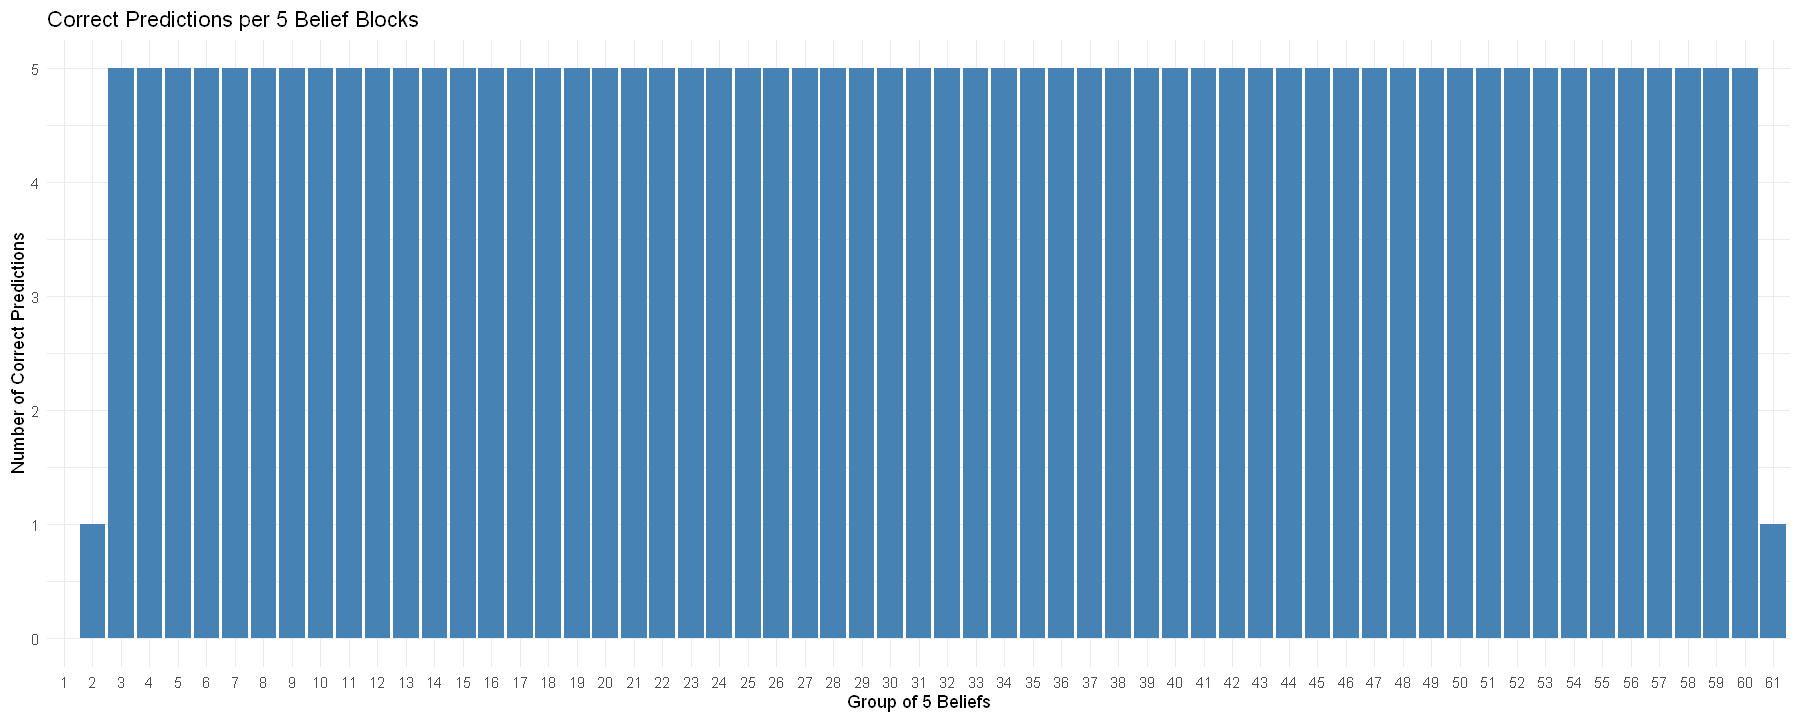

In [63]:
SENSOR_ERROR <- 0.6
MOVE_ERROR   <- 0.001

result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos <- result$real_pos

plot_belief_maxima(beliefs)
plot_belief_accuracy(beliefs, real_pos)

Overall accuracy: 83.06%


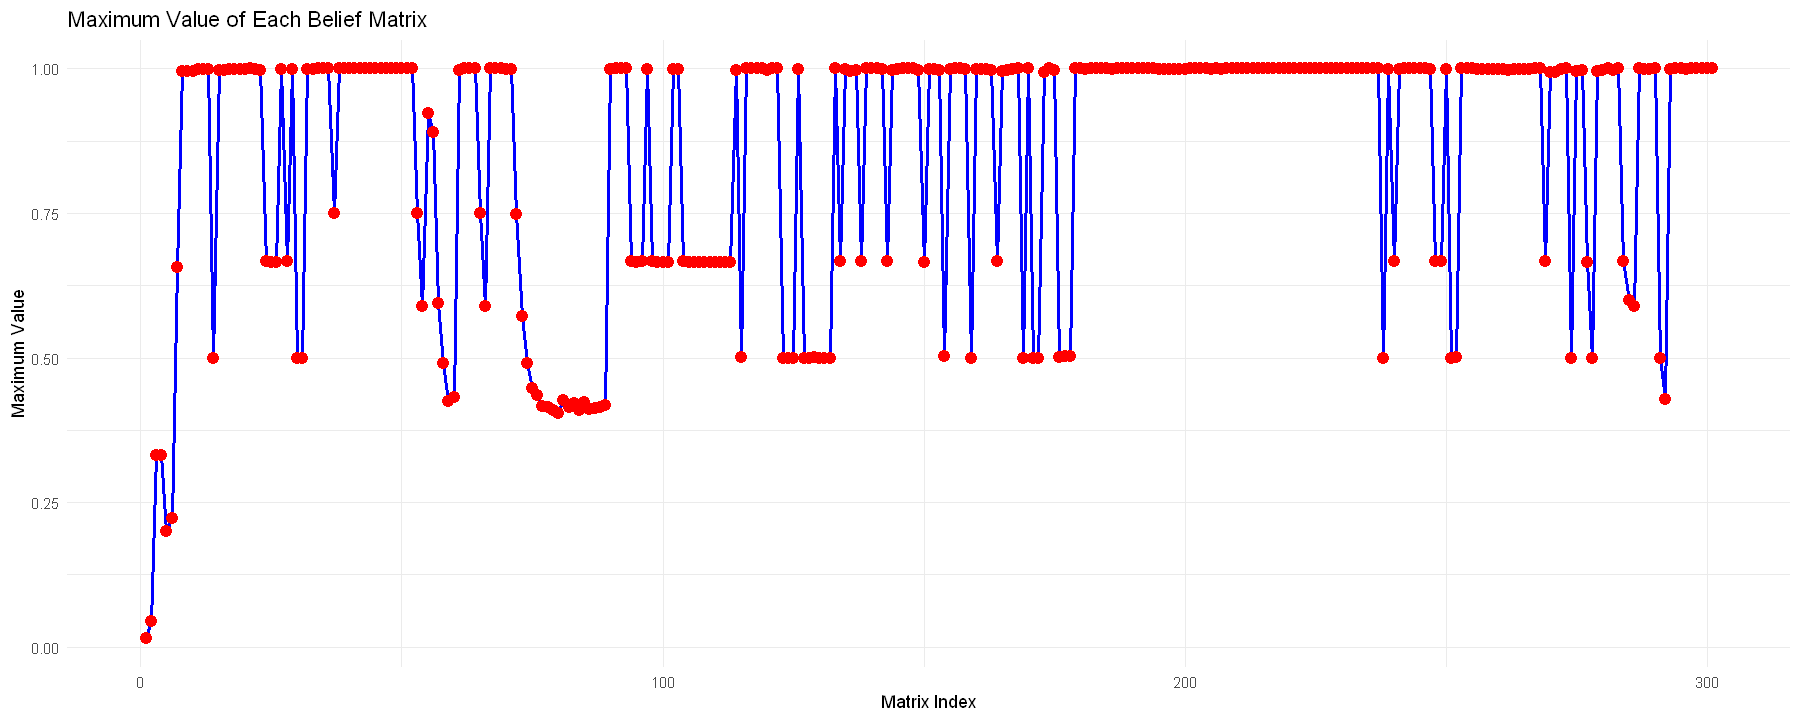

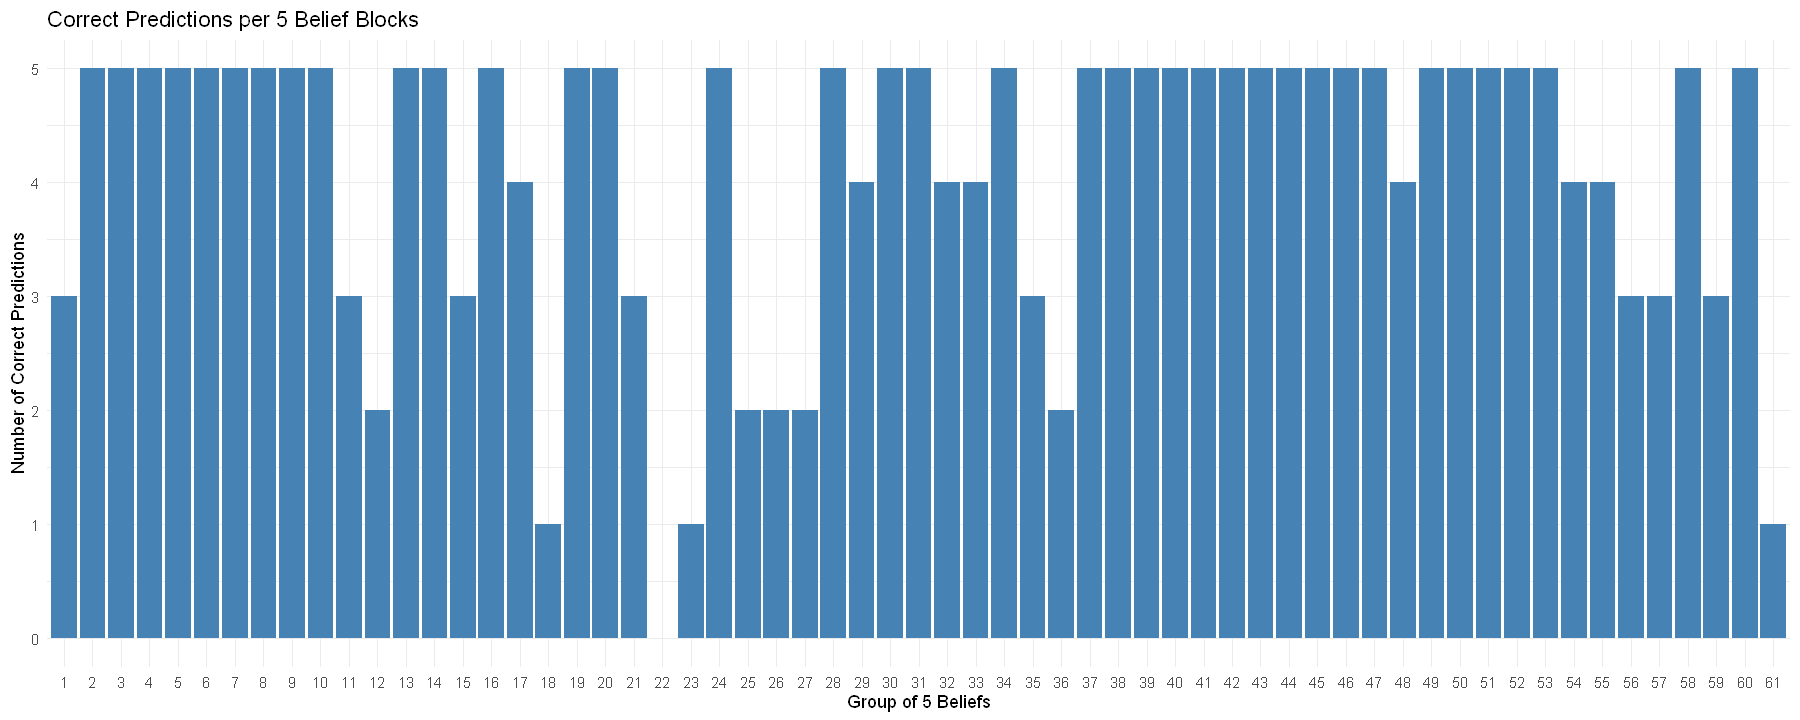

In [64]:
SENSOR_ERROR <- 0.001
MOVE_ERROR   <- 0.6

result <- model(map, chosen_dirs)
beliefs <- result$beliefs
real_pos <- result$real_pos

plot_belief_maxima(beliefs)
plot_belief_accuracy(beliefs, real_pos)

🔴 **8.2 TO DO**

Sensor's impact is much more than movement's. Thus with 0.6 sensor error and 0.001 movement error result is worse than 0.001 sensor error and 0.6 movement error.